# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,#we don't need this one
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UT AI/My Projects/Project 3: Advanced Machine Learning: Credit Card Users Churn Prediction/BankChurners.csv")

In [ ]:
# let's create a copy of the data to avoid any changes to original data
data = df.copy()

## Data Overview

###Displaying the first and the last five rows of the dataset

In [ ]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [ ]:
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

### Checking the shape of the dataset

In [ ]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 10127 rows and 21 columns.


### Checking the duplicate data.

In [ ]:
data[data.duplicated()].count()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

* There are no duplicated values in the dataset.

### Checking the data types of the columns for the dataset

In [ ]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* Dependent variable is `Avg_Utilization_Ratio`, which if of *float* type.
* `Attrition_Flag`, `Gender`, `Education_Level`, `Marital_Status`, `Income_Category`, `Card_Category` are of *object* type.
* All other columns are numeric in nature.

In [ ]:
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

Count  Percentage
Education_Level   1519      15.000
Marital_Status     749       7.396

* There are 1519 (15%) missing values in the `Education_Level` column and 749 (7.4%) missing values in the `Marital_Status` column.

* We will treat these missing values after understanding the distributions of features in the data, the relationships that exist in the data. This will help us impute these values more effectively.

### Missing values: Creating three new data sets



* dataE: Only rows where the values in the Education_Level column are missing.

* dataM: Only rows where the values in the Marital_Status column are missing.

* dataABC: Only rows where the values in the Income_Category column are 'abc'.

In [ ]:
#extracting all the information of other variables where Distance is null
dataE=data[data['Education_Level'].isnull()==True]
dataM=data[data['Marital_Status'].isnull()==True]
dataABC=data[data['Income_Category']=='abc']

### Checking the statistical summary

#### Checking numeric types

In [ ]:
# Let's look at the statistical summary of the data
data.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

**Analysis:**

* **Dependent_count** (Number of dependents): min 0, max 5, average 2.3 (that is, as an average, each customer has between 2 and 3 dependents).
50% of customers have at most 2 dependents.

* **Months_on_book** (Period of relationship with the bank): min 1, max 6, average 35.9.

* **Months_Inactive_12_mon** (No. of months inactive in the last 12 months): min 0, max 6, average 2.3. 50% of customers were inactive for at least 2 months.

* **Credit_Limit**: min 1438.3, max 34516.0, average 8631.95.

* **Total_Revolving_Bal**: min 0, max 2517.0, average 1162.8.

* **Total_Trans_Amt**: min 510, max 18484, average 4404.1.

* **Total_Trans_Ct**: min 10, max 139, average 65.



**Sanity check:**

Looking at min and max, there are no negative values and no too big numbers, so the data look reliable.

#### Checking object types

In [ ]:
data.describe(include=["object"]).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

In [ ]:
object_columns = data.select_dtypes(include='object').columns #way 1
#object_columns = data.describe(include=[object]).columns #way 2 (version 1)
#object_columns = data.describe(include='object').columns #way 2 (version 2)

print("*" * 50)
print("*" * 50)
for col in object_columns:
    counts = data[col].value_counts()
    percs = data[col].value_counts(normalize=True)
    print("Unique values in", col, "are:")
    print("" * 50)
    print(pd.concat([counts,percs], axis=1, keys=['count', 'percentage']))
    print("" * 50)
    print("*" * 50)
    print("*" * 50)

**************************************************
**************************************************
Unique values in Attrition_Flag are:

                   count  percentage
Existing Customer   8500       0.839
Attrited Customer   1627       0.161

**************************************************
**************************************************
Unique values in Gender are:

   count  percentage
F   5358       0.529
M   4769       0.471

**************************************************
**************************************************
Unique values in Education_Level are:

               count  percentage
Graduate        3128       0.363
High School     2013       0.234
Uneducated      1487       0.173
College         1013       0.118
Post-Graduate    516       0.060
Doctorate        451       0.052

**************************************************
**************************************************
Unique values in Marital_Status are:

          count  percentage
Married    

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    qntQ1=np.quantile(data[feature], .25)
    qntQ2=np.quantile(data[feature], .50)
    qntQ3=np.quantile(data[feature], .75)
    IQR=qntQ3-qntQ1
    W1=max(qntQ1-1.5*IQR,data[feature].min())
    W2=min(qntQ3+1.5*IQR,data[feature].max())
    print("Q1 quantile: ", qntQ1)
    print("Q2 quantile: ", qntQ2)
    print("Q3 quantile: ", qntQ3)
    print("IQR: ", IQR)
    print("Whisker1: ", W1)
    print("Whisker2: ", W2)
    print("Min: ", data[feature].min())
    print("Max: ", data[feature].max())
    shp1=data[data[feature]<W1].shape
    shp2=data[data[feature]>W2].shape
    print(shp1[0], " (", round(shp1[0]*100/data.shape[0], 2),"%)"," of customers: < ", W1, sep='')
    print(shp2[0], " (",round(shp2[0]*100/data.shape[0],2),"%)"," of customers: > ", W2, sep='')


In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter,
        ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter,
        ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

####Categorical Variables

#####Attrition_Flag (Target): Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"

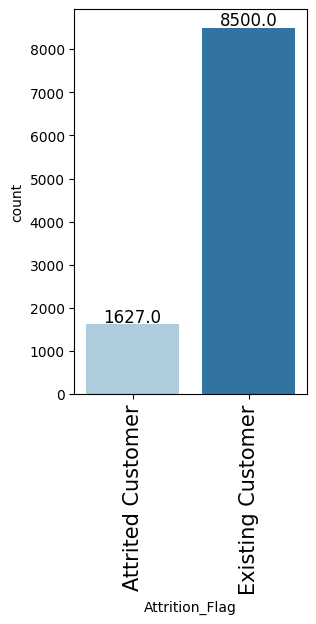

In [ ]:
labeled_barplot(data, 'Attrition_Flag', perc=False, n=None)

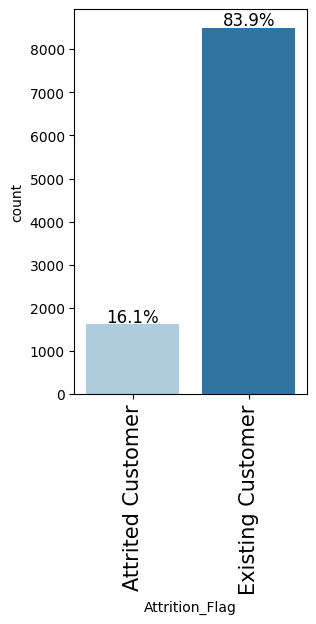

None


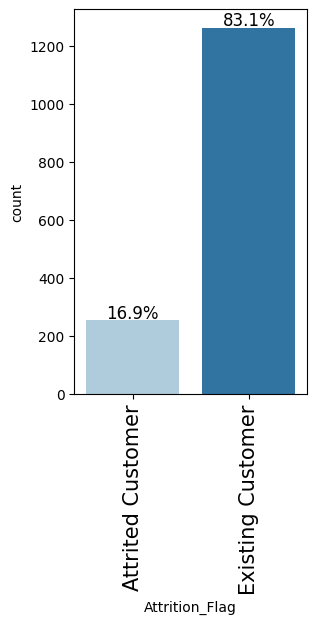

None


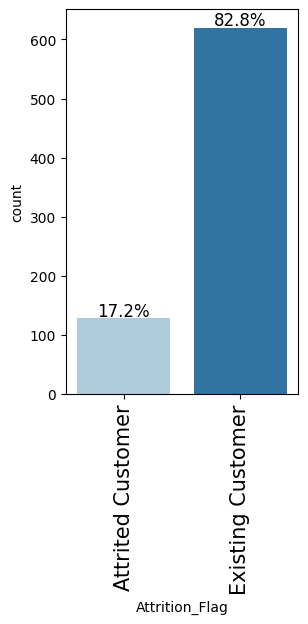

None


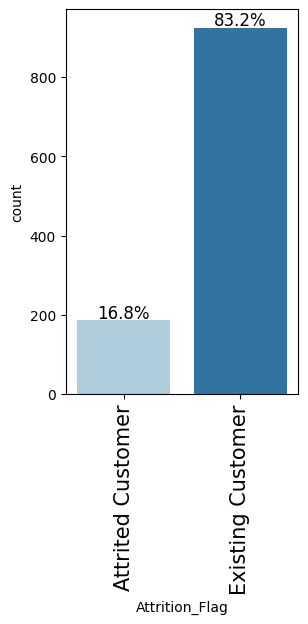

None


In [ ]:
print(labeled_barplot(data, 'Attrition_Flag', perc=True, n=None))
print(labeled_barplot(dataE, 'Attrition_Flag', perc=True, n=None))
print(labeled_barplot(dataM, 'Attrition_Flag', perc=True, n=None))
print(labeled_barplot(dataABC, 'Attrition_Flag', perc=True, n=None))

**CONCLUSION**:

* Almost 84% of clients are the existing customers.
* The missing values in the Education_Level, Marital_Status, and Income_Category columns don't make a significant effect on the barplots.





#####Gender

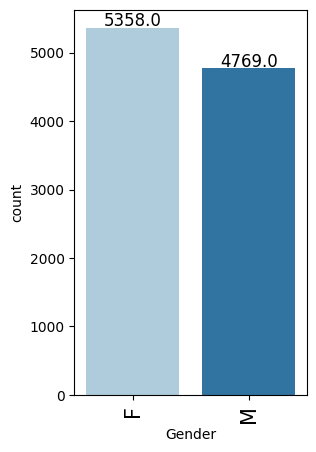

In [ ]:
labeled_barplot(data, 'Gender', perc=False, n=None)

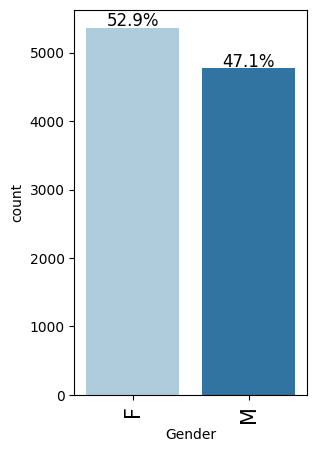

None


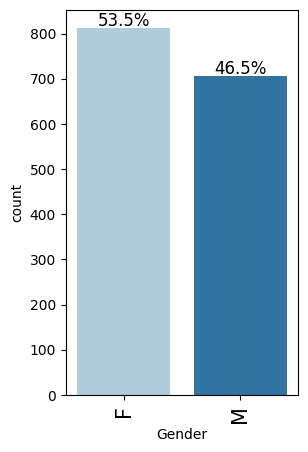

None


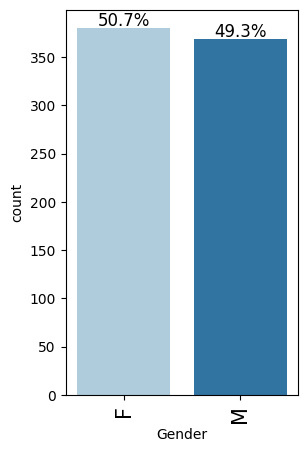

None


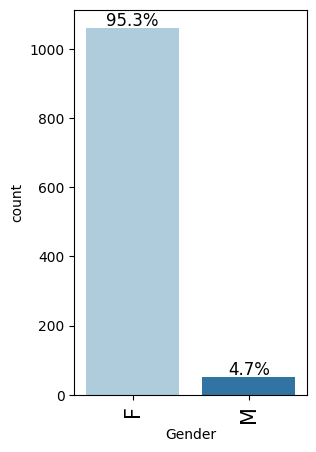

None


In [ ]:
feature='Gender'
print(labeled_barplot(data, feature, perc=True, n=None))
print(labeled_barplot(dataE, feature, perc=True, n=None))
print(labeled_barplot(dataM, feature, perc=True, n=None))
print(labeled_barplot(dataABC, feature, perc=True, n=None))

**CONCLUSION**:

* Most of the customers are women, but there is no significant difference between the number of men and women.

* The missing values in the Education_Level and Marital_Status columns don't make a significant effect on the barplots.

* The missing values in the Income_Category column make a significant effect on the barplots (95.3% are women). This can be explained by the fact that many women are housewifes and therefore they leave the Income_Category blank.

#####Dependent_count

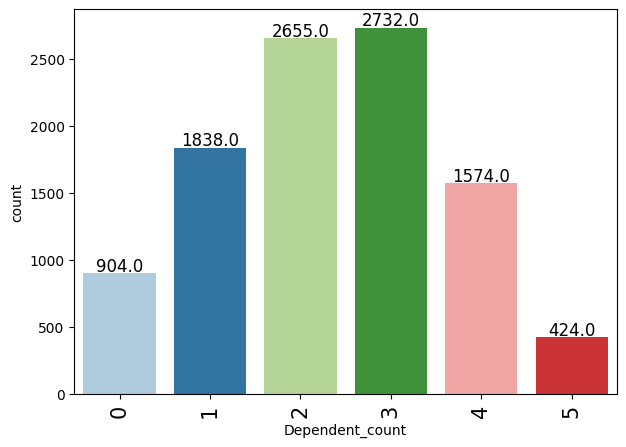

In [ ]:
labeled_barplot(data, 'Dependent_count', perc=False, n=None)

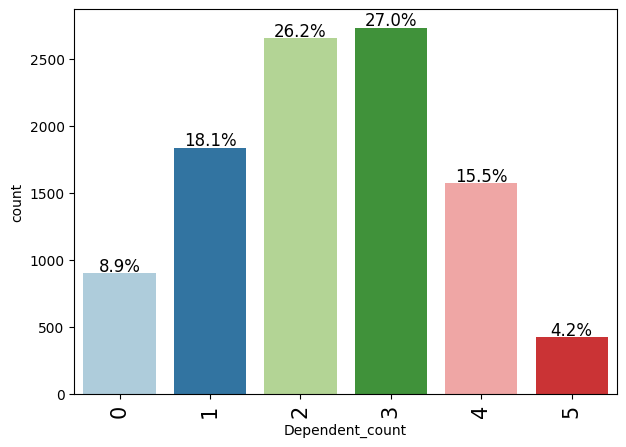

None


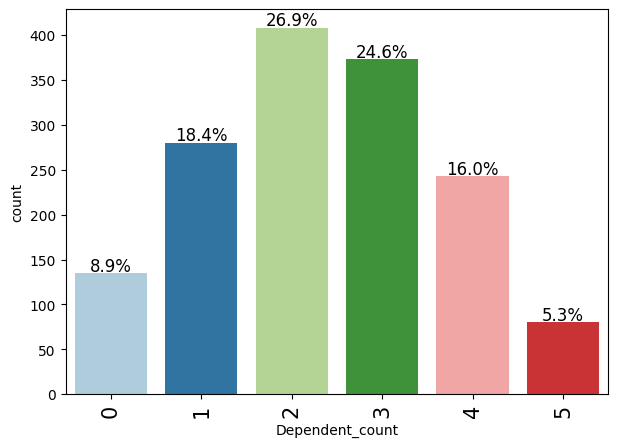

None


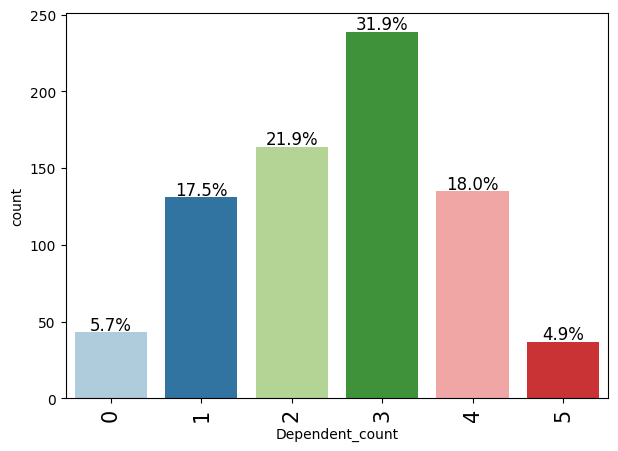

None


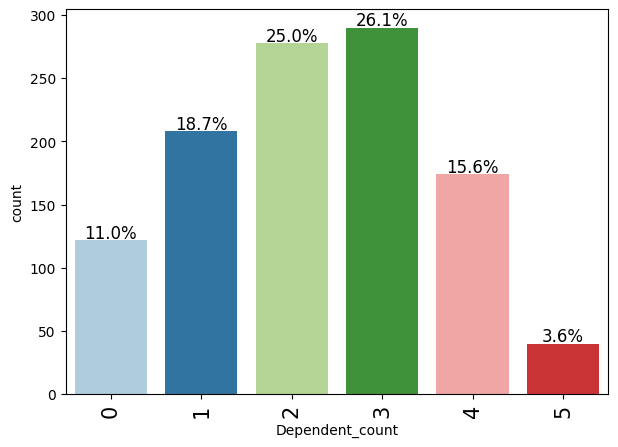

None


In [ ]:
feature='Dependent_count'
print(labeled_barplot(data, feature, perc=True, n=None))
print(labeled_barplot(dataE, feature, perc=True, n=None))
print(labeled_barplot(dataM, feature, perc=True, n=None))
print(labeled_barplot(dataABC, feature, perc=True, n=None))

**CONCLUSION**:

* More than half of the customers have either 2 or 3 dependents.

* Only 4.2% of the customers have 5 dependents.

* The barplot is "bell shaped": The highest bars are in the middle, then the bars become smaller toward the ends.

* The missing values in the Education_Level, Marital_Status, and Income_Category columns don't make a significant effect on the barplots.

#####Education_Level

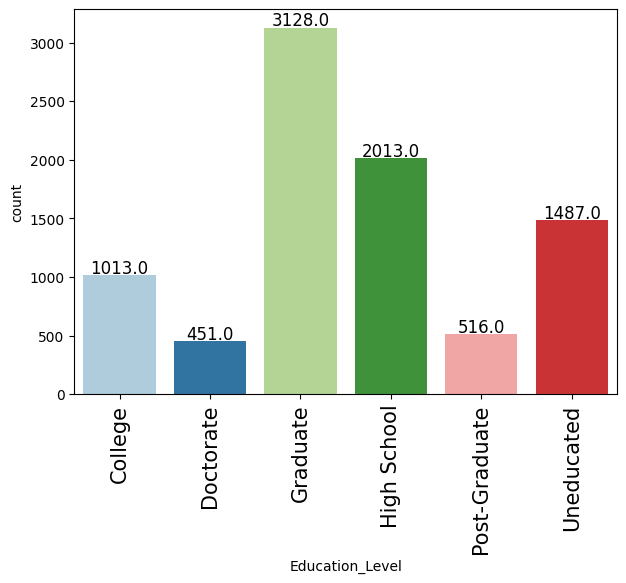

In [ ]:
labeled_barplot(data, 'Education_Level', perc=False, n=None)

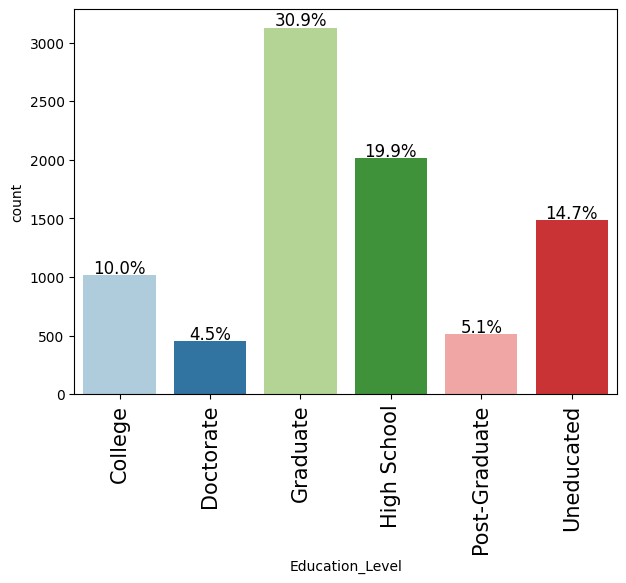

None


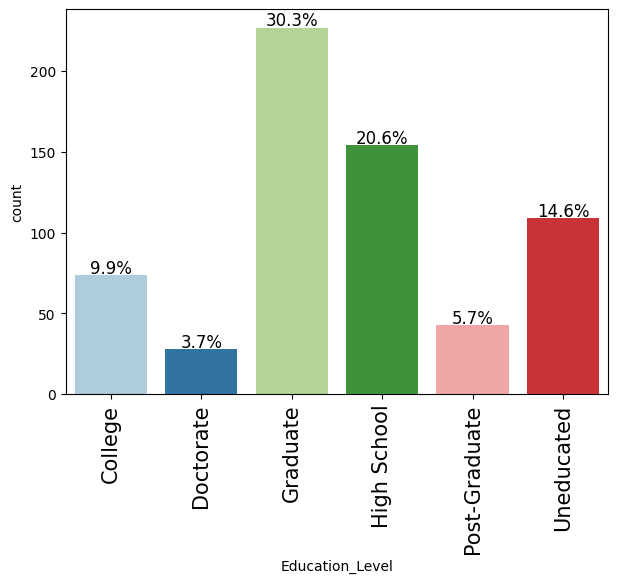

None


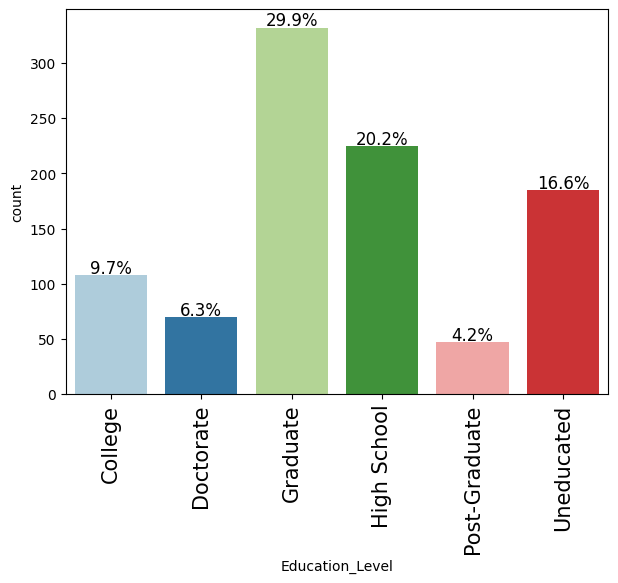

None


In [ ]:
feature='Education_Level'
print(labeled_barplot(data, feature, perc=True, n=None))
print(labeled_barplot(dataM, feature, perc=True, n=None))
print(labeled_barplot(dataABC, feature, perc=True, n=None))

**CONCLUSION**:

We first note that there are missing values in the Education_Level column, therefore the percentages in the barplot don't add up to 100%.

If we ignore the missing values, we can come up with the following conclusions:

* More than half of the customers have either Graduate or High School education
level.

* The smallest number of customers have either Doctorate or Post-Graduate
education level.

* Almost 15% (the third largest group) of customers are uneducated.

#####Marital_Status

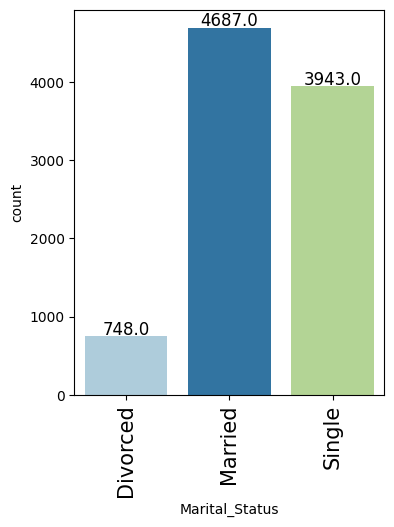

In [ ]:
labeled_barplot(data, 'Marital_Status', perc=False, n=None)

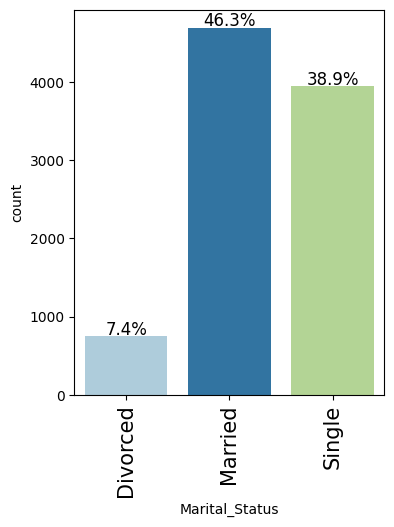

None


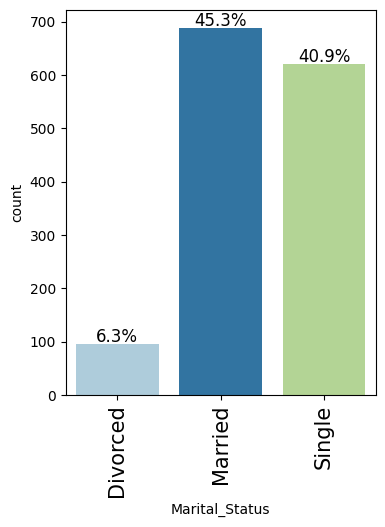

None


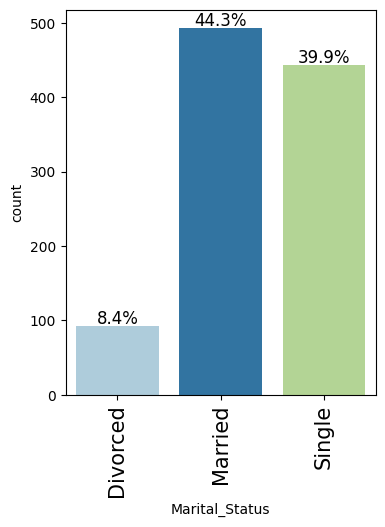

None


In [ ]:
feature='Marital_Status'
print(labeled_barplot(data, feature, perc=True, n=None))
print(labeled_barplot(dataE, feature, perc=True, n=None))
print(labeled_barplot(dataABC, feature, perc=True, n=None))

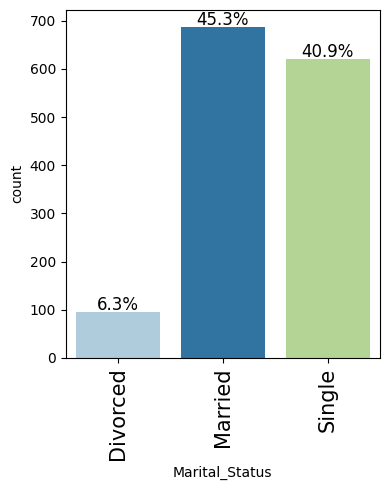

In [ ]:
labeled_barplot(dataE, 'Marital_Status', perc=True, n=None)

**CONCLUSION**:

We first note that there are missing values in the Marital_Status column, therefore the percentages in the barplot don't add up to 100%.

If we ignore the missing values, we can come up with the following conclusions:

* The largest group of customers is Married (46.3%). The second largest group of customers is Single (38.9%). These two groups are comparable in size.

* Only 7.4% of customers are divorced.



#####Income_Category: Annual Income Category of the account holder

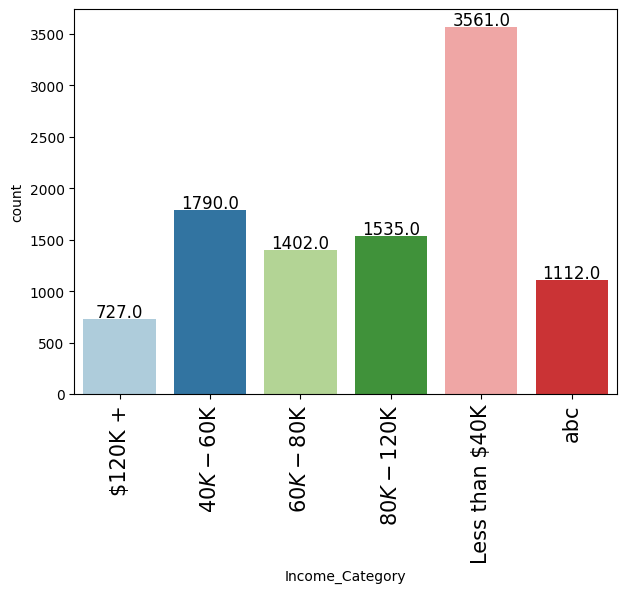

In [ ]:
labeled_barplot(data, 'Income_Category', perc=False, n=None)

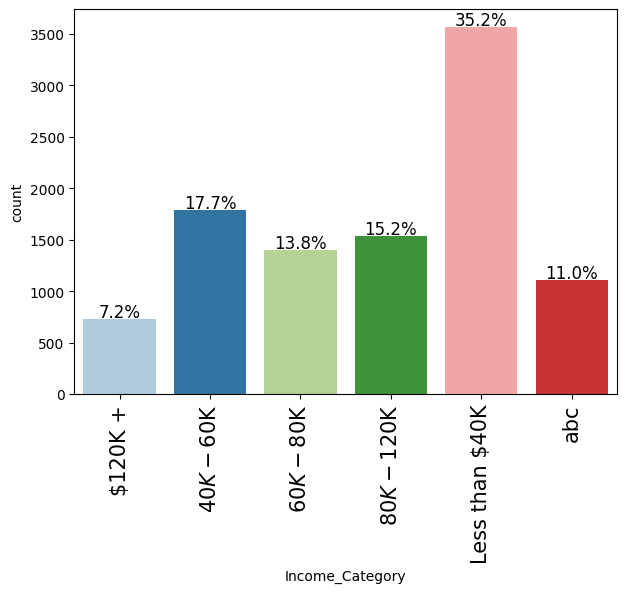

None


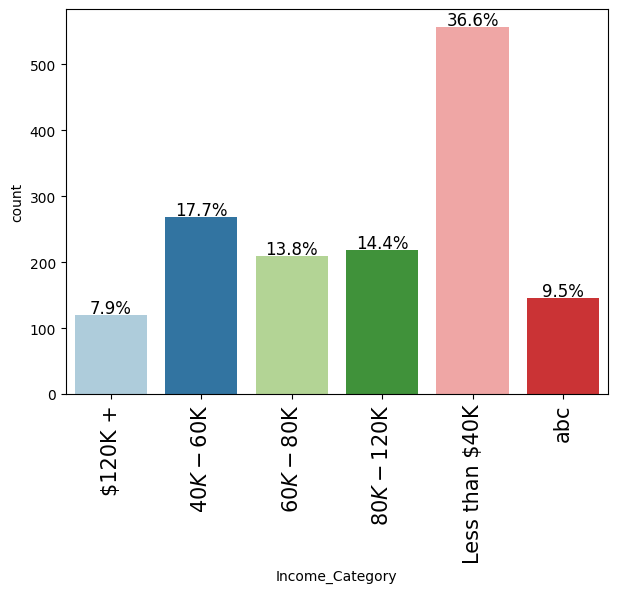

None


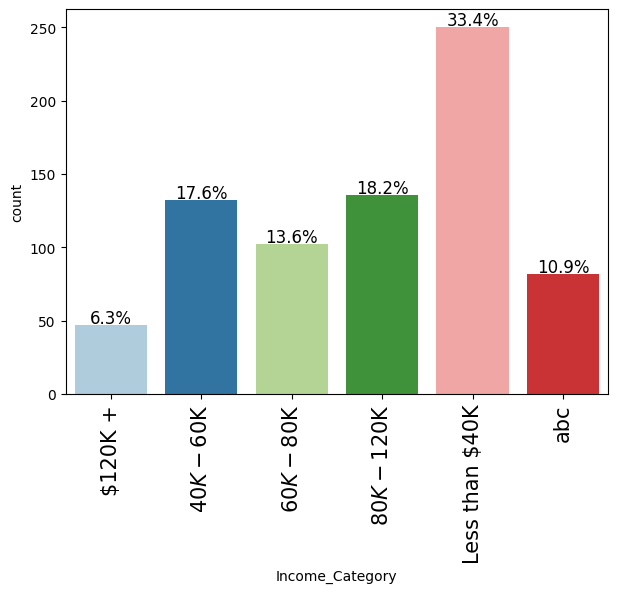

None


In [ ]:
feature='Income_Category'
print(labeled_barplot(data, feature, perc=True, n=None))
print(labeled_barplot(dataE, feature, perc=True, n=None))
print(labeled_barplot(dataM, feature, perc=True, n=None))
#print(labeled_barplot(dataABC, feature, perc=True, n=None))

**CONCLUSION**:

* About 35% of clients have income < $40,000.

#####Card_Category: Type of Card

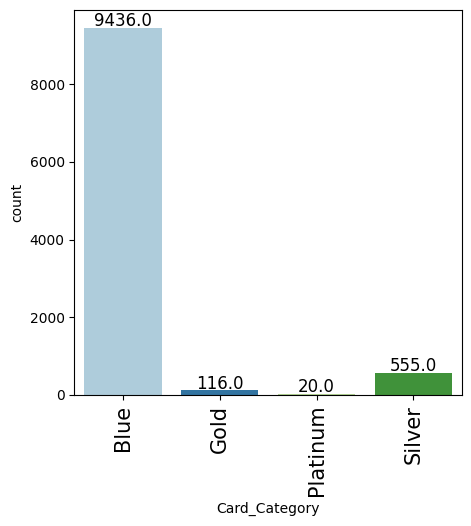

In [ ]:
labeled_barplot(data, 'Card_Category', perc=False, n=None)

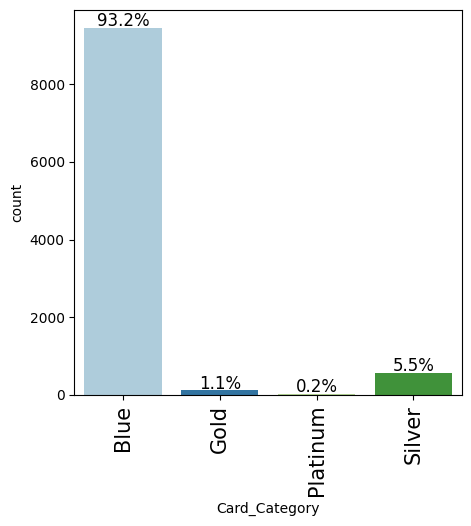

None


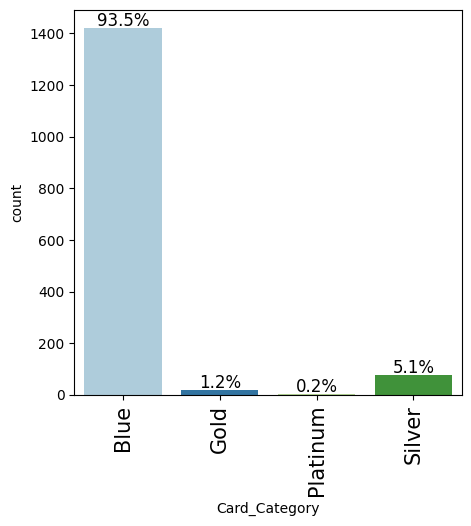

None


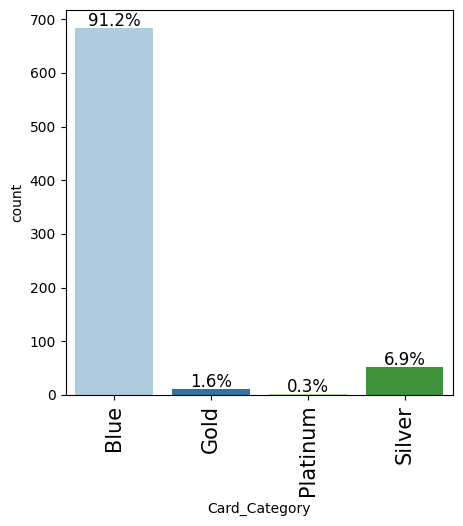

None


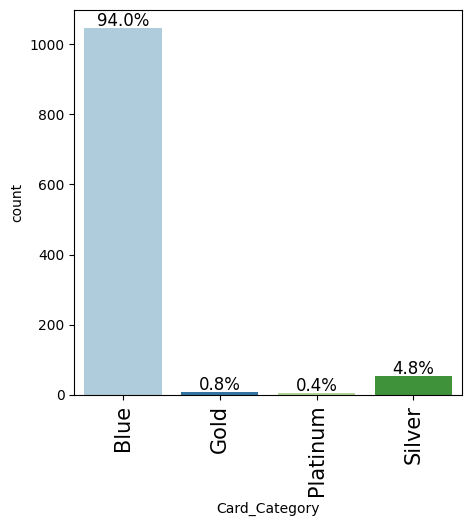

None


In [ ]:
feature='Card_Category'
print(labeled_barplot(data, feature, perc=True, n=None))
print(labeled_barplot(dataE, feature, perc=True, n=None))
print(labeled_barplot(dataM, feature, perc=True, n=None))
print(labeled_barplot(dataABC, feature, perc=True, n=None))

**CONCLUSION**: The missing values in the Education_Level, Marital_Status, and Income_Category columns don't make a significant effect on the barplots.

#####Total_Relationship_Count: Total no. of products held by the customer

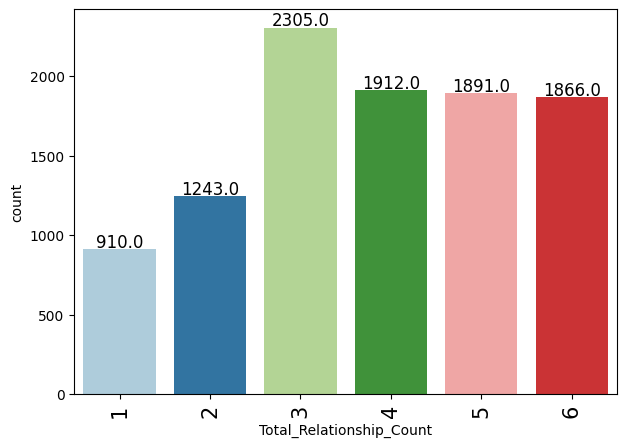

In [ ]:
labeled_barplot(data, 'Total_Relationship_Count', perc=False, n=None)

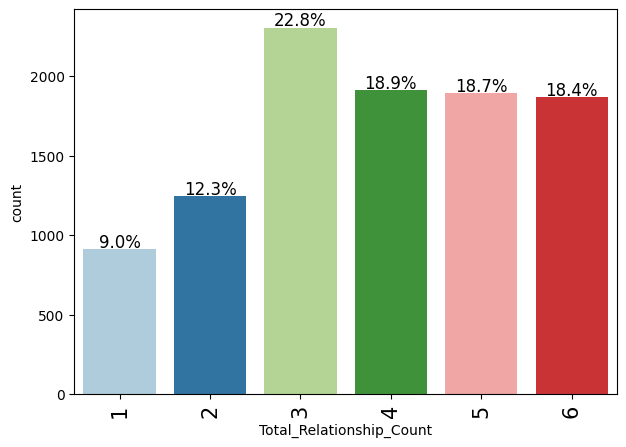

None


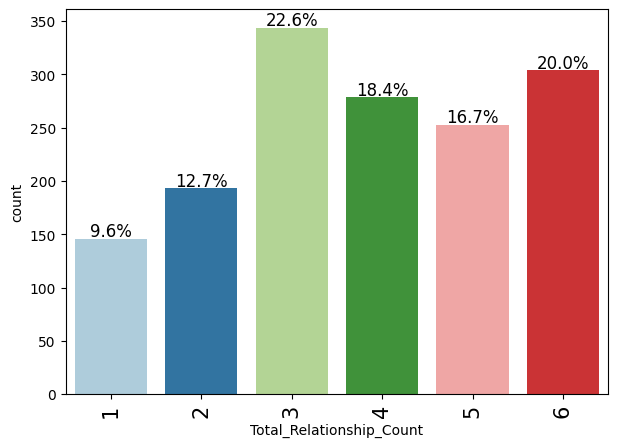

None


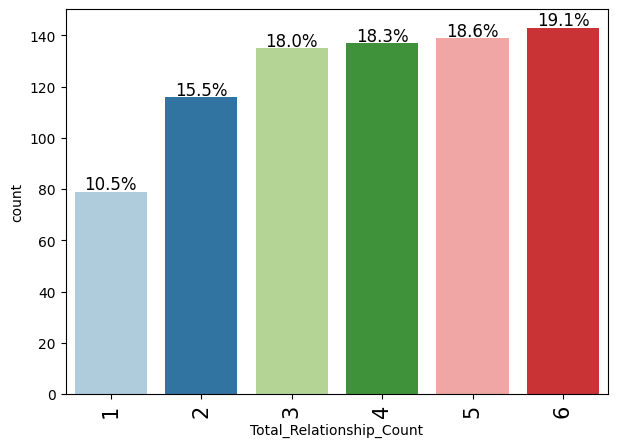

None


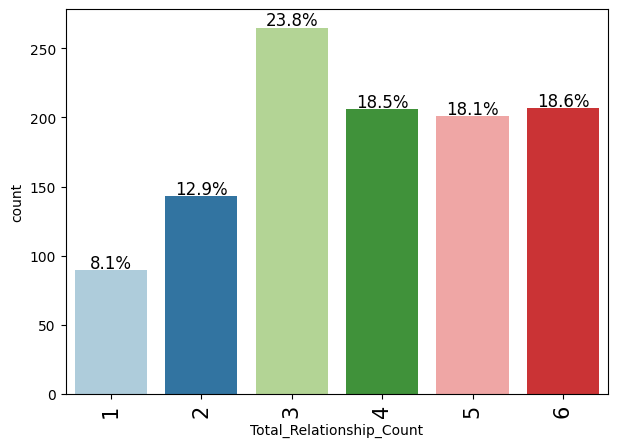

None


In [ ]:
feature='Total_Relationship_Count'
print(labeled_barplot(data, feature, perc=True, n=None))
print(labeled_barplot(dataE, feature, perc=True, n=None))
print(labeled_barplot(dataM, feature, perc=True, n=None))
print(labeled_barplot(dataABC, feature, perc=True, n=None))

**CONCLUSION**: The missing values in the Education_Level, Marital_Status, and Income_Category columns don't make a significant effect on the barplots.

#####Months_Inactive_12_mon: No. of months inactive in the last 12 months

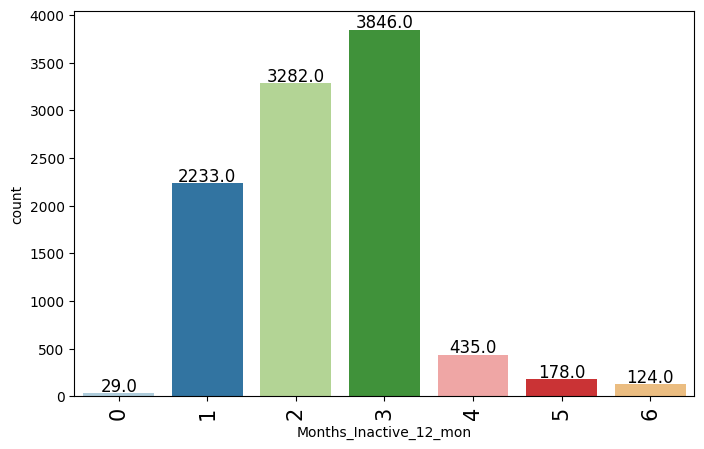

In [ ]:
labeled_barplot(data, 'Months_Inactive_12_mon', perc=False, n=None)

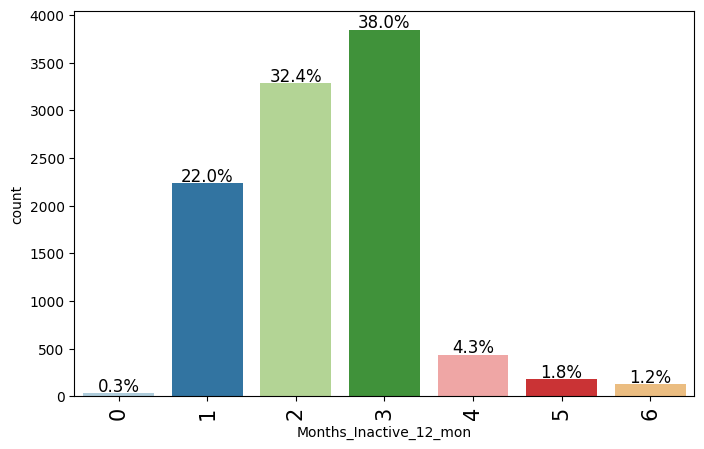

None


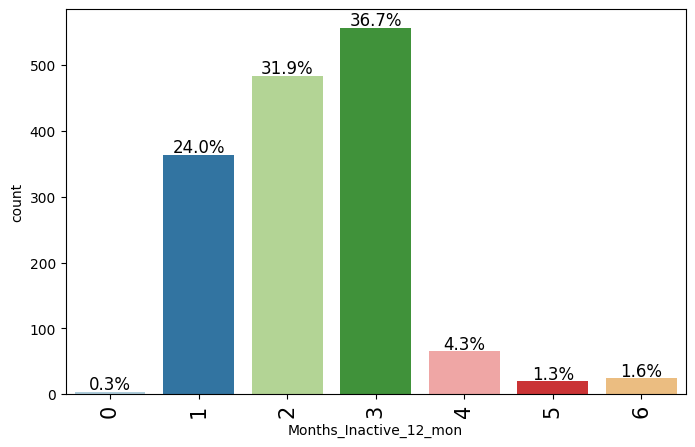

None


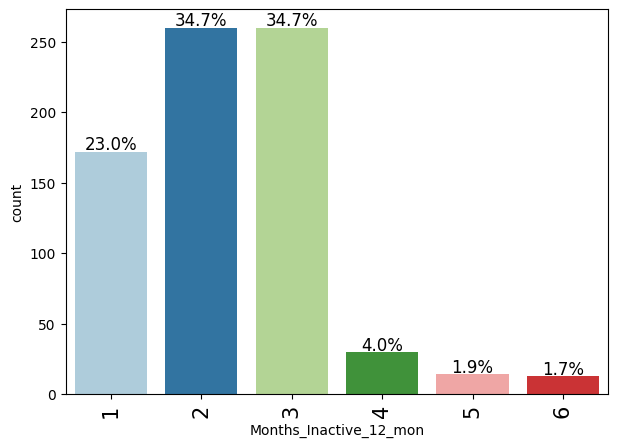

None


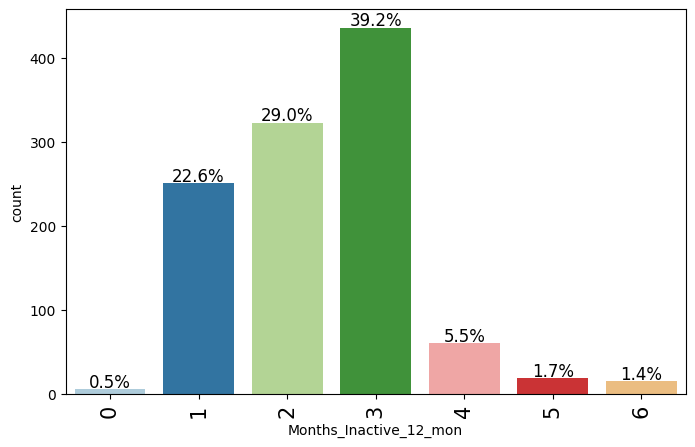

None


In [ ]:
feature='Months_Inactive_12_mon'
print(labeled_barplot(data, feature, perc=True, n=None))
print(labeled_barplot(dataE, feature, perc=True, n=None))
print(labeled_barplot(dataM, feature, perc=True, n=None))
print(labeled_barplot(dataABC, feature, perc=True, n=None))

**CONCLUSION**: The missing values in the Education_Level, Marital_Status, and Income_Category columns don't make a significant effect on the barplots.

#####Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months

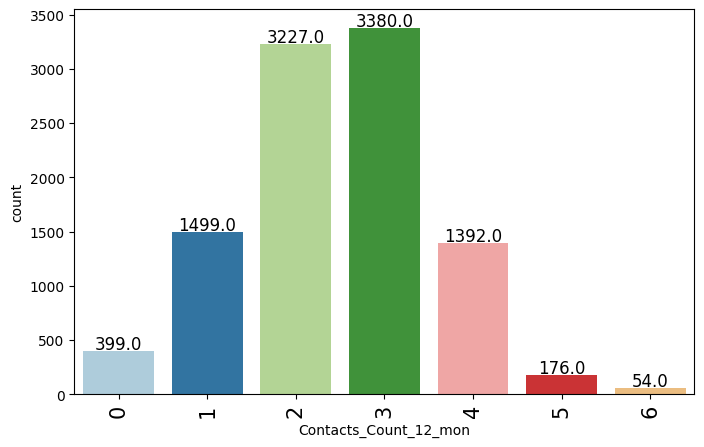

In [ ]:
labeled_barplot(data, 'Contacts_Count_12_mon', perc=False, n=None)

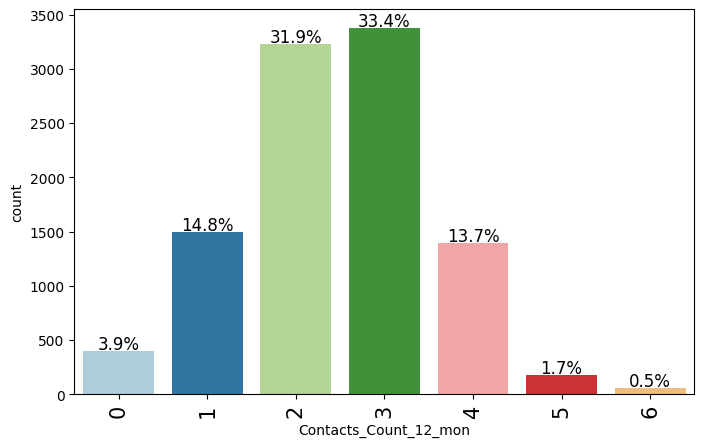

None


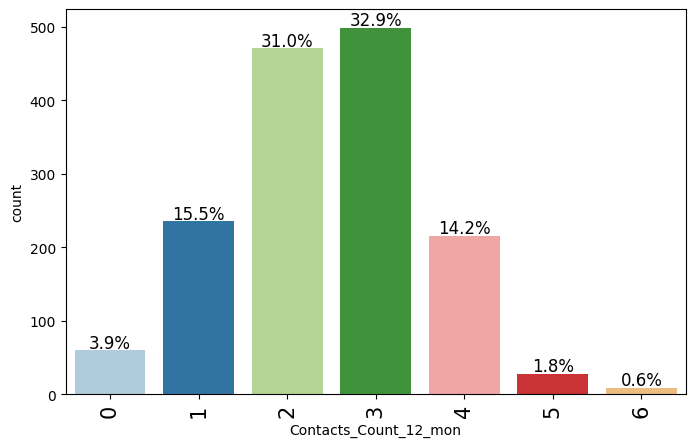

None


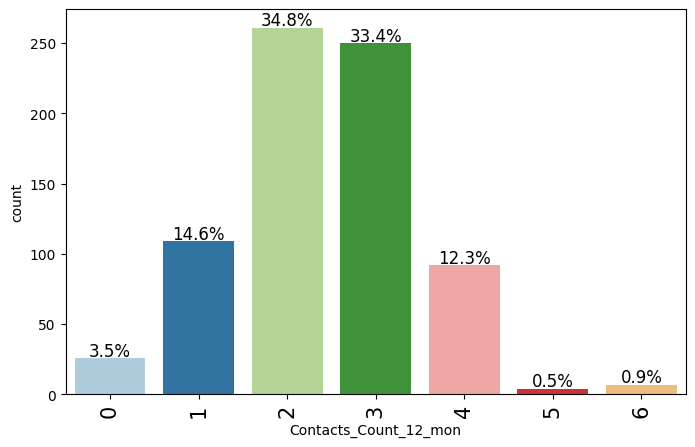

None


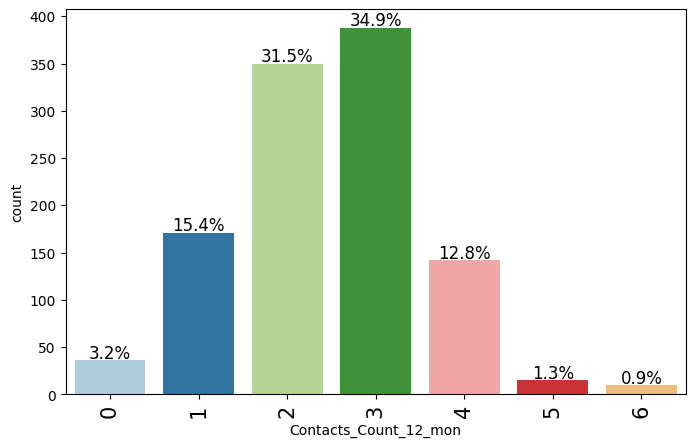

None


In [ ]:
feature='Contacts_Count_12_mon'
print(labeled_barplot(data, feature, perc=True, n=None))
print(labeled_barplot(dataE, feature, perc=True, n=None))
print(labeled_barplot(dataM, feature, perc=True, n=None))
print(labeled_barplot(dataABC, feature, perc=True, n=None))

**CONCLUSION**: The missing values in the Education_Level, Marital_Status, and Income_Category columns don't make a significant effect on the barplots.

####Numeric Variables

#####Customer_Age: Age in Years

Q1 quantile:  41.0
Q2 quantile:  46.0
Q3 quantile:  52.0
IQR:  11.0
Whisker1:  26
Whisker2:  68.5
Min:  26
Max:  73
0 (0.0%) of customers: < 26
2 (0.02%) of customers: > 68.5
None


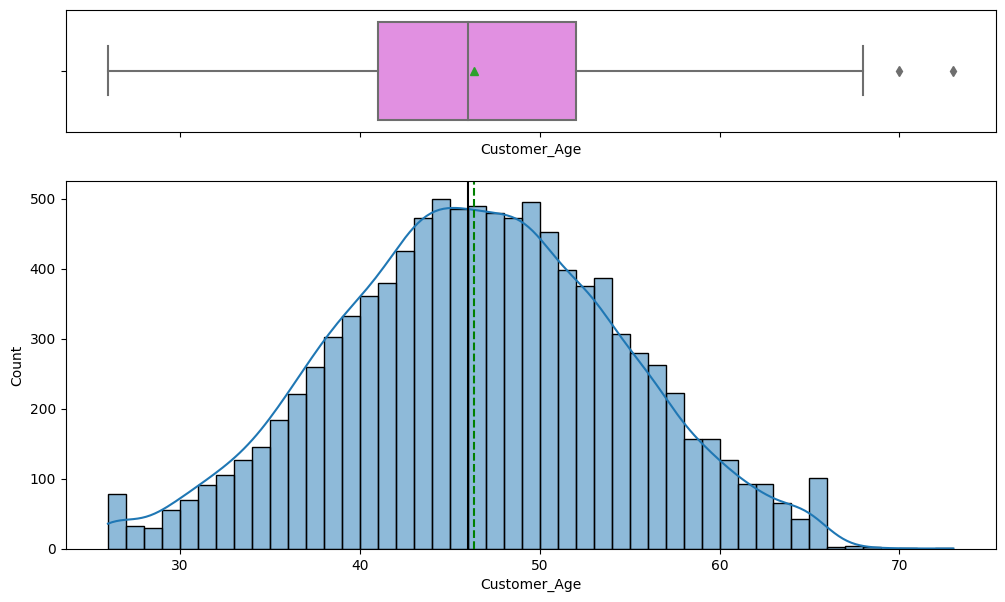

In [ ]:
feature='Customer_Age'
print(histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None))

Q1 quantile:  41.0
Q2 quantile:  47.0
Q3 quantile:  52.0
IQR:  11.0
Whisker1:  26
Whisker2:  67
Min:  26
Max:  67
0 (0.0%) of customers: < 26
0 (0.0%) of customers: > 67
None


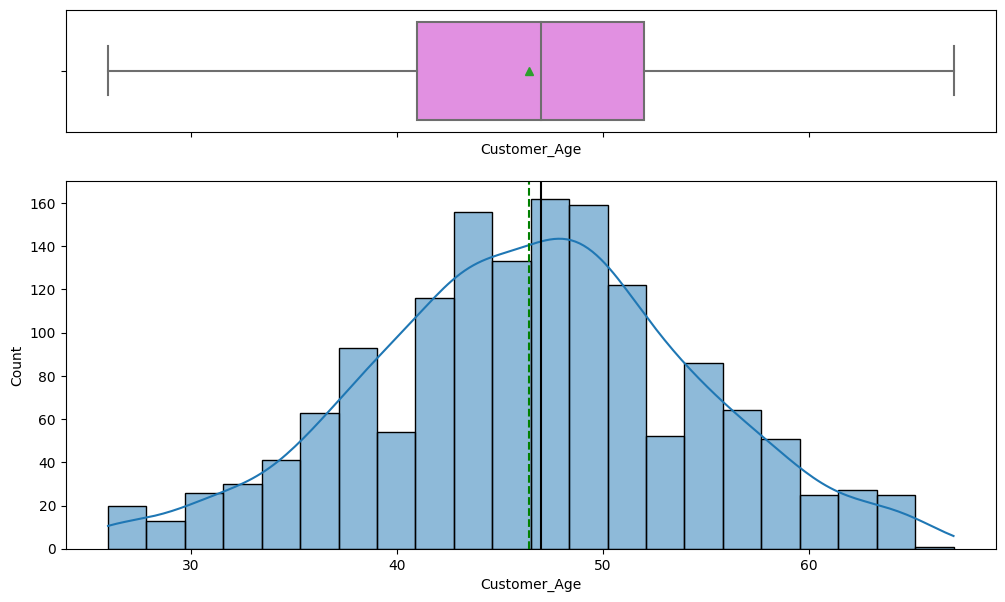

In [ ]:
feature='Customer_Age'
print(histogram_boxplot(dataE, feature, figsize=(12, 7), kde=True, bins=None))

Q1 quantile:  42.0
Q2 quantile:  45.0
Q3 quantile:  49.0
IQR:  7.0
Whisker1:  31.5
Whisker2:  59.5
Min:  26
Max:  65
18 (2.4%) of customers: < 31.5
26 (3.47%) of customers: > 59.5
None


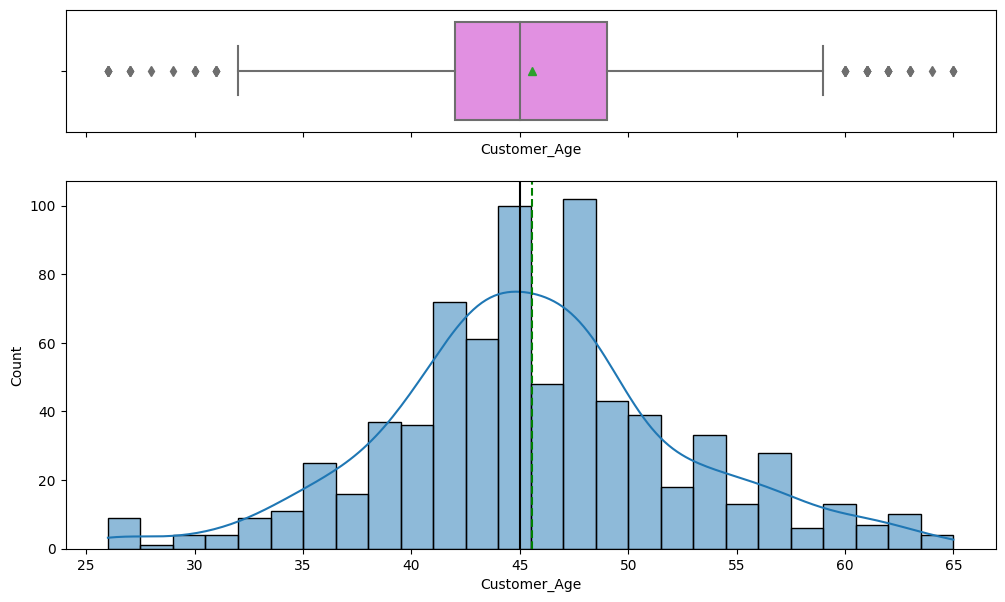

In [ ]:
feature='Customer_Age'
print(histogram_boxplot(dataM, feature, figsize=(12, 7), kde=True, bins=None))

Q1 quantile:  41.0
Q2 quantile:  46.0
Q3 quantile:  52.0
IQR:  11.0
Whisker1:  26
Whisker2:  68
Min:  26
Max:  68
0 (0.0%) of customers: < 26
0 (0.0%) of customers: > 68
None


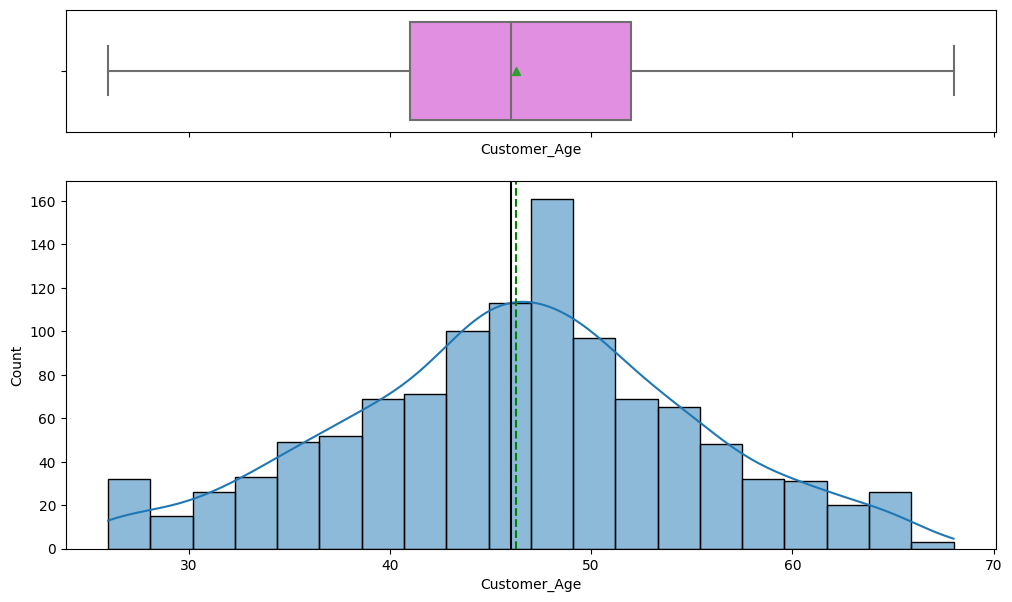

In [ ]:
feature='Customer_Age'
print(histogram_boxplot(dataABC, feature, figsize=(12, 7), kde=True, bins=None))

**CONCLUSION**:

#####Months_on_book: Period of relationship with the bank

Q1 quantile:  31.0
Q2 quantile:  36.0
Q3 quantile:  40.0
IQR:  9.0
Whisker1:  17.5
Whisker2:  53.5
Min:  13
Max:  56
188 (1.86%) of customers: < 17.5
198 (1.96%) of customers: > 53.5


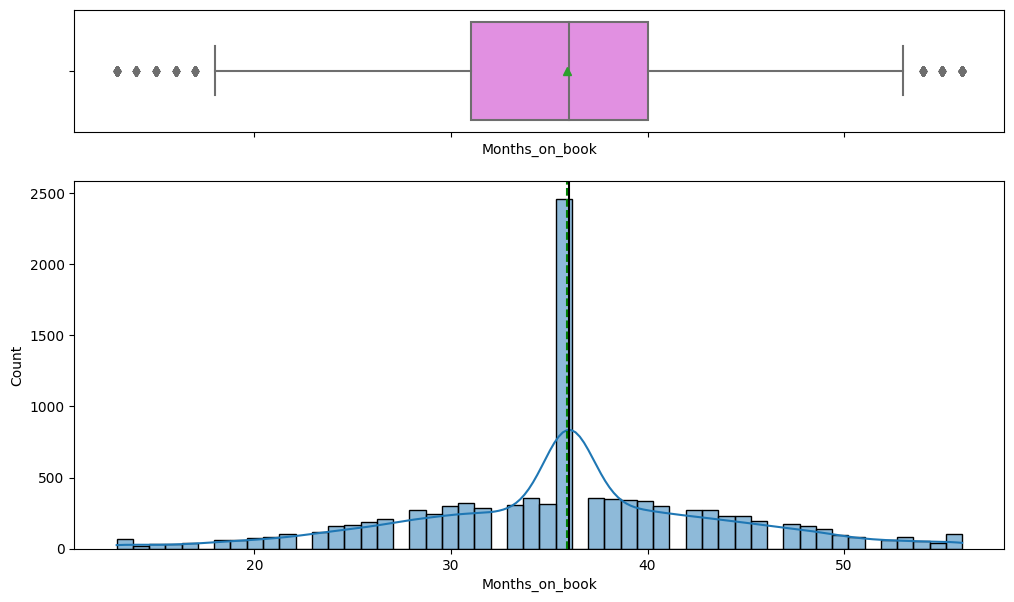

In [ ]:
histogram_boxplot(data, 'Months_on_book', figsize=(12, 7), kde=True, bins=None)

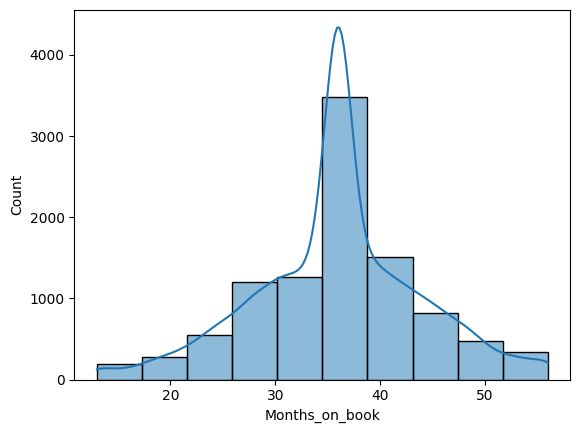

In [ ]:
sns.histplot(
        data=data, x='Months_on_book', kde=True, bins=10, palette="winter"
    );

Q1 quantile:  32.0
Q2 quantile:  36.0
Q3 quantile:  40.0
IQR:  8.0
Whisker1:  20.0
Whisker2:  52.0
Min:  13
Max:  56
51 (3.36%) of customers: < 20.0
37 (2.44%) of customers: > 52.0


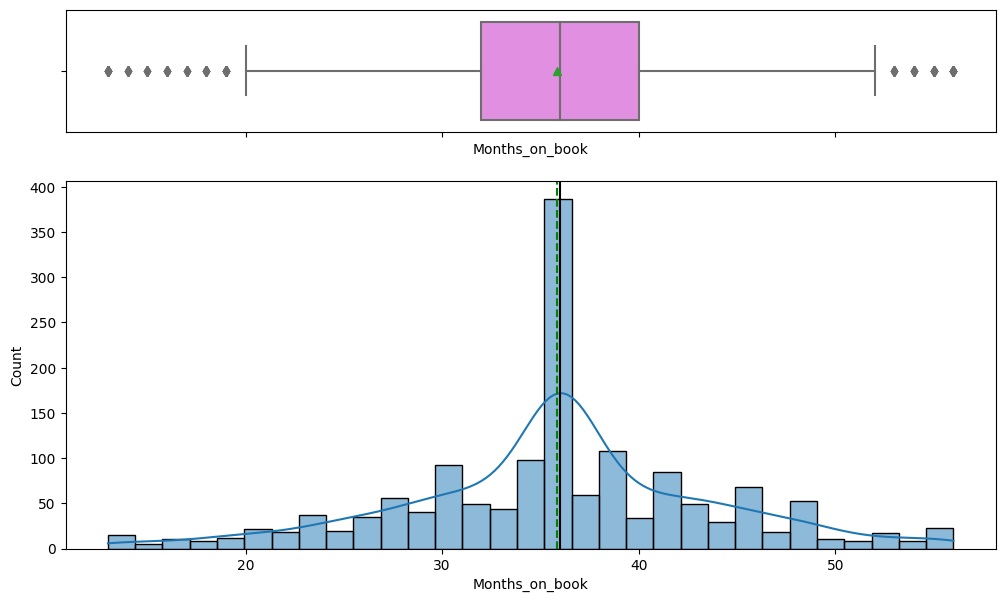

In [ ]:
histogram_boxplot(dataE, 'Months_on_book', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  32.0
Q2 quantile:  36.0
Q3 quantile:  39.0
IQR:  7.0
Whisker1:  21.5
Whisker2:  49.5
Min:  13
Max:  56
30 (4.01%) of customers: < 21.5
19 (2.54%) of customers: > 49.5


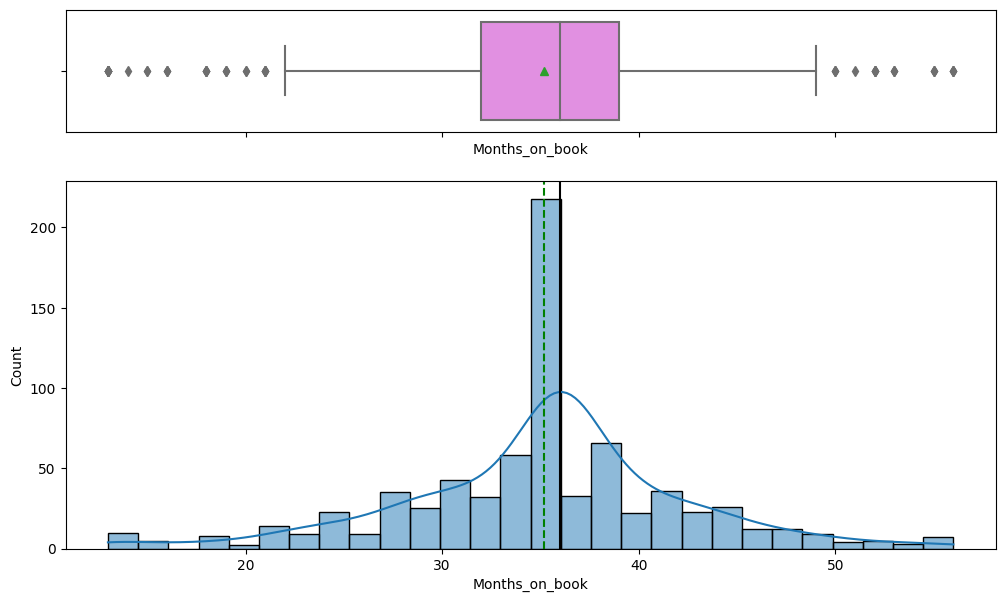

In [ ]:
histogram_boxplot(dataM, 'Months_on_book', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  31.0
Q2 quantile:  36.0
Q3 quantile:  40.0
IQR:  9.0
Whisker1:  17.5
Whisker2:  53.5
Min:  13
Max:  56
36 (3.24%) of customers: < 17.5
29 (2.61%) of customers: > 53.5


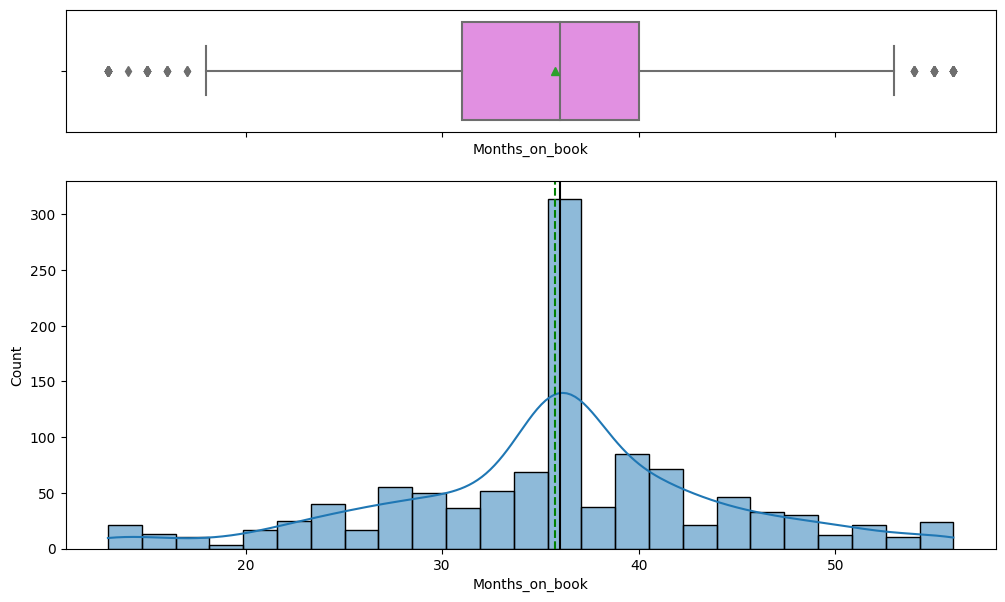

In [ ]:
histogram_boxplot(dataABC, 'Months_on_book', figsize=(12, 7), kde=True, bins=None)

**CONCLUSION**:

#####Credit_Limit: Credit Limit on the Credit Card

Q1 quantile:  2555.0
Q2 quantile:  4549.0
Q3 quantile:  11067.5
IQR:  8512.5
Whisker1:  1438.3
Whisker2:  23836.25
Min:  1438.3
Max:  34516.0
0 (0.0%) of customers: < 1438.3
984 (9.72%) of customers: > 23836.25


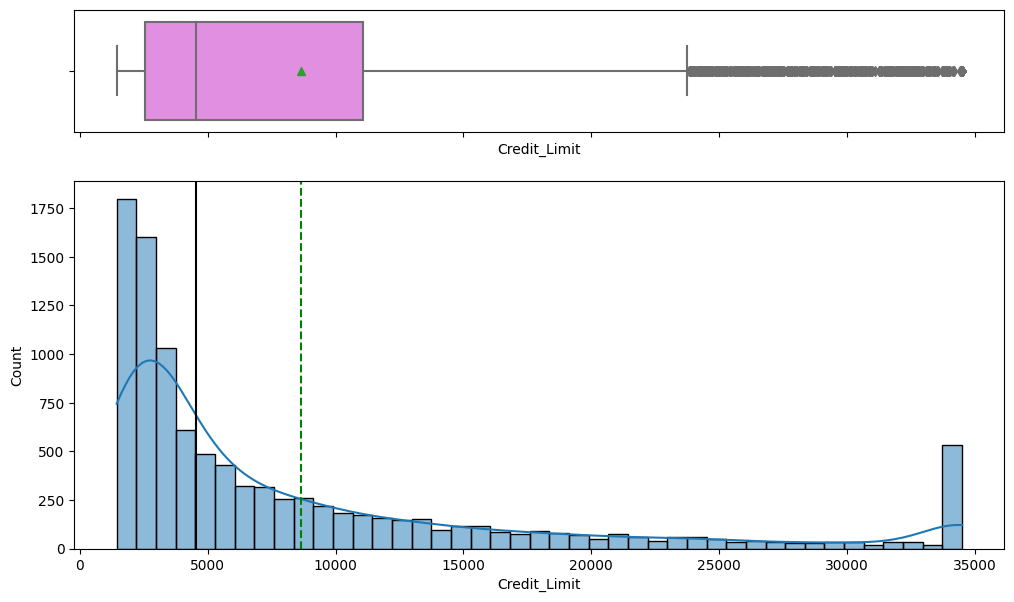

In [ ]:
histogram_boxplot(data, 'Credit_Limit', figsize=(12, 7), kde=True, bins=None)

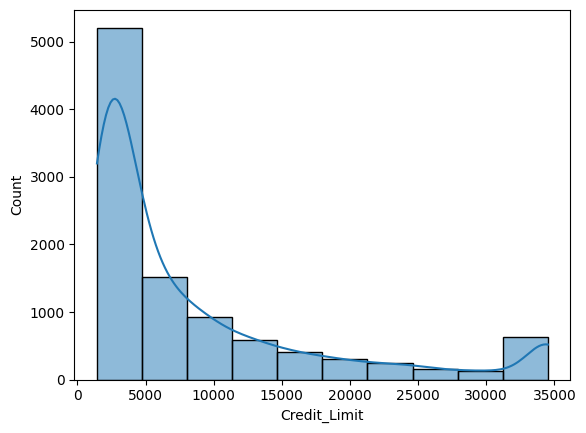

In [ ]:
sns.histplot(
        data=data, x='Credit_Limit', kde=True, bins=10, palette="winter"
    );

Q1 quantile:  2520.5
Q2 quantile:  4411.0
Q3 quantile:  10709.5
IQR:  8189.0
Whisker1:  1438.3
Whisker2:  22993.0
Min:  1438.3
Max:  34516.0
0 (0.0%) of customers: < 1438.3
154 (10.14%) of customers: > 22993.0


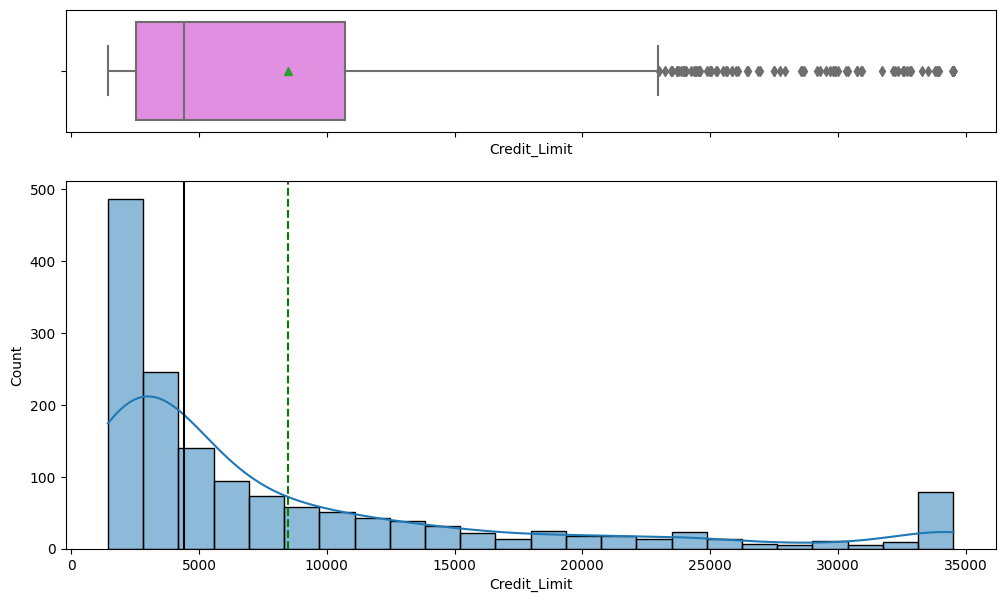

In [ ]:
histogram_boxplot(dataE, 'Credit_Limit', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  2699.0
Q2 quantile:  5222.0
Q3 quantile:  12778.0
IQR:  10079.0
Whisker1:  1438.3
Whisker2:  27896.5
Min:  1438.3
Max:  34516.0
0 (0.0%) of customers: < 1438.3
66 (8.81%) of customers: > 27896.5


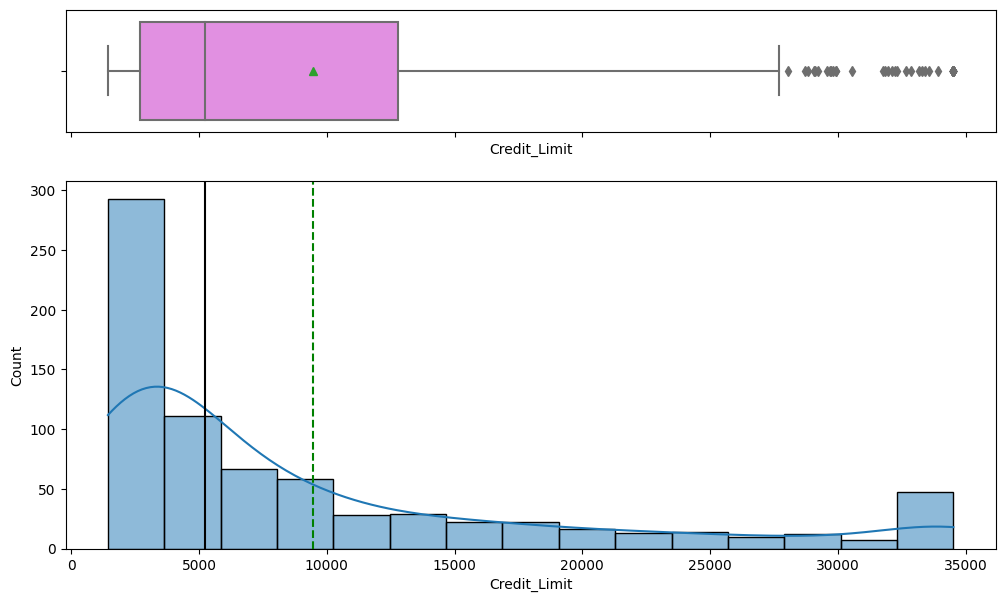

In [ ]:
histogram_boxplot(dataM, 'Credit_Limit', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  3137.0
Q2 quantile:  6380.0
Q3 quantile:  12420.25
IQR:  9283.25
Whisker1:  1438.3
Whisker2:  26345.125
Min:  1438.3
Max:  34516.0
0 (0.0%) of customers: < 1438.3
81 (7.28%) of customers: > 26345.125


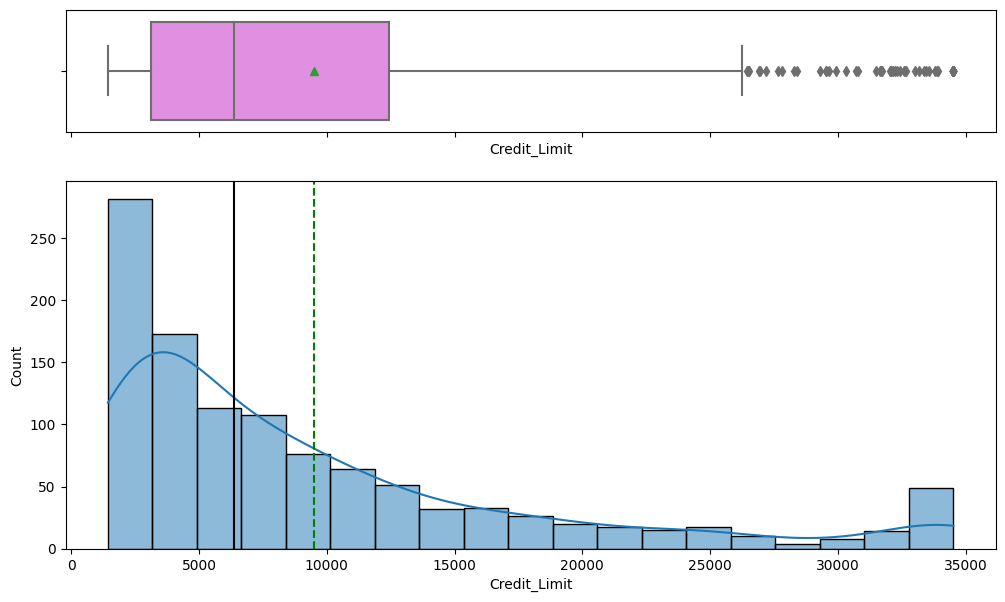

In [ ]:
histogram_boxplot(dataABC, 'Credit_Limit', figsize=(12, 7), kde=True, bins=None)

**CONCLUSION**:

#####Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance

Q1 quantile:  359.0
Q2 quantile:  1276.0
Q3 quantile:  1784.0
IQR:  1425.0
Whisker1:  0
Whisker2:  2517
Min:  0
Max:  2517
0 (0.0%) of customers: < 0
0 (0.0%) of customers: > 2517


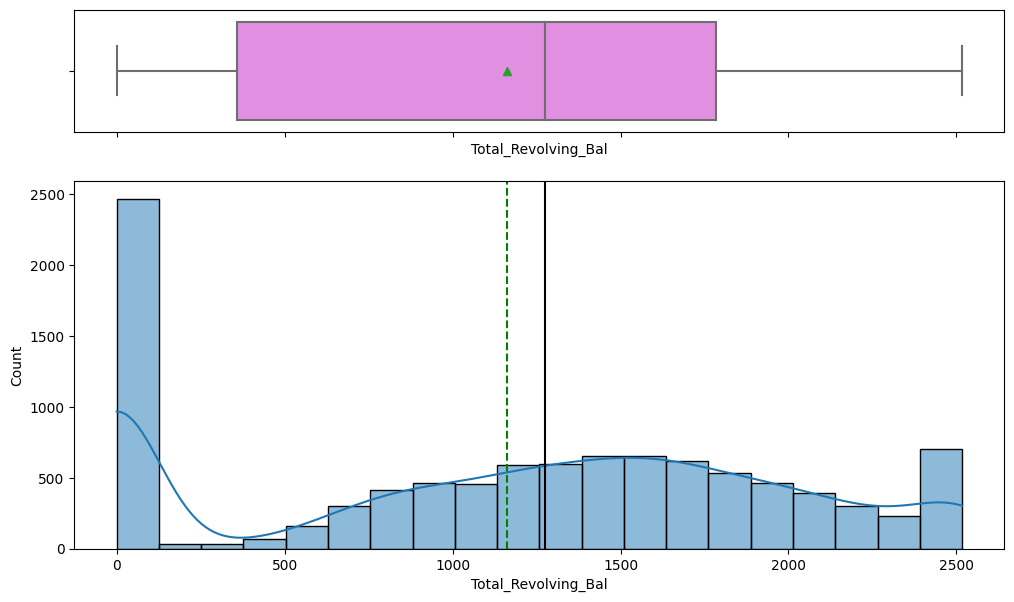

In [ ]:
histogram_boxplot(data, 'Total_Revolving_Bal', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  252.0
Q2 quantile:  1270.0
Q3 quantile:  1785.0
IQR:  1533.0
Whisker1:  0
Whisker2:  2517
Min:  0
Max:  2517
0 (0.0%) of customers: < 0
0 (0.0%) of customers: > 2517


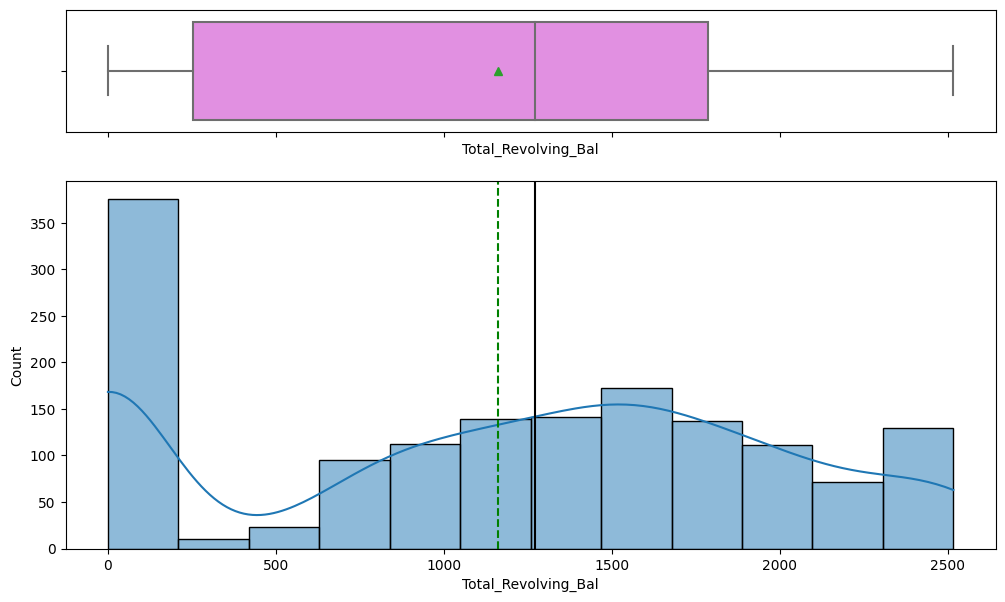

In [ ]:
histogram_boxplot(dataE, 'Total_Revolving_Bal', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  0.0
Q2 quantile:  1261.0
Q3 quantile:  1793.0
IQR:  1793.0
Whisker1:  0
Whisker2:  2517
Min:  0
Max:  2517
0 (0.0%) of customers: < 0
0 (0.0%) of customers: > 2517


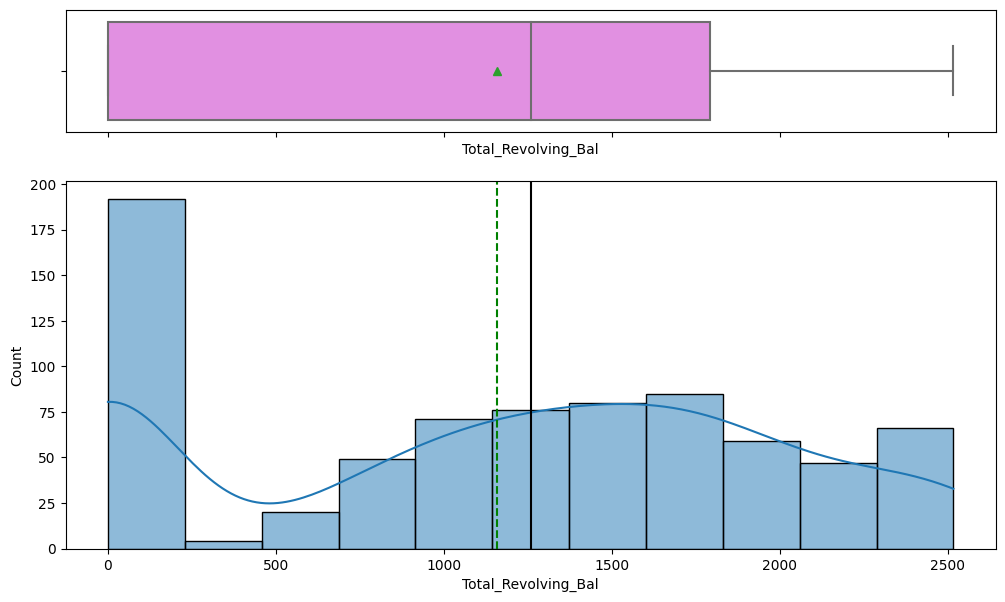

In [ ]:
histogram_boxplot(dataM, 'Total_Revolving_Bal', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  0.0
Q2 quantile:  1243.0
Q3 quantile:  1785.5
IQR:  1785.5
Whisker1:  0
Whisker2:  2517
Min:  0
Max:  2517
0 (0.0%) of customers: < 0
0 (0.0%) of customers: > 2517


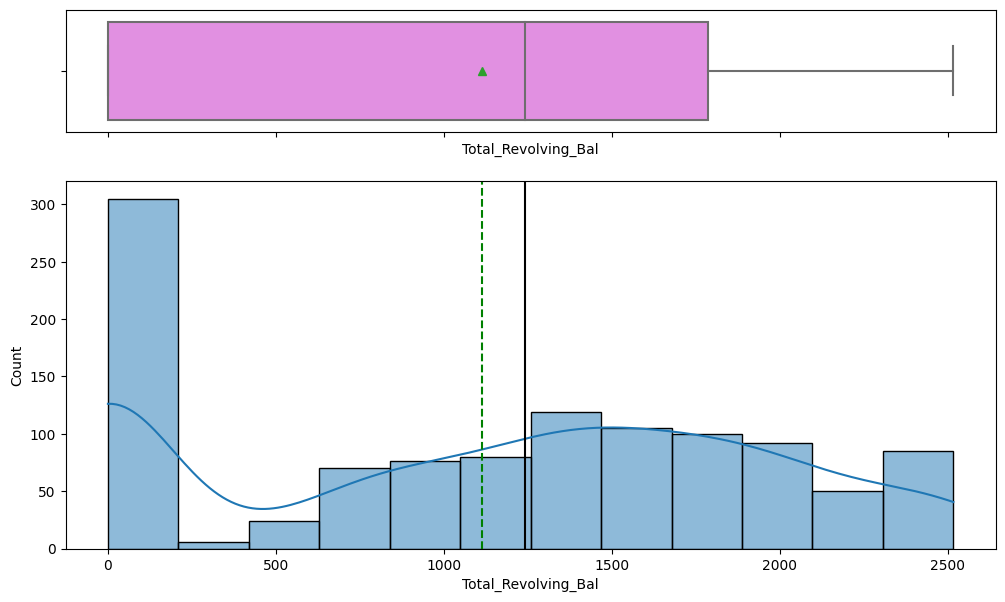

In [ ]:
histogram_boxplot(dataABC, 'Total_Revolving_Bal', figsize=(12, 7), kde=True, bins=None)

**CONCLUSION**:

#####Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)

Q1 quantile:  1324.5
Q2 quantile:  3474.0
Q3 quantile:  9859.0
IQR:  8534.5
Whisker1:  3.0
Whisker2:  22660.75
Min:  3.0
Max:  34516.0
0 (0.0%) of customers: < 3.0
963 (9.51%) of customers: > 22660.75


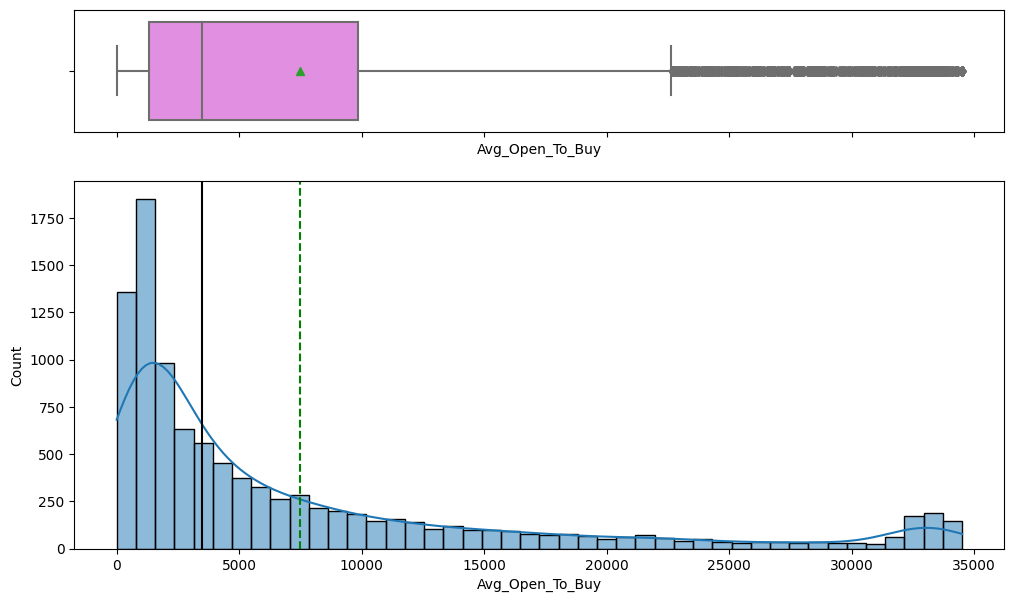

In [ ]:
histogram_boxplot(data, 'Avg_Open_To_Buy', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  1240.0
Q2 quantile:  3393.0
Q3 quantile:  9577.0
IQR:  8337.0
Whisker1:  14.0
Whisker2:  22082.5
Min:  14.0
Max:  34516.0
0 (0.0%) of customers: < 14.0
148 (9.74%) of customers: > 22082.5


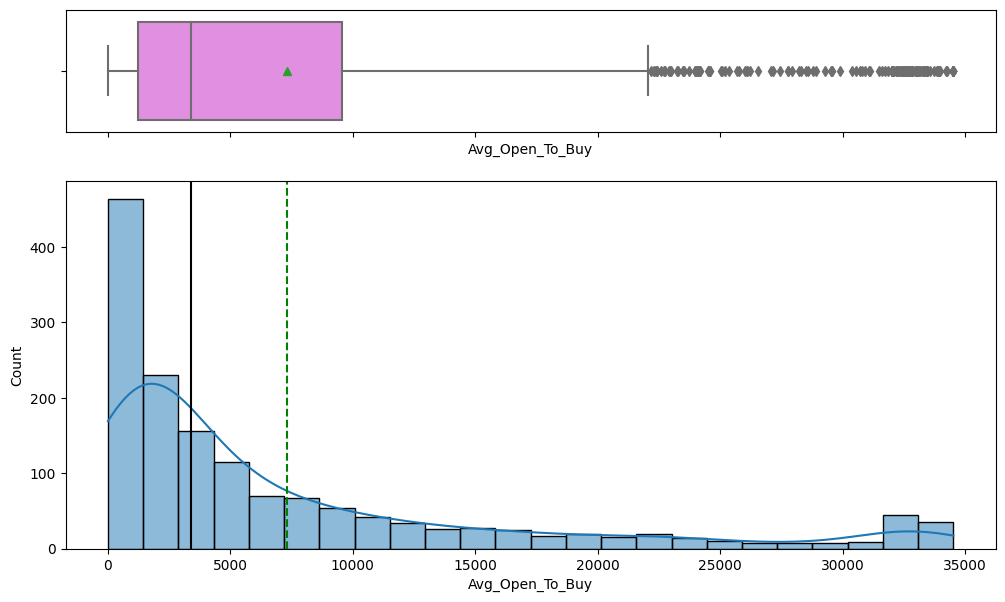

In [ ]:
histogram_boxplot(dataE, 'Avg_Open_To_Buy', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  1438.3
Q2 quantile:  3983.0
Q3 quantile:  11350.0
IQR:  9911.7
Whisker1:  111.0
Whisker2:  26217.550000000003
Min:  111.0
Max:  34516.0
0 (0.0%) of customers: < 111.0
71 (9.48%) of customers: > 26217.550000000003


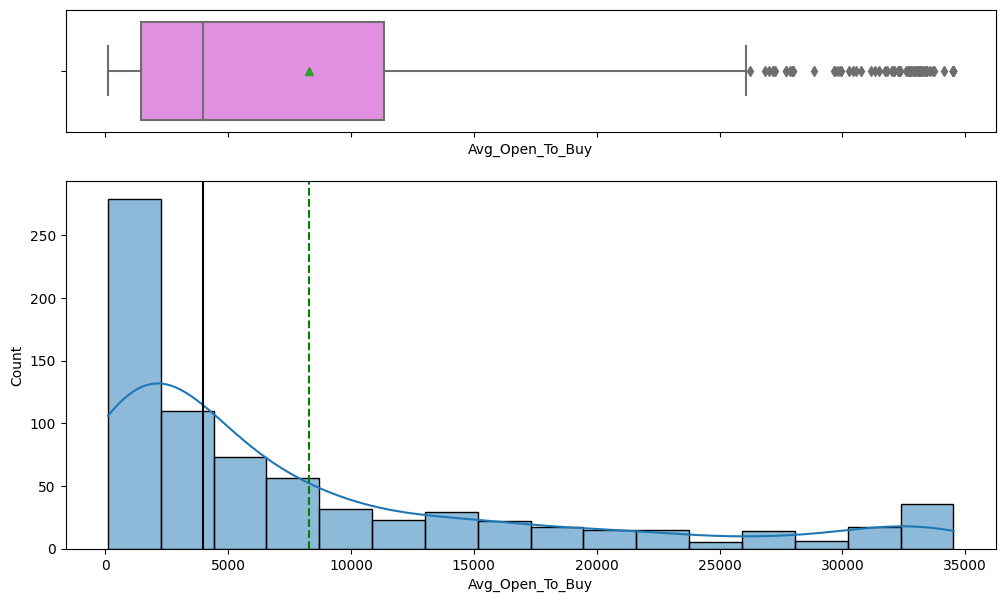

In [ ]:
histogram_boxplot(dataM, 'Avg_Open_To_Buy', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  1952.25
Q2 quantile:  5464.5
Q3 quantile:  11378.25
IQR:  9426.0
Whisker1:  14.0
Whisker2:  25517.25
Min:  14.0
Max:  34516.0
0 (0.0%) of customers: < 14.0
81 (7.28%) of customers: > 25517.25


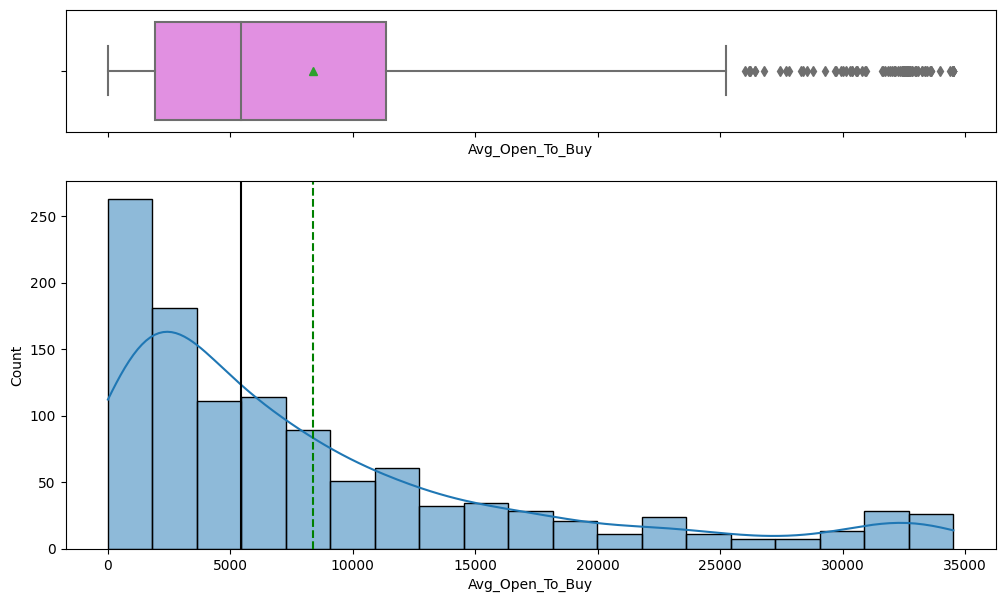

In [ ]:
histogram_boxplot(dataABC, 'Avg_Open_To_Buy', figsize=(12, 7), kde=True, bins=None)

**CONCLUSION**:

#####Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter

Q1 quantile:  0.631
Q2 quantile:  0.736
Q3 quantile:  0.859
IQR:  0.22799999999999998
Whisker1:  0.28900000000000003
Whisker2:  1.201
Min:  0.0
Max:  3.397
48 (0.47%) of customers: < 0.28900000000000003
348 (3.44%) of customers: > 1.201


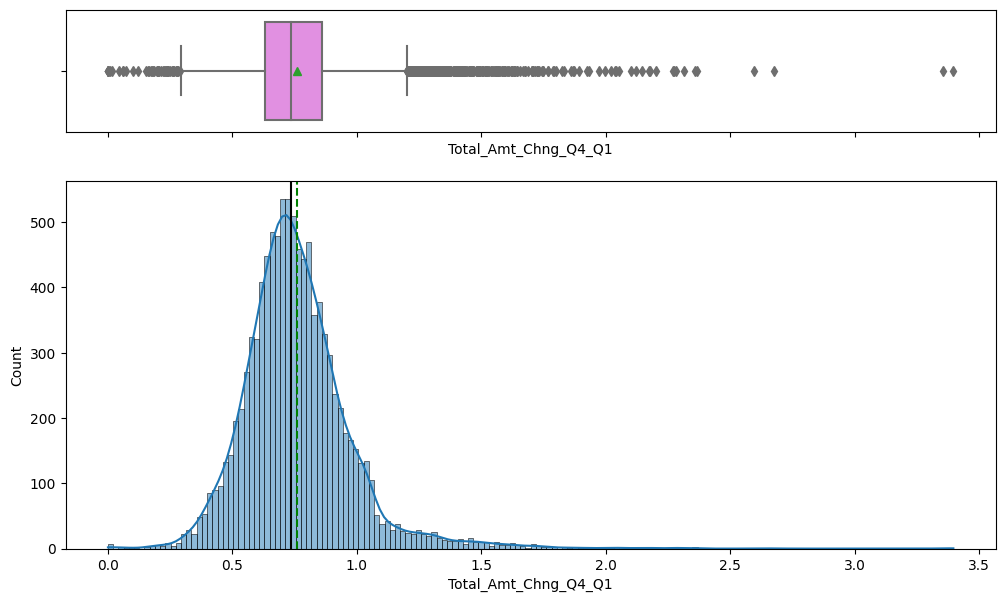

In [ ]:
histogram_boxplot(data, 'Total_Amt_Chng_Q4_Q1', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  0.6295
Q2 quantile:  0.742
Q3 quantile:  0.862
IQR:  0.23250000000000004
Whisker1:  0.2807499999999999
Whisker2:  1.21075
Min:  0.061
Max:  2.18
9 (0.59%) of customers: < 0.2807499999999999
51 (3.36%) of customers: > 1.21075


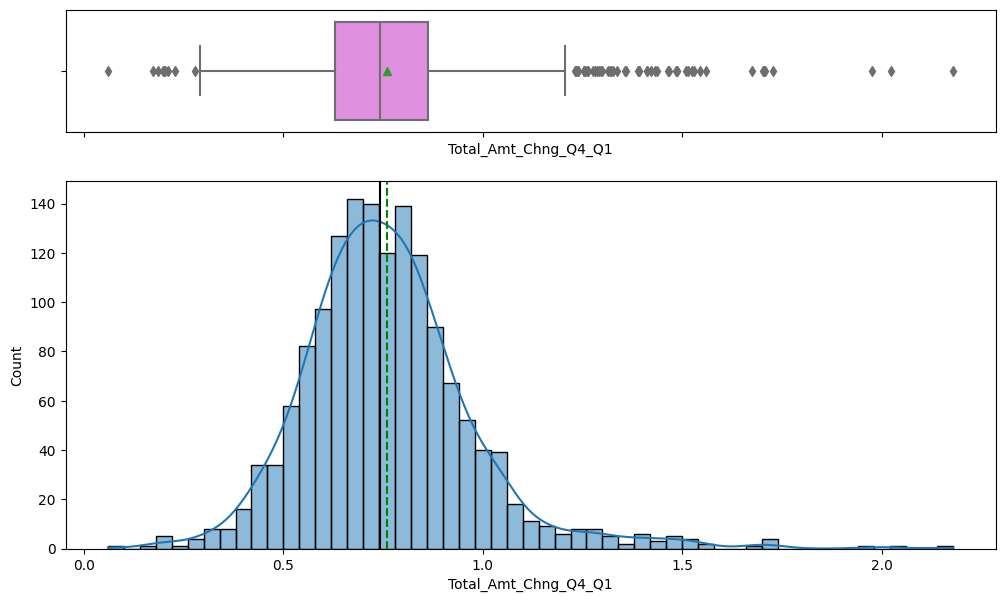

In [ ]:
histogram_boxplot(dataE, 'Total_Amt_Chng_Q4_Q1', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  0.64
Q2 quantile:  0.734
Q3 quantile:  0.856
IQR:  0.21599999999999997
Whisker1:  0.31600000000000006
Whisker2:  1.18
Min:  0.018
Max:  2.204
2 (0.27%) of customers: < 0.31600000000000006
16 (2.14%) of customers: > 1.18


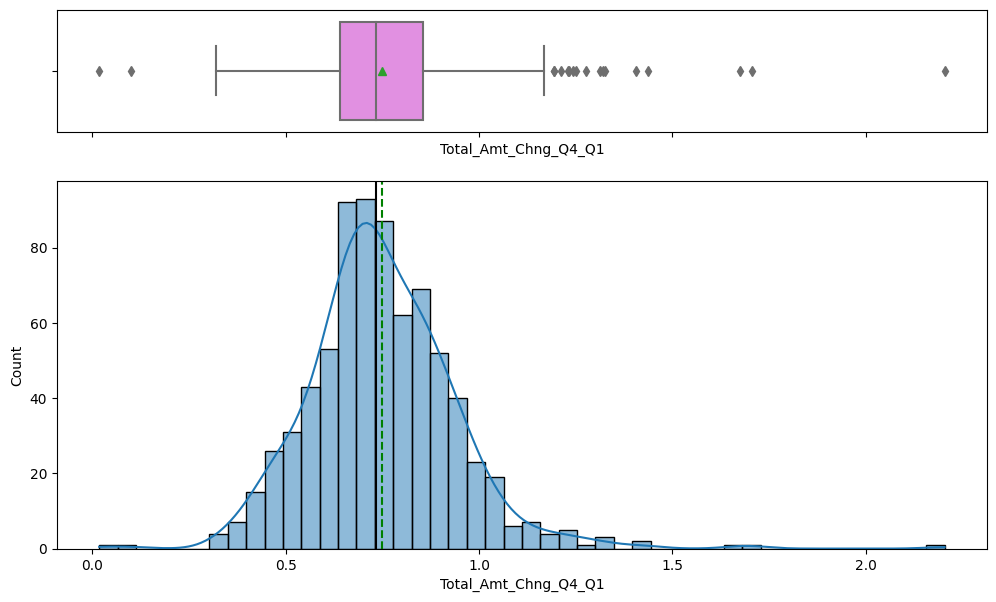

In [ ]:
histogram_boxplot(dataM, 'Total_Amt_Chng_Q4_Q1', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  0.64375
Q2 quantile:  0.742
Q3 quantile:  0.868
IQR:  0.22424999999999995
Whisker1:  0.3073750000000001
Whisker2:  1.204375
Min:  0.01
Max:  2.675
7 (0.63%) of customers: < 0.3073750000000001
34 (3.06%) of customers: > 1.204375


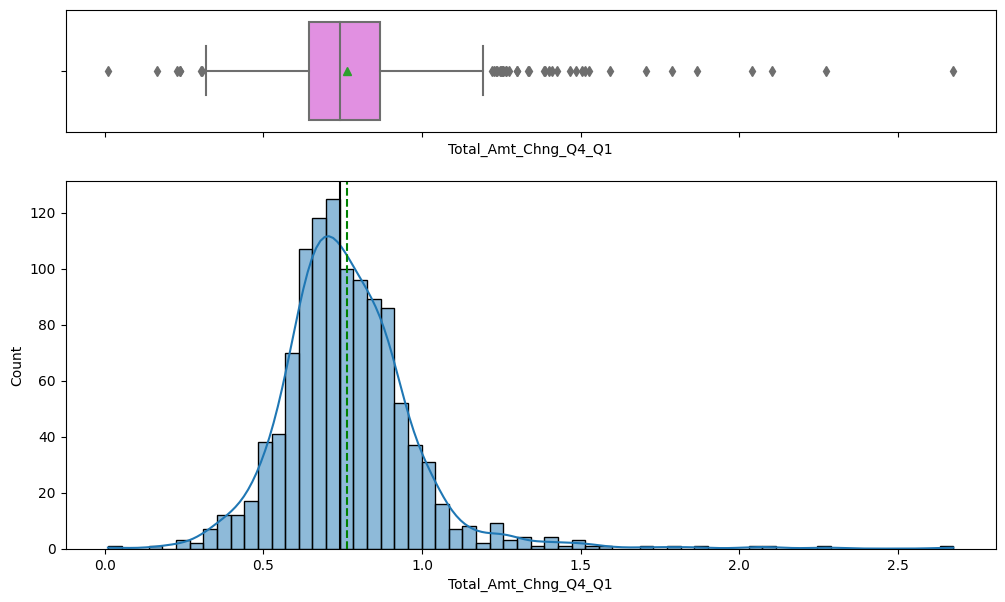

In [ ]:
histogram_boxplot(dataABC, 'Total_Amt_Chng_Q4_Q1', figsize=(12, 7), kde=True, bins=None)

**CONCLUSION**:

#####Total_Trans_Amt: Total Transaction Amount (Last 12 months)

Q1 quantile:  2155.5
Q2 quantile:  3899.0
Q3 quantile:  4741.0
IQR:  2585.5
Whisker1:  510
Whisker2:  8619.25
Min:  510
Max:  18484
0 (0.0%) of customers: < 510
896 (8.85%) of customers: > 8619.25


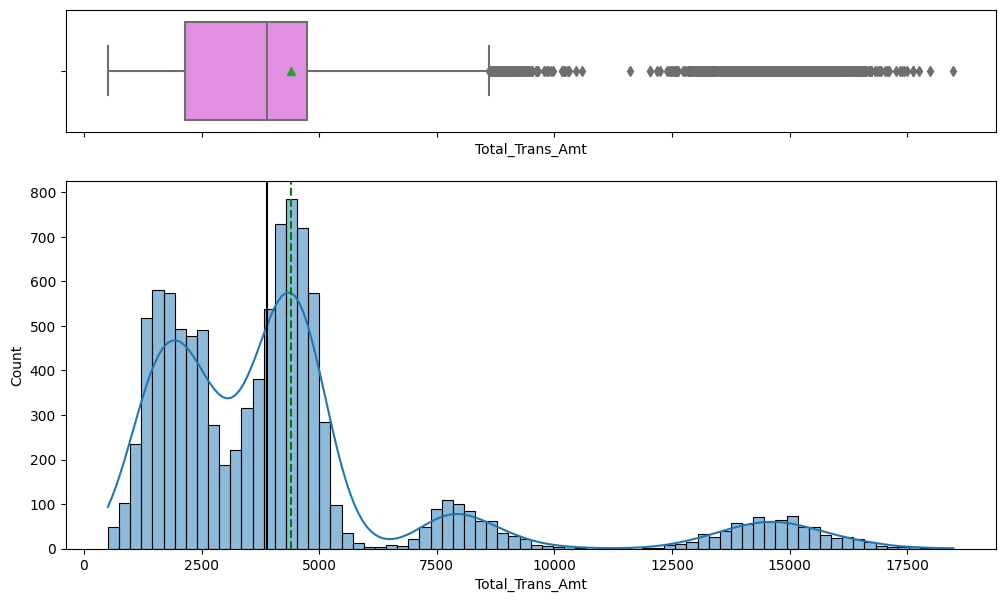

In [ ]:
histogram_boxplot(data, 'Total_Trans_Amt', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  2207.5
Q2 quantile:  3872.0
Q3 quantile:  4685.0
IQR:  2477.5
Whisker1:  615
Whisker2:  8401.25
Min:  615
Max:  18484
0 (0.0%) of customers: < 615
153 (10.07%) of customers: > 8401.25


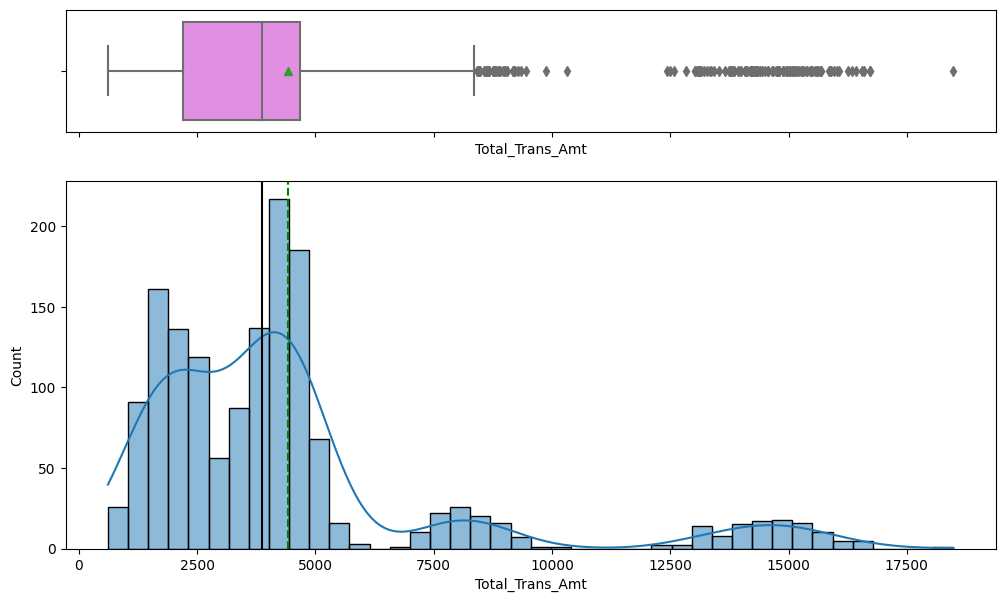

In [ ]:
histogram_boxplot(dataE, 'Total_Trans_Amt', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  2494.0
Q2 quantile:  4182.0
Q3 quantile:  4887.0
IQR:  2393.0
Whisker1:  647
Whisker2:  8476.5
Min:  647
Max:  16732
0 (0.0%) of customers: < 647
72 (9.61%) of customers: > 8476.5


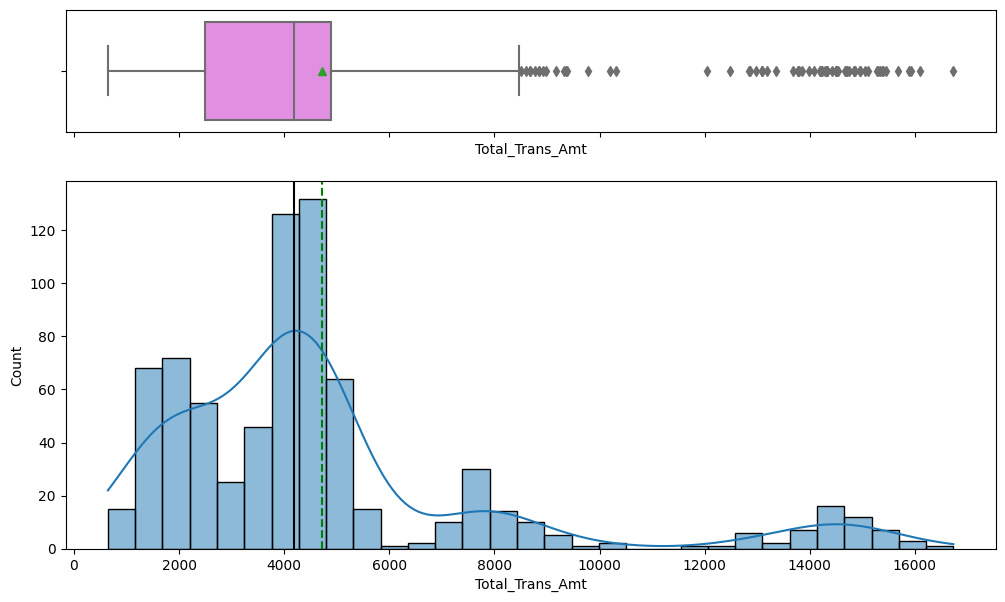

In [ ]:
histogram_boxplot(dataM, 'Total_Trans_Amt', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  2452.75
Q2 quantile:  4107.0
Q3 quantile:  4725.0
IQR:  2272.25
Whisker1:  644
Whisker2:  8133.375
Min:  644
Max:  16908
0 (0.0%) of customers: < 644
79 (7.1%) of customers: > 8133.375


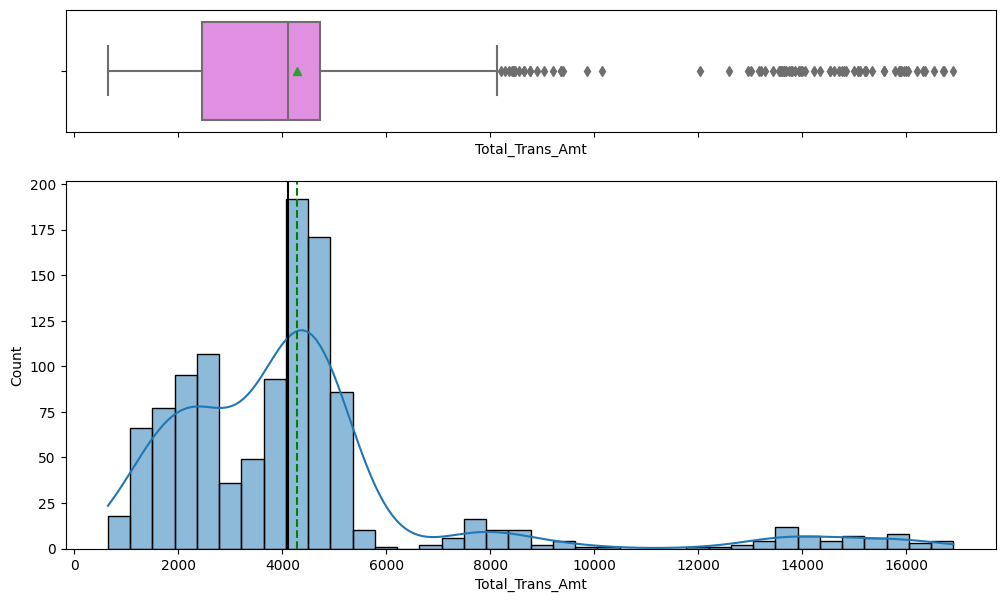

In [ ]:
histogram_boxplot(dataABC, 'Total_Trans_Amt', figsize=(12, 7), kde=True, bins=None)

**CONCLUSION**:

#####Total_Trans_Ct: Total Transaction Count (Last 12 months)

Q1 quantile:  45.0
Q2 quantile:  67.0
Q3 quantile:  81.0
IQR:  36.0
Whisker1:  10
Whisker2:  135.0
Min:  10
Max:  139
0 (0.0%) of customers: < 10
2 (0.02%) of customers: > 135.0


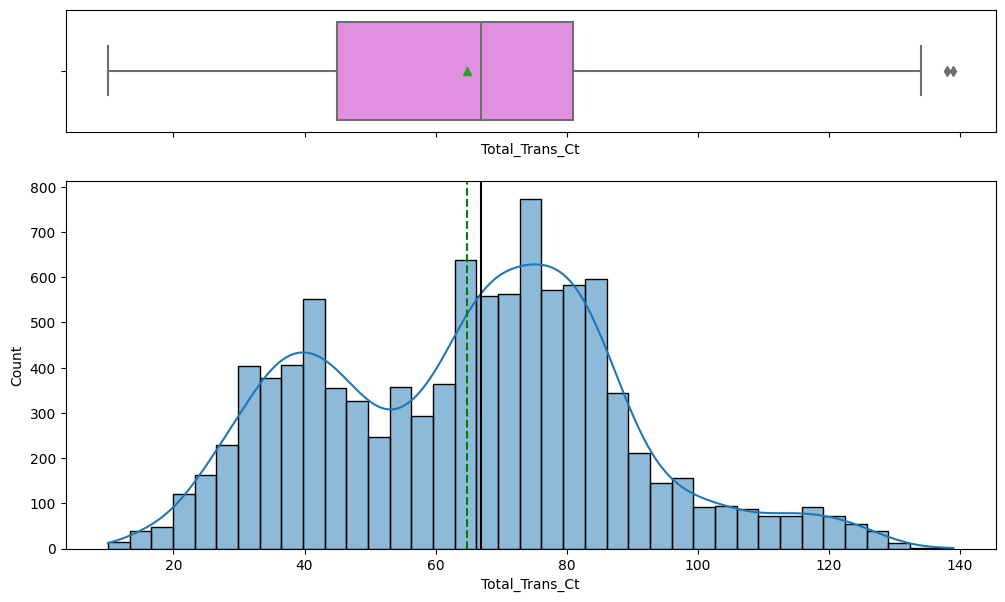

In [ ]:
histogram_boxplot(data, 'Total_Trans_Ct', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  45.0
Q2 quantile:  67.0
Q3 quantile:  80.0
IQR:  35.0
Whisker1:  10
Whisker2:  132.5
Min:  10
Max:  139
0 (0.0%) of customers: < 10
1 (0.07%) of customers: > 132.5


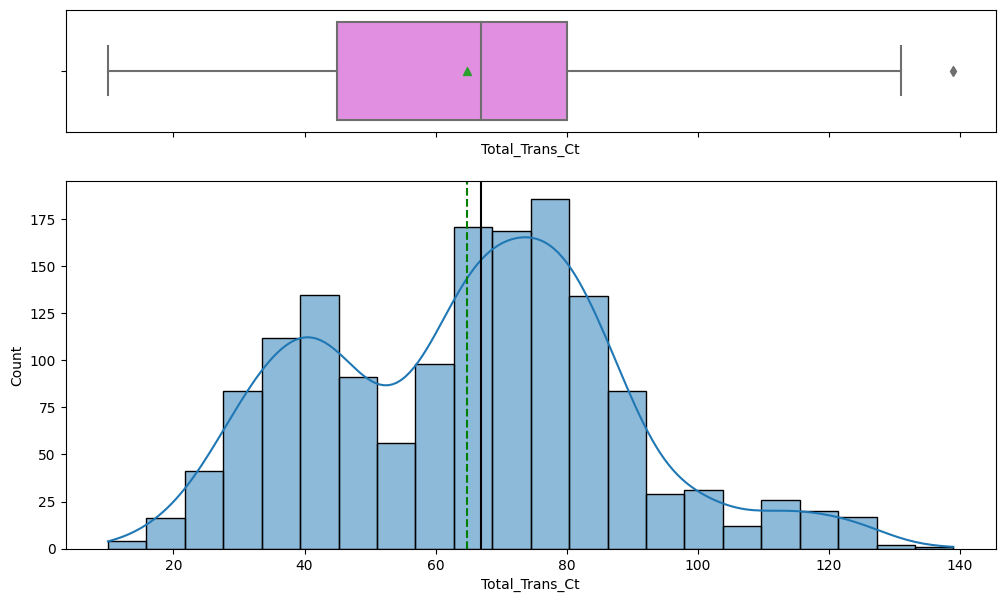

In [ ]:
histogram_boxplot(dataE, 'Total_Trans_Ct', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  49.0
Q2 quantile:  69.0
Q3 quantile:  82.0
IQR:  33.0
Whisker1:  15
Whisker2:  131
Min:  15
Max:  131
0 (0.0%) of customers: < 15
0 (0.0%) of customers: > 131


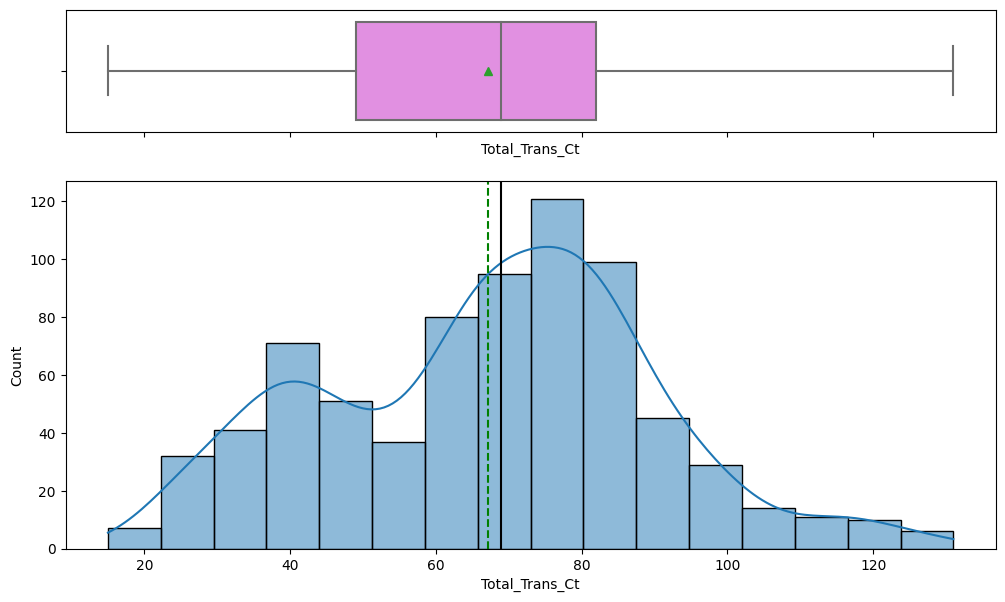

In [ ]:
histogram_boxplot(dataM, 'Total_Trans_Ct', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  48.0
Q2 quantile:  69.0
Q3 quantile:  81.0
IQR:  33.0
Whisker1:  14
Whisker2:  130.5
Min:  14
Max:  138
0 (0.0%) of customers: < 14
1 (0.09%) of customers: > 130.5


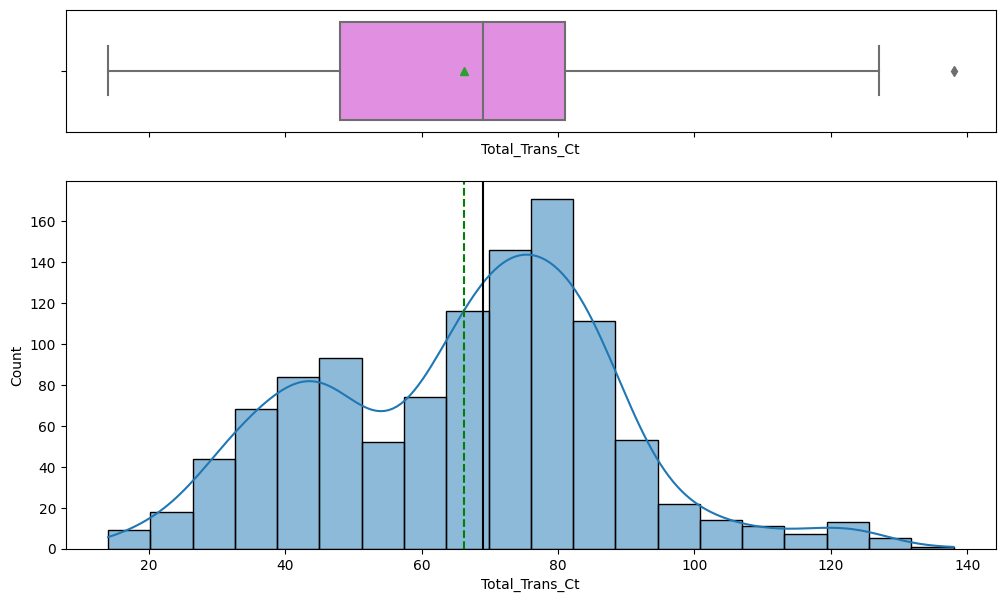

In [ ]:
histogram_boxplot(dataABC, 'Total_Trans_Ct', figsize=(12, 7), kde=True, bins=None)

**CONCLUSION**:

#####Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter

Q1 quantile:  0.582
Q2 quantile:  0.702
Q3 quantile:  0.818
IQR:  0.236
Whisker1:  0.22799999999999998
Whisker2:  1.172
Min:  0.0
Max:  3.714
96 (0.95%) of customers: < 0.22799999999999998
298 (2.94%) of customers: > 1.172


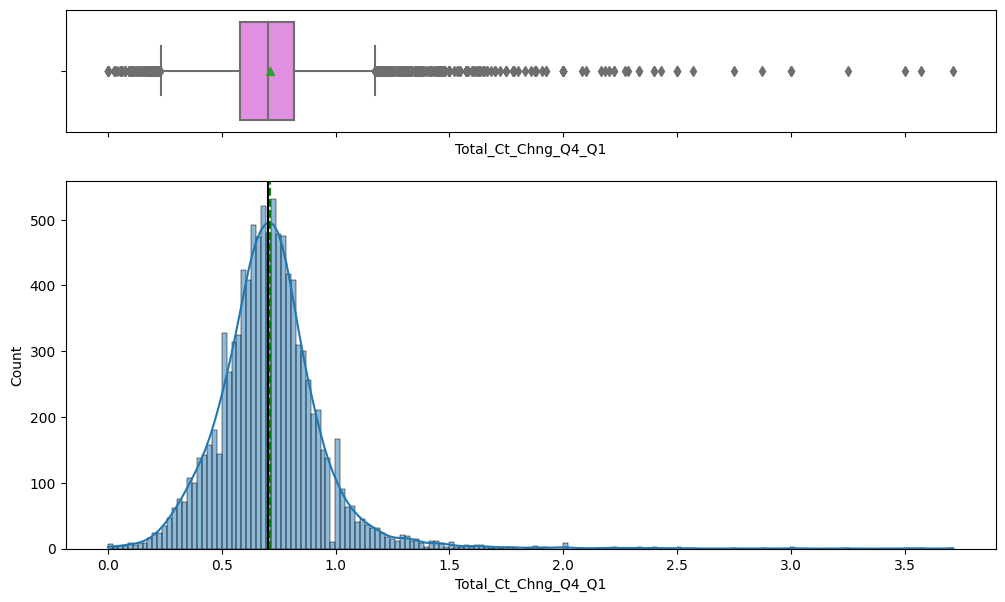

In [ ]:
histogram_boxplot(data, 'Total_Ct_Chng_Q4_Q1', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  0.5785
Q2 quantile:  0.707
Q3 quantile:  0.821
IQR:  0.24249999999999994
Whisker1:  0.2147500000000001
Whisker2:  1.1847499999999997
Min:  0.028
Max:  2.571
13 (0.86%) of customers: < 0.2147500000000001
45 (2.96%) of customers: > 1.1847499999999997


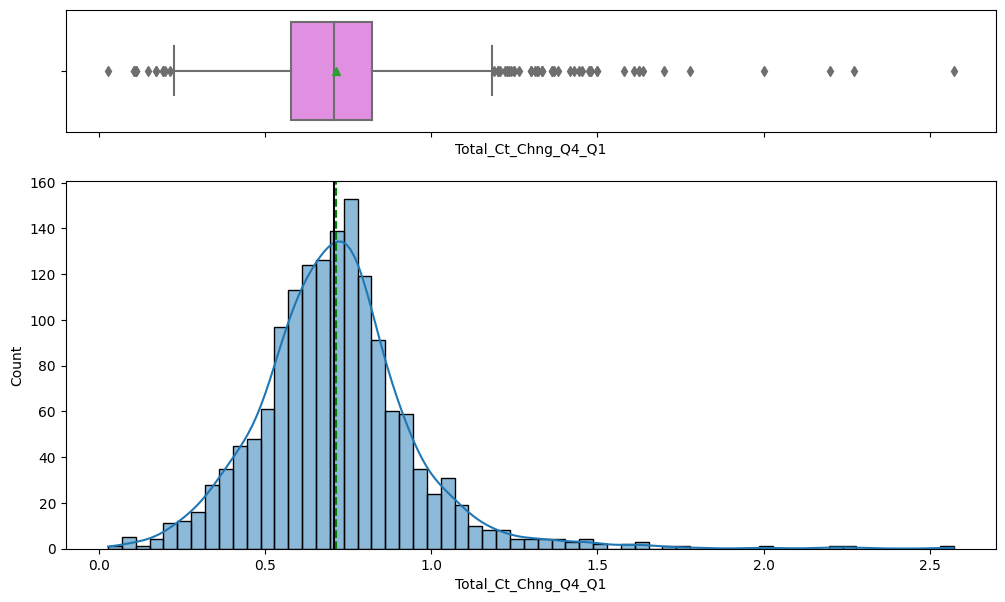

In [ ]:
histogram_boxplot(dataE, 'Total_Ct_Chng_Q4_Q1', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  0.582
Q2 quantile:  0.707
Q3 quantile:  0.815
IQR:  0.23299999999999998
Whisker1:  0.23249999999999998
Whisker2:  1.1644999999999999
Min:  0.077
Max:  2.333
6 (0.8%) of customers: < 0.23249999999999998
22 (2.94%) of customers: > 1.1644999999999999


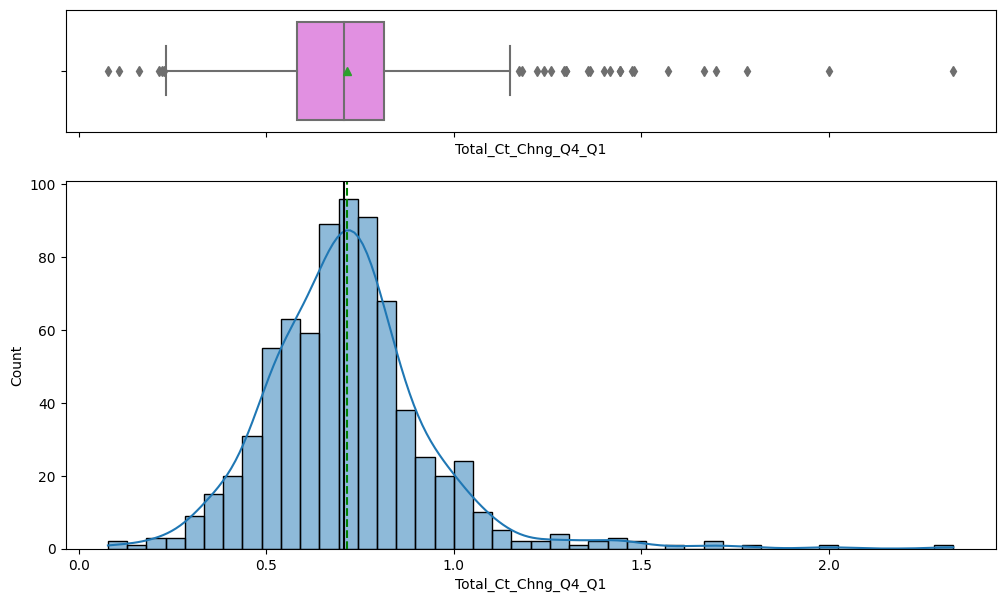

In [ ]:
histogram_boxplot(dataM, 'Total_Ct_Chng_Q4_Q1', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  0.5825
Q2 quantile:  0.704
Q3 quantile:  0.8242499999999999
IQR:  0.2417499999999999
Whisker1:  0.21987500000000015
Whisker2:  1.1868749999999997
Min:  0.0
Max:  3.571
12 (1.08%) of customers: < 0.21987500000000015
34 (3.06%) of customers: > 1.1868749999999997


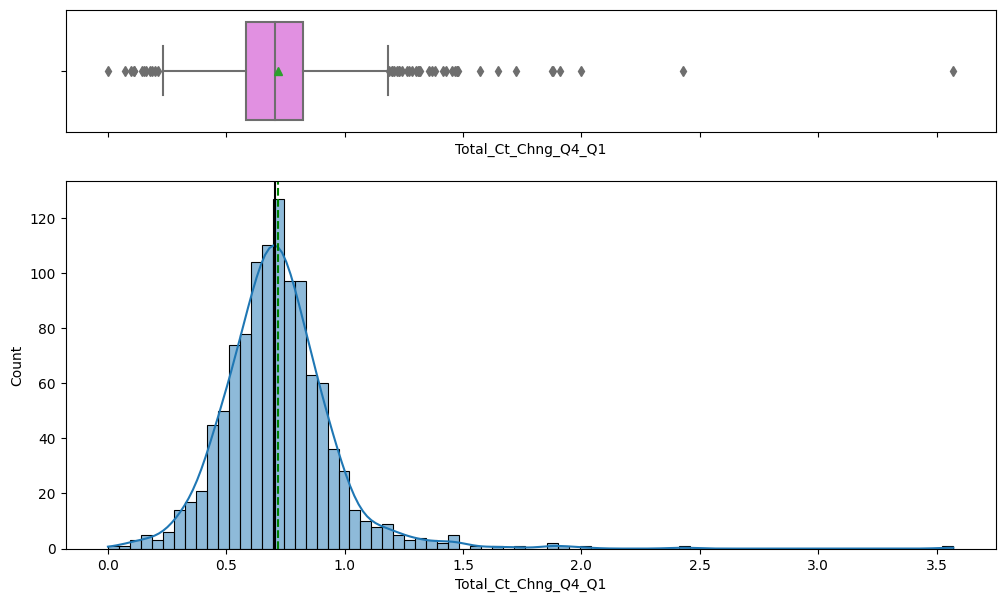

In [ ]:
histogram_boxplot(dataABC, 'Total_Ct_Chng_Q4_Q1', figsize=(12, 7), kde=True, bins=None)

**CONCLUSION**:

#####Avg_Utilization_Ratio: How much of the available credit the customer spent

Q1 quantile:  0.023
Q2 quantile:  0.176
Q3 quantile:  0.503
IQR:  0.48
Whisker1:  0.0
Whisker2:  0.999
Min:  0.0
Max:  0.999
0 (0.0%) of customers: < 0.0
0 (0.0%) of customers: > 0.999


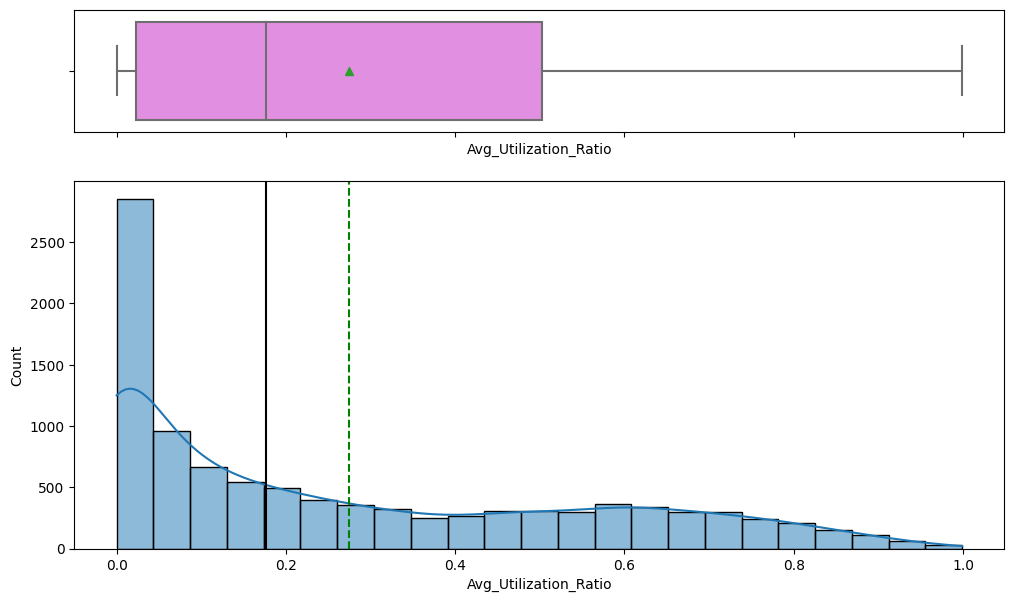

In [ ]:
histogram_boxplot(data, 'Avg_Utilization_Ratio', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  0.0185
Q2 quantile:  0.171
Q3 quantile:  0.5145
IQR:  0.49599999999999994
Whisker1:  0.0
Whisker2:  0.992
Min:  0.0
Max:  0.992
0 (0.0%) of customers: < 0.0
0 (0.0%) of customers: > 0.992


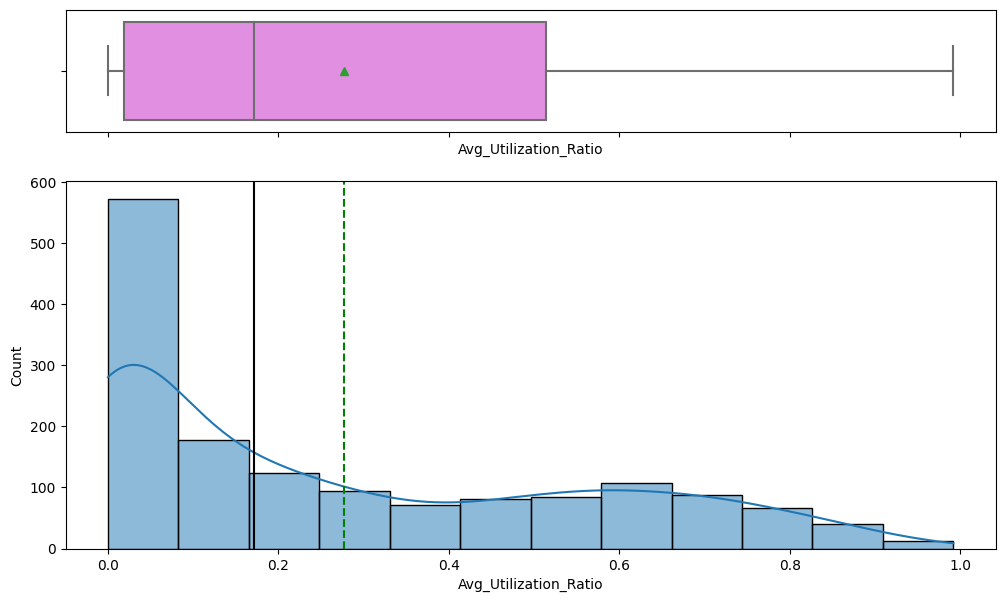

In [ ]:
histogram_boxplot(dataE, 'Avg_Utilization_Ratio', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  0.0
Q2 quantile:  0.15
Q3 quantile:  0.47
IQR:  0.47
Whisker1:  0.0
Whisker2:  0.958
Min:  0.0
Max:  0.958
0 (0.0%) of customers: < 0.0
0 (0.0%) of customers: > 0.958


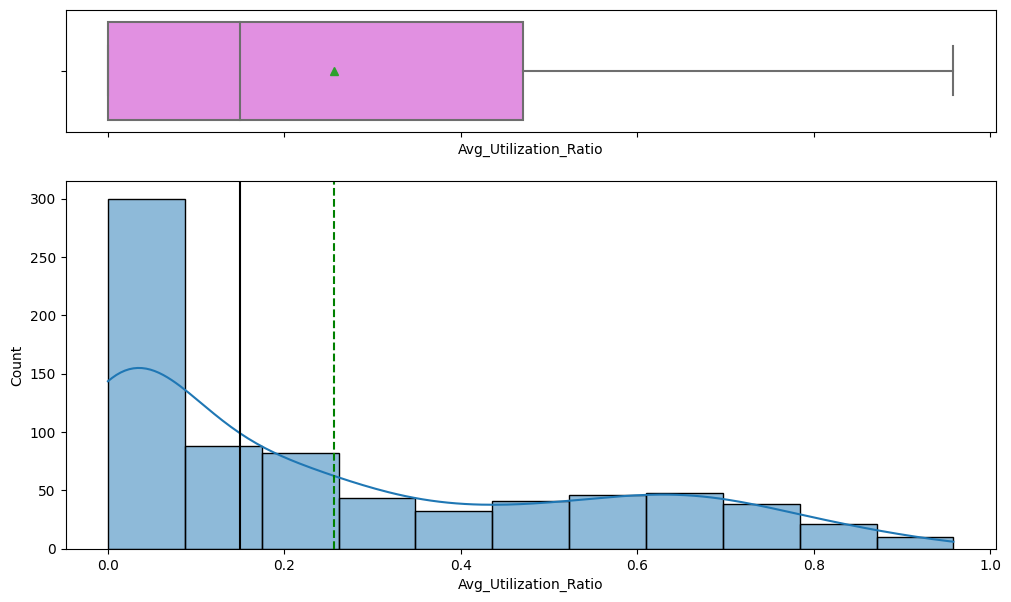

In [ ]:
histogram_boxplot(dataM, 'Avg_Utilization_Ratio', figsize=(12, 7), kde=True, bins=None)

Q1 quantile:  0.0
Q2 quantile:  0.125
Q3 quantile:  0.3515
IQR:  0.3515
Whisker1:  0.0
Whisker2:  0.8787499999999999
Min:  0.0
Max:  0.992
0 (0.0%) of customers: < 0.0
10 (0.9%) of customers: > 0.8787499999999999


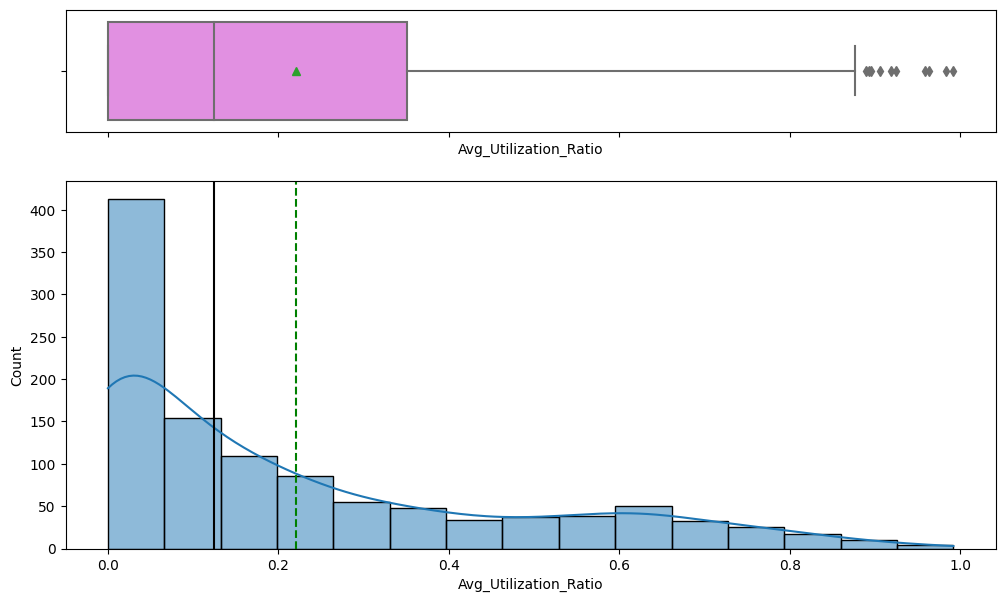

In [ ]:
histogram_boxplot(dataABC, 'Avg_Utilization_Ratio', figsize=(12, 7), kde=True, bins=None)

**CONCLUSION**:

### Bivariate analysis

####Correlation Check

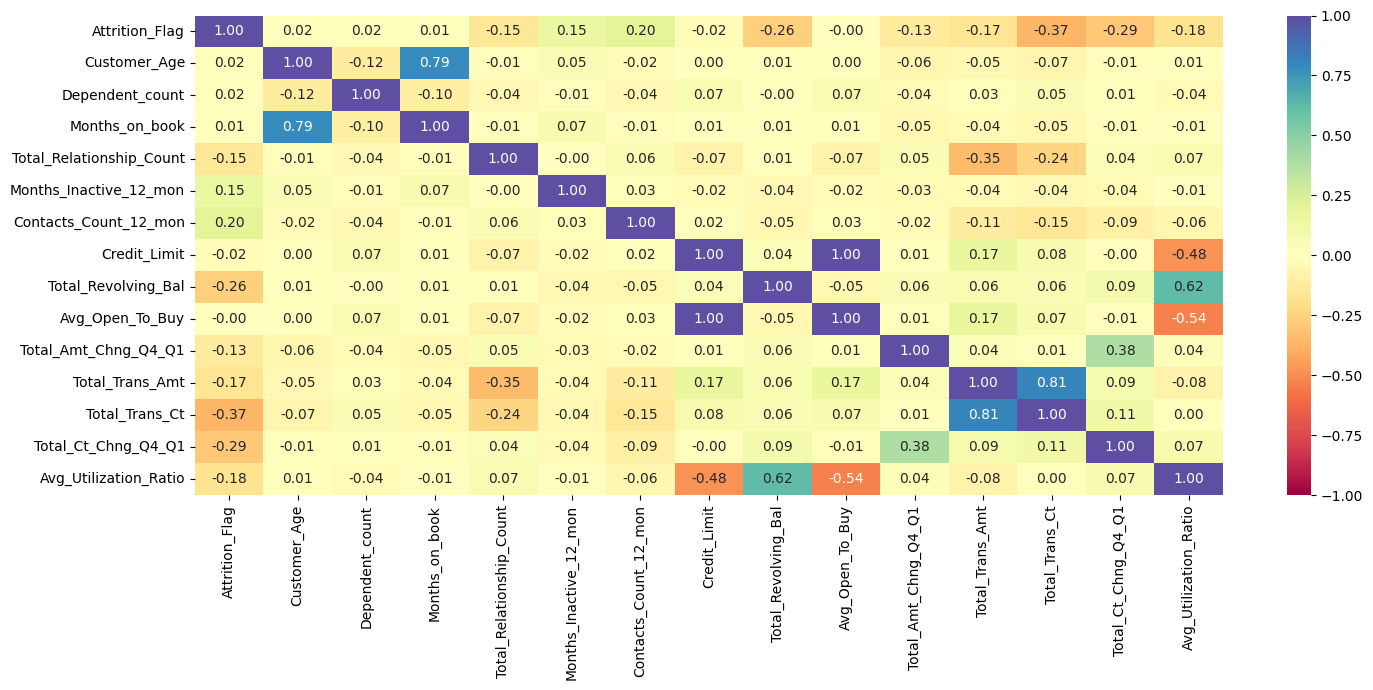

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [ ]:
corr_mat = data.corr()

# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values()

sorted_mat

Avg_Utilization_Ratio  Avg_Open_To_Buy         -0.539
Avg_Open_To_Buy        Avg_Utilization_Ratio   -0.539
Avg_Utilization_Ratio  Credit_Limit            -0.483
Credit_Limit           Avg_Utilization_Ratio   -0.483
Total_Trans_Ct         Attrition_Flag          -0.371
                                                ...  
Months_on_book         Months_on_book           1.000
Dependent_count        Dependent_count          1.000
Customer_Age           Customer_Age             1.000
Total_Ct_Chng_Q4_Q1    Total_Ct_Chng_Q4_Q1      1.000
Avg_Utilization_Ratio  Avg_Utilization_Ratio    1.000
Length: 225, dtype: float64

In [ ]:
sorted_mat[sorted_mat<1]

Avg_Utilization_Ratio  Avg_Open_To_Buy         -0.539
Avg_Open_To_Buy        Avg_Utilization_Ratio   -0.539
Avg_Utilization_Ratio  Credit_Limit            -0.483
Credit_Limit           Avg_Utilization_Ratio   -0.483
Total_Trans_Ct         Attrition_Flag          -0.371
                                                ...  
Customer_Age           Months_on_book           0.789
Total_Trans_Amt        Total_Trans_Ct           0.807
Total_Trans_Ct         Total_Trans_Amt          0.807
Credit_Limit           Avg_Open_To_Buy          0.996
Avg_Open_To_Buy        Credit_Limit             0.996
Length: 210, dtype: float64

####Attrition_Flag vs Categorical Variables

#####Attrition_Flag vs Gender

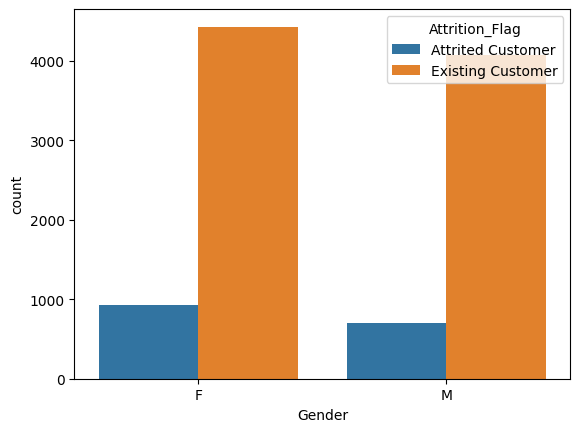

In [ ]:
order=['F', 'M']
hue_order = ['Attrited Customer', 'Existing Customer']
sns.countplot(data=data,x='Gender', hue='Attrition_Flag', order=order, hue_order=hue_order)
plt.xticks(rotation=0)
plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


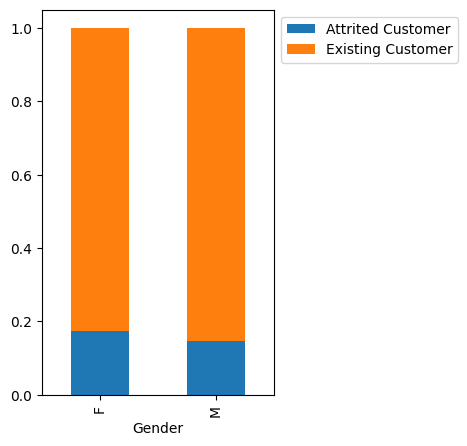

In [ ]:
stacked_barplot(data, "Gender", "Attrition_Flag")

#####Attrition_Flag vs Dependent_count

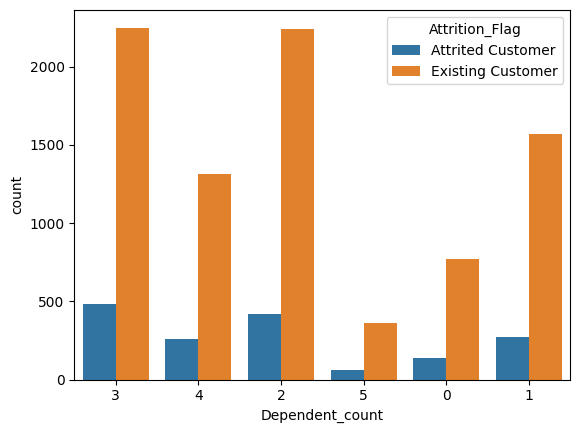

In [ ]:
order=[3, 4, 2, 5,0,1]
hue_order = ['Attrited Customer', 'Existing Customer']
sns.countplot(data=data,x='Dependent_count', hue='Attrition_Flag', order=order, hue_order=hue_order)
plt.xticks(rotation=0)
plt.show()

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


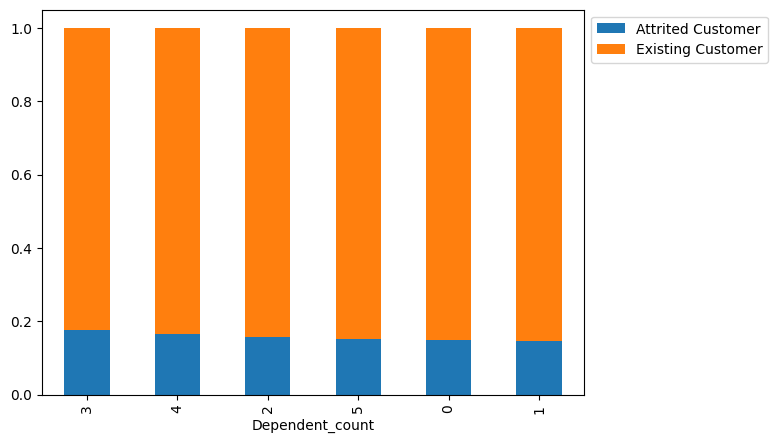

In [ ]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

#####Attrition_Flag vs Education_Level

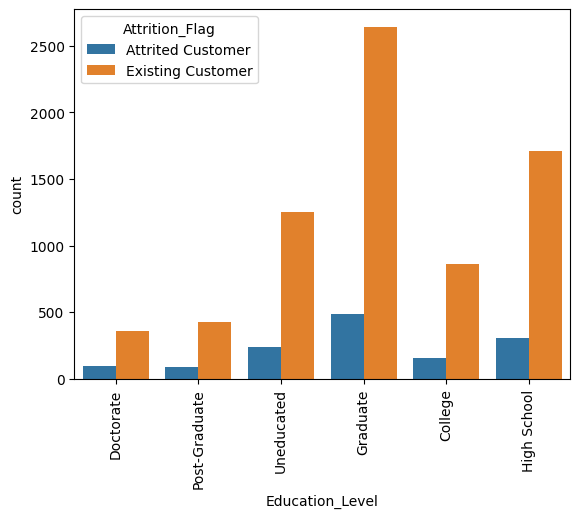

In [ ]:
order=['Doctorate', 'Post-Graduate', 'Uneducated', 'Graduate', 'College', 'High School']
hue_order = ['Attrited Customer', 'Existing Customer']
sns.countplot(data=data,x='Education_Level', hue='Attrition_Flag', order=order, hue_order=hue_order)
plt.xticks(rotation=90)
plt.show()

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


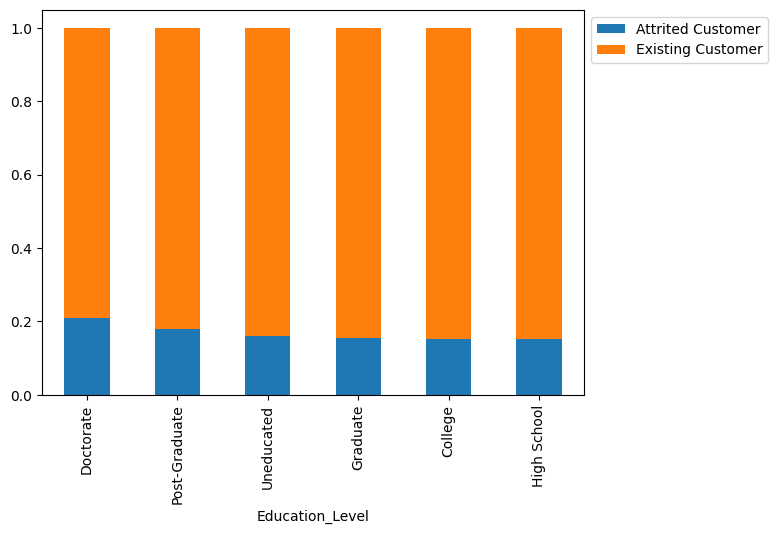

In [ ]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

#####Attrition_Flag vs Marital_Status

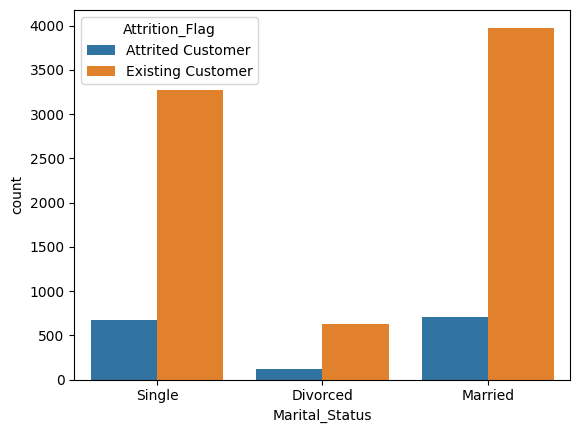

In [ ]:
order=['Single', 'Divorced', 'Married']
hue_order = ['Attrited Customer', 'Existing Customer']
sns.countplot(data=data,x='Marital_Status', hue='Attrition_Flag', order=order, hue_order=hue_order)
plt.xticks(rotation=0)
plt.show()

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


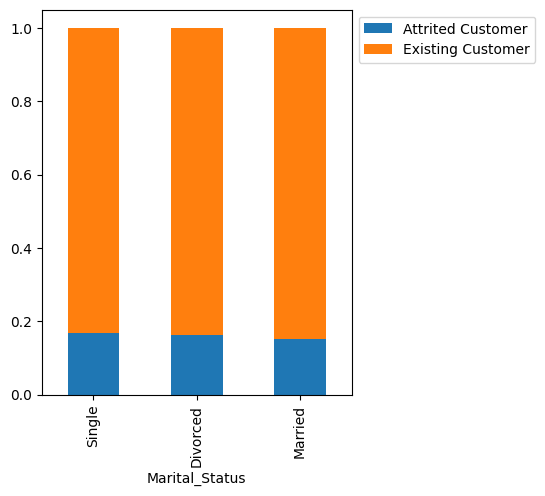

In [ ]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

#####Attrition_Flag vs Income_Category

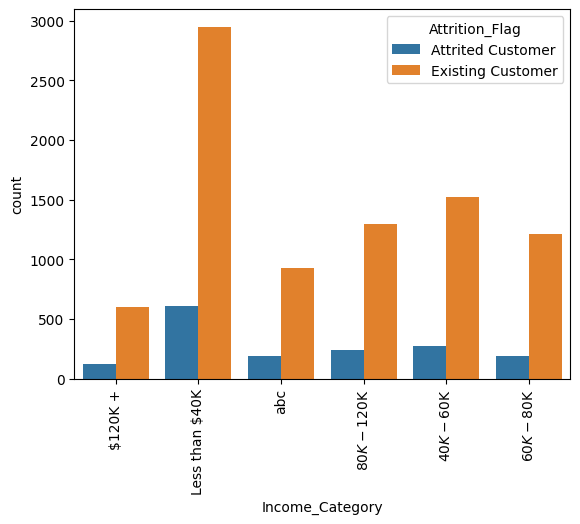

In [ ]:
order=['$120K +', 'Less than $40K', 'abc', '$80K - $120K', '$40K - $60K', '$60K - $80K']
hue_order = ['Attrited Customer', 'Existing Customer']
sns.countplot(data=data,x='Income_Category', hue='Attrition_Flag', order=order, hue_order=hue_order)
plt.xticks(rotation=90)
plt.show()

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


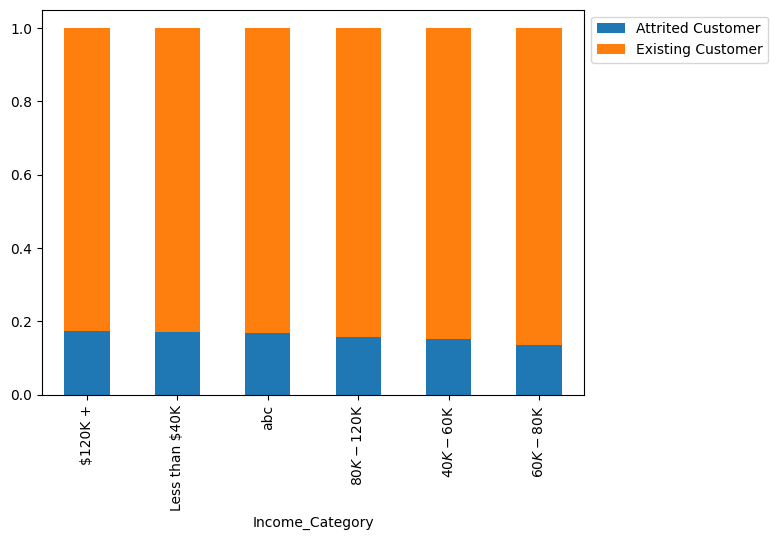

In [ ]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

#####Attrition_Flag vs Card_Category

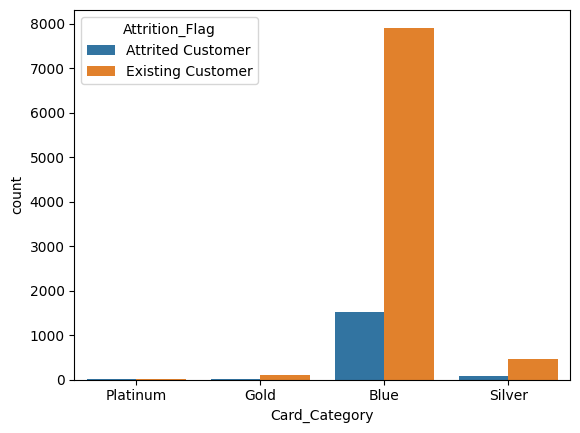

In [ ]:
order=['Platinum', 'Gold', 'Blue', 'Silver']
hue_order = ['Attrited Customer', 'Existing Customer']
sns.countplot(data=data,x='Card_Category', hue='Attrition_Flag', order=order, hue_order=hue_order)
plt.xticks(rotation=0)
plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


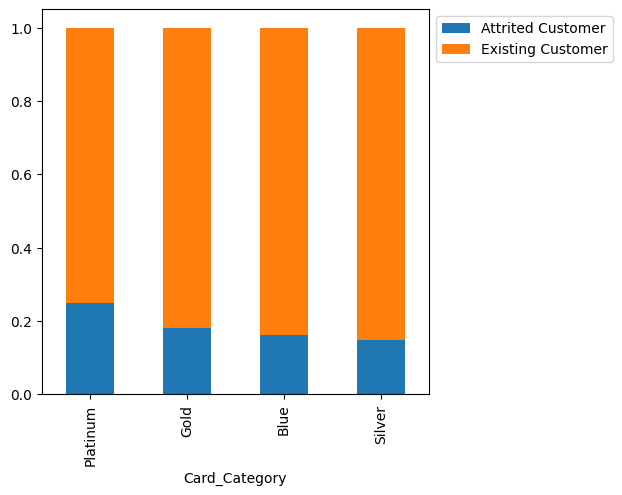

In [ ]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

#####Attrition_Flag vs Total_Relationship_Count

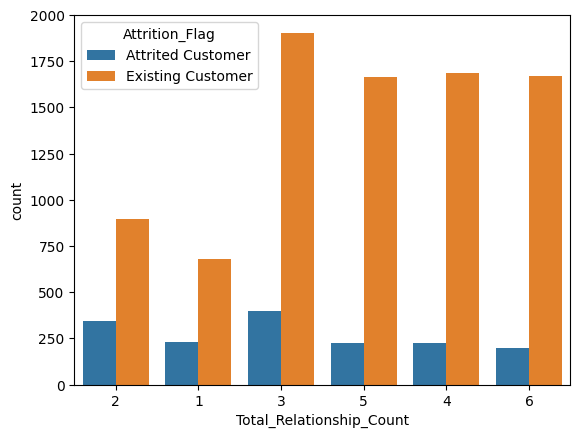

In [ ]:
order=[2,1,3, 5,4,6]
hue_order = ['Attrited Customer', 'Existing Customer']
sns.countplot(data=data,x='Total_Relationship_Count', hue='Attrition_Flag', order=order, hue_order=hue_order)
plt.xticks(rotation=0)
plt.show()

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


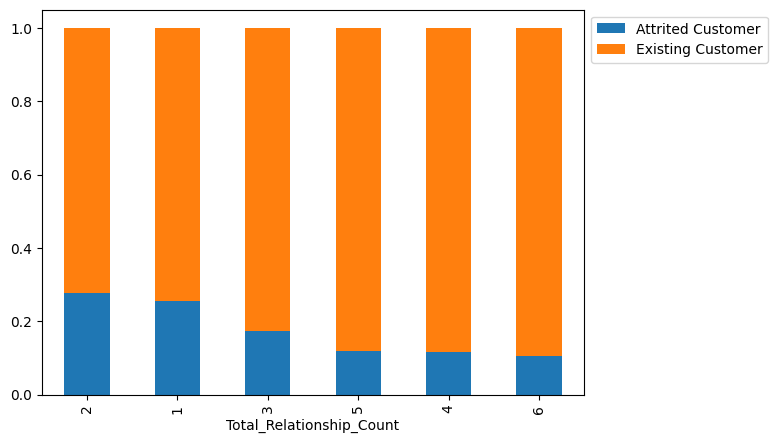

In [ ]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

#####Attrition_Flag vs Months_Inactive_12_mon

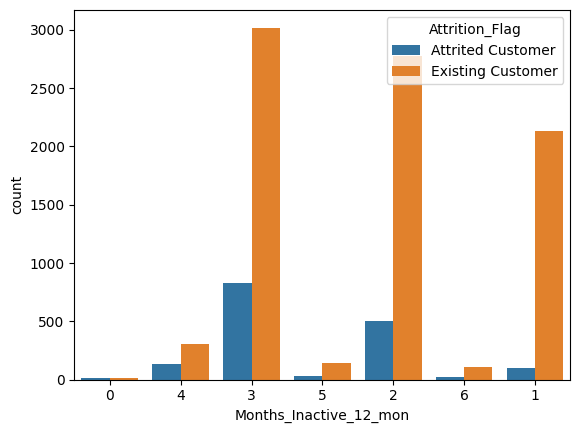

In [ ]:
order=[0,4,3,5,2,6,1]
hue_order = ['Attrited Customer', 'Existing Customer']
sns.countplot(data=data,x='Months_Inactive_12_mon', hue='Attrition_Flag', order=order, hue_order=hue_order)
plt.xticks(rotation=0)
plt.show()

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


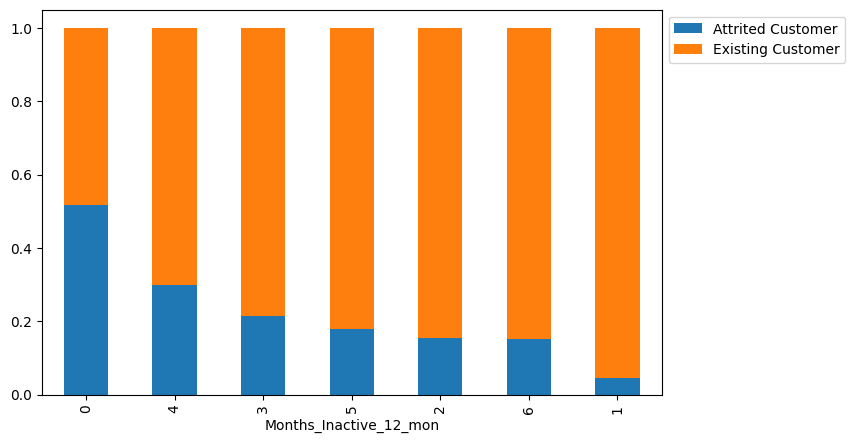

In [ ]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

#####Attrition_Flag vs Contacts_Count_12_mon

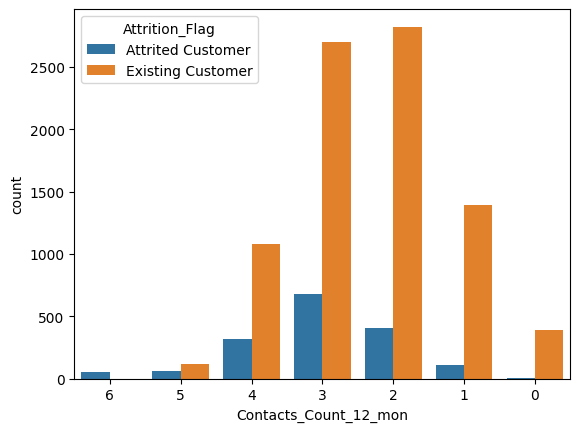

In [ ]:
order=[6,5,4,3,2,1,0]
hue_order = ['Attrited Customer', 'Existing Customer']
sns.countplot(data=data,x='Contacts_Count_12_mon', hue='Attrition_Flag', order=order, hue_order=hue_order)
plt.xticks(rotation=0)
plt.show()

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


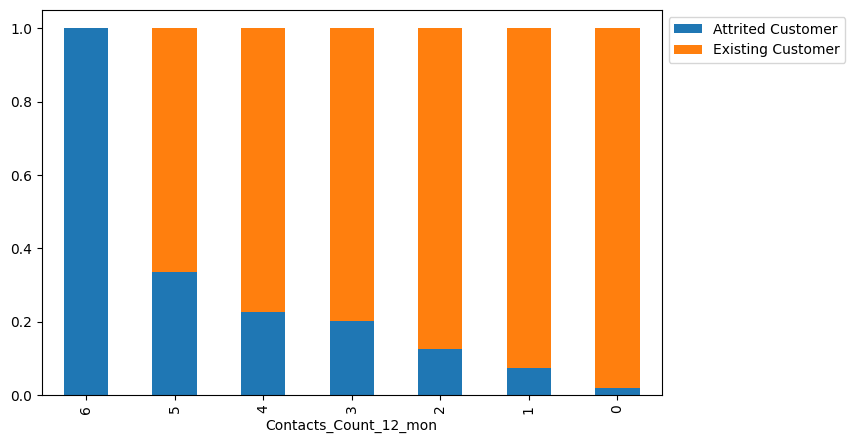

In [ ]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

####Attrition_Flag vs Numerical Variables

#####Attrition_Flag vs Customer_Age

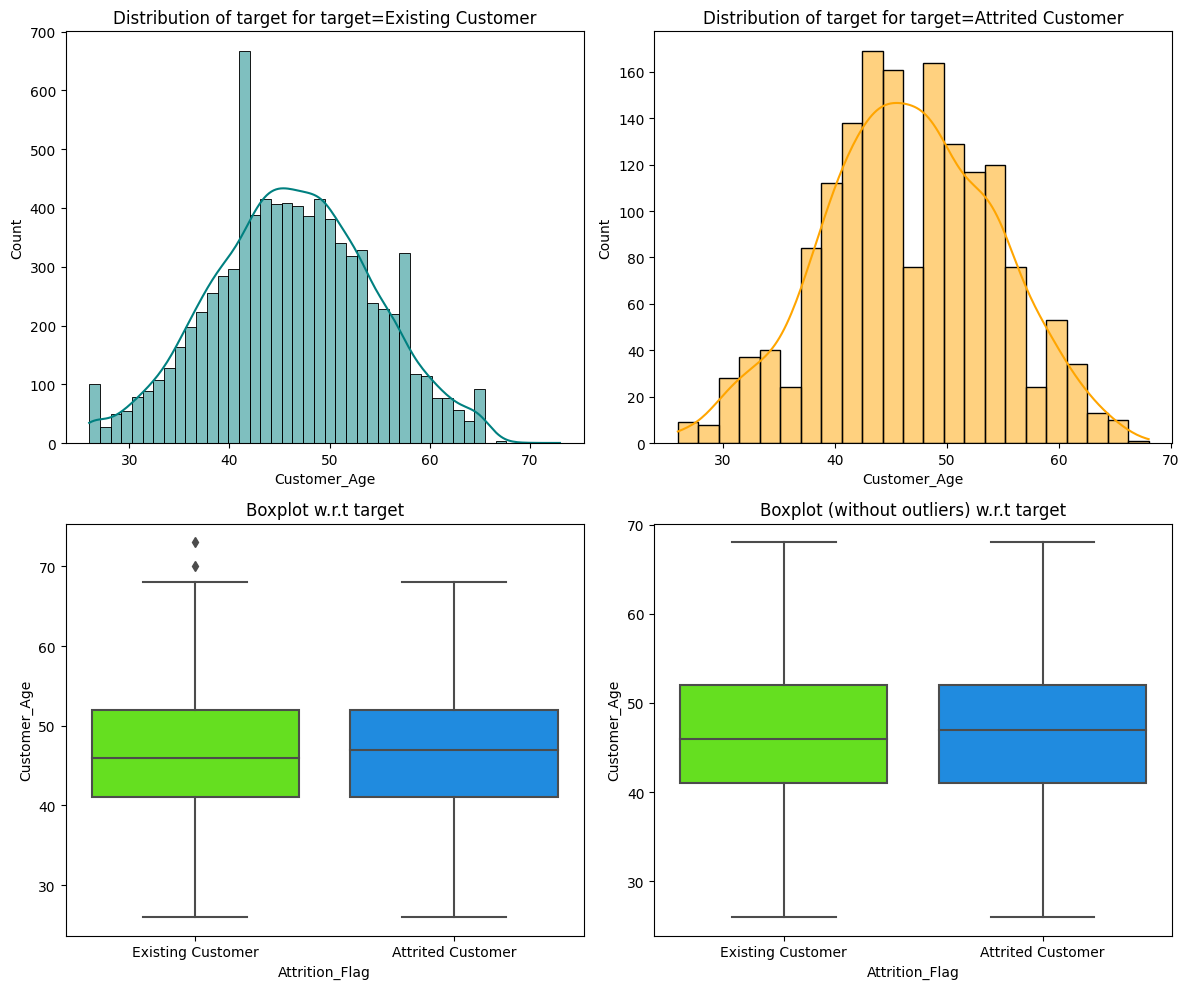

In [ ]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

#####Attrition_Flag vs Months_on_book

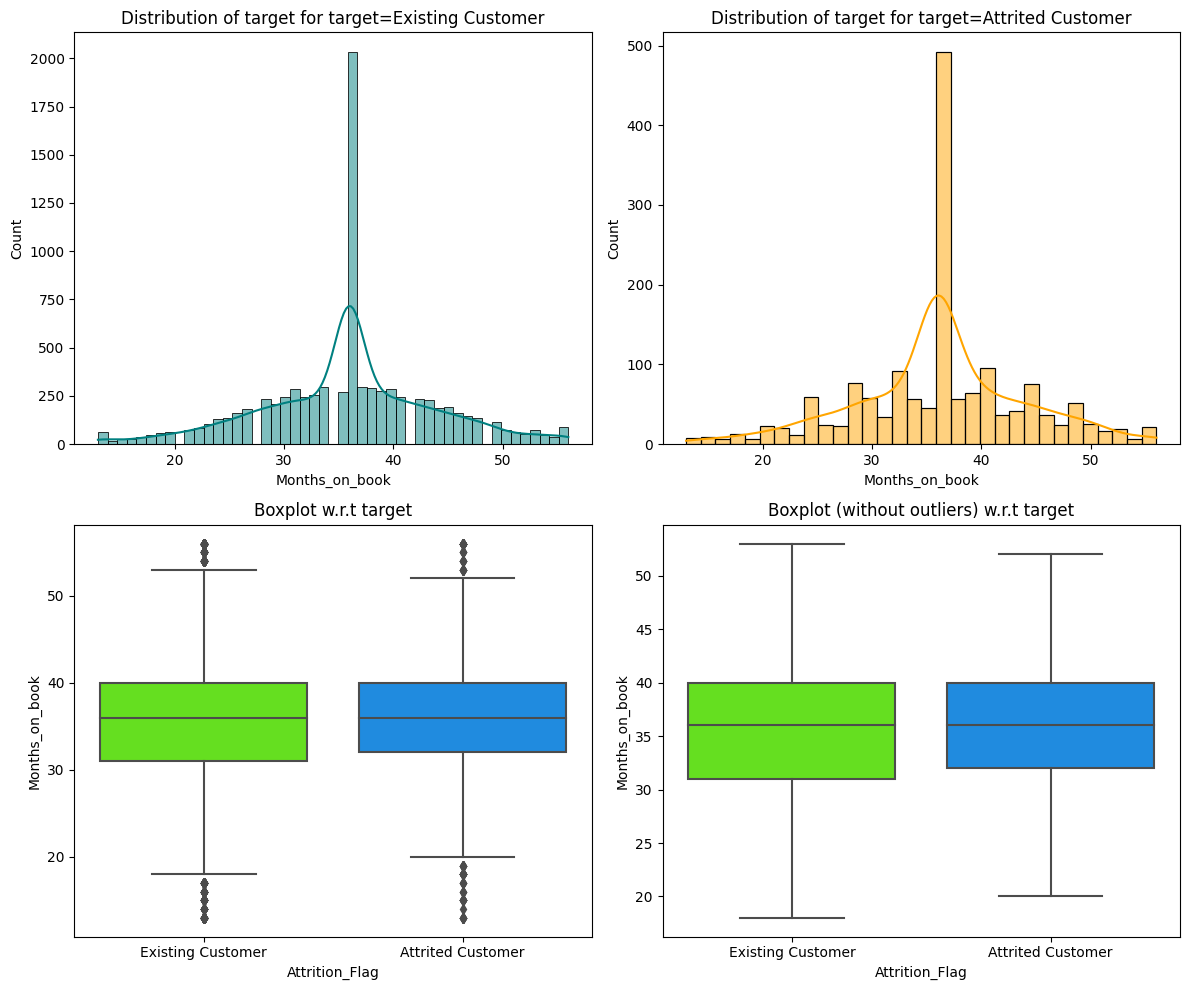

In [ ]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

#####Attrition_Flag vs Credit_Limit

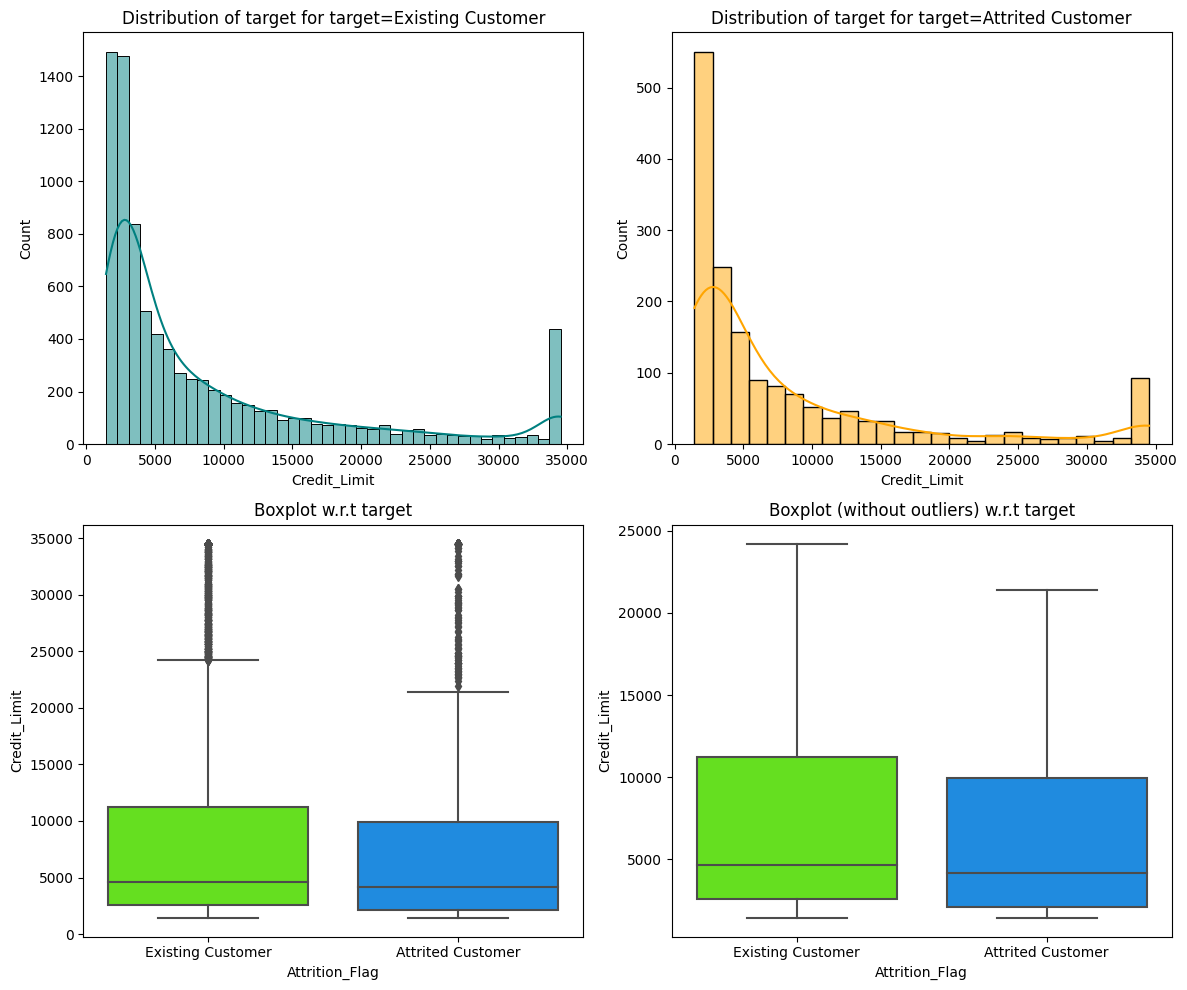

In [ ]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

#####Attrition_Flag vs Total_Revolving_Bal

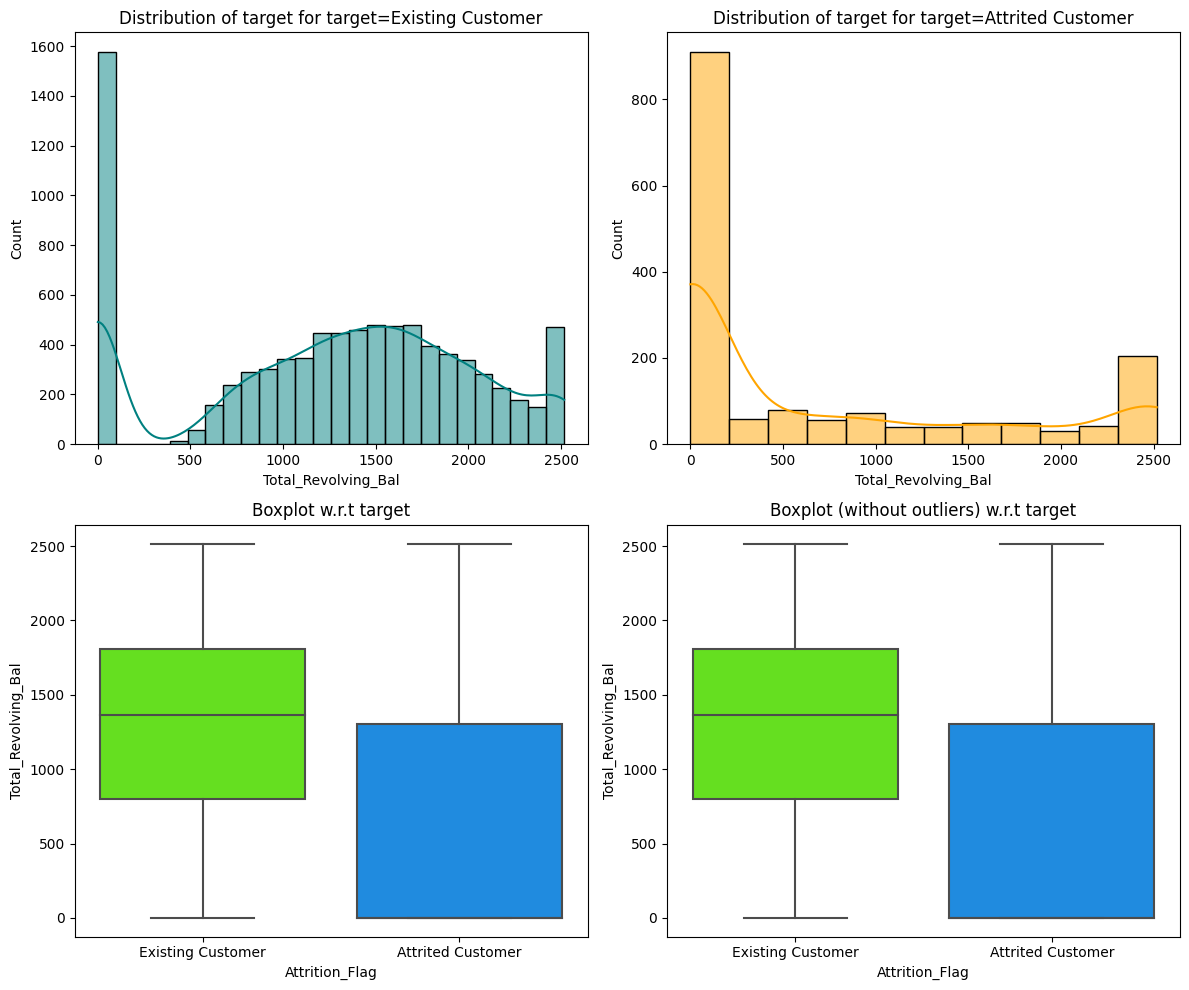

In [ ]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

#####Attrition_Flag vs Avg_Open_To_Buy

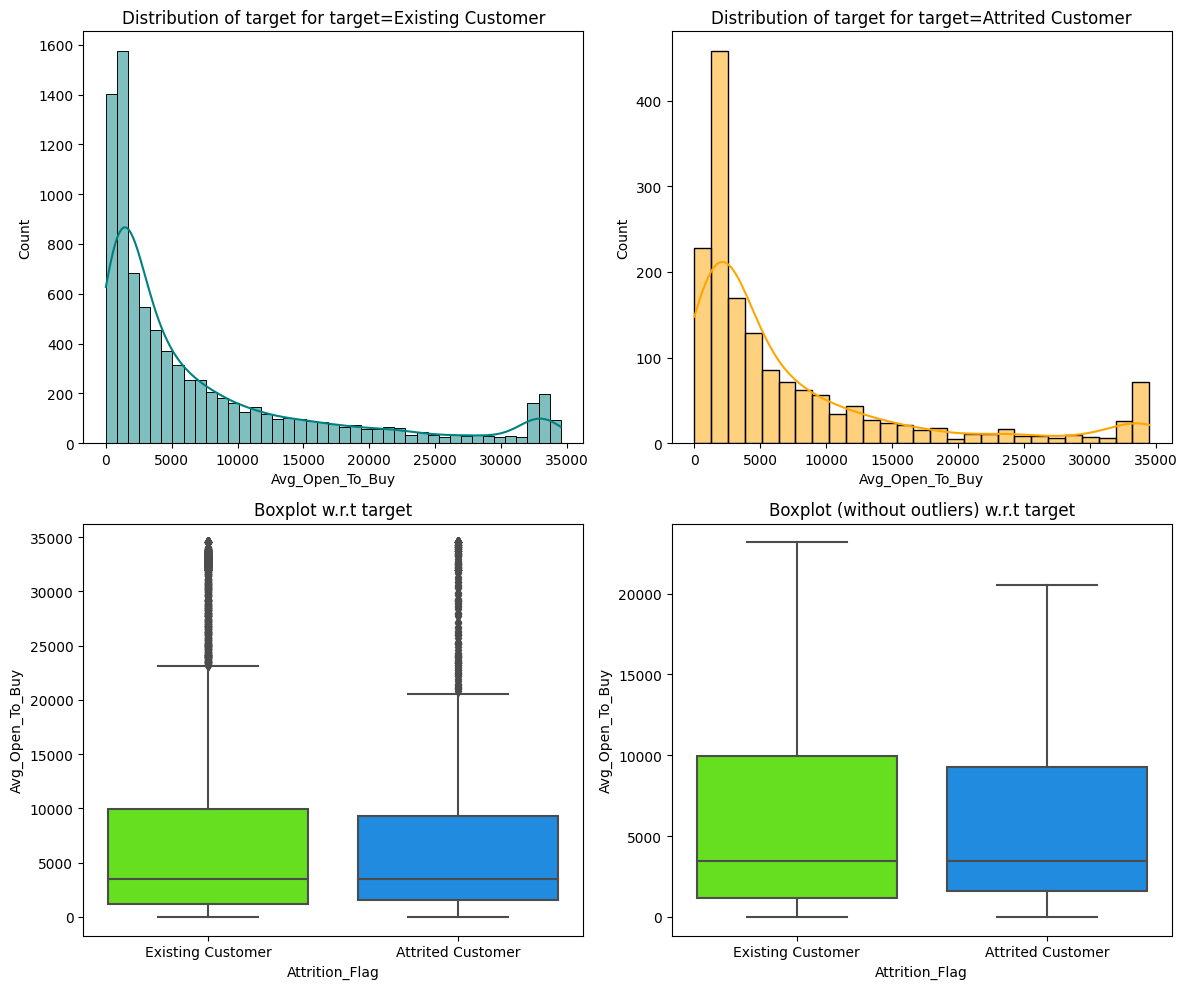

In [ ]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

#####Attrition_Flag vs Total_Amt_Chng_Q4_Q1

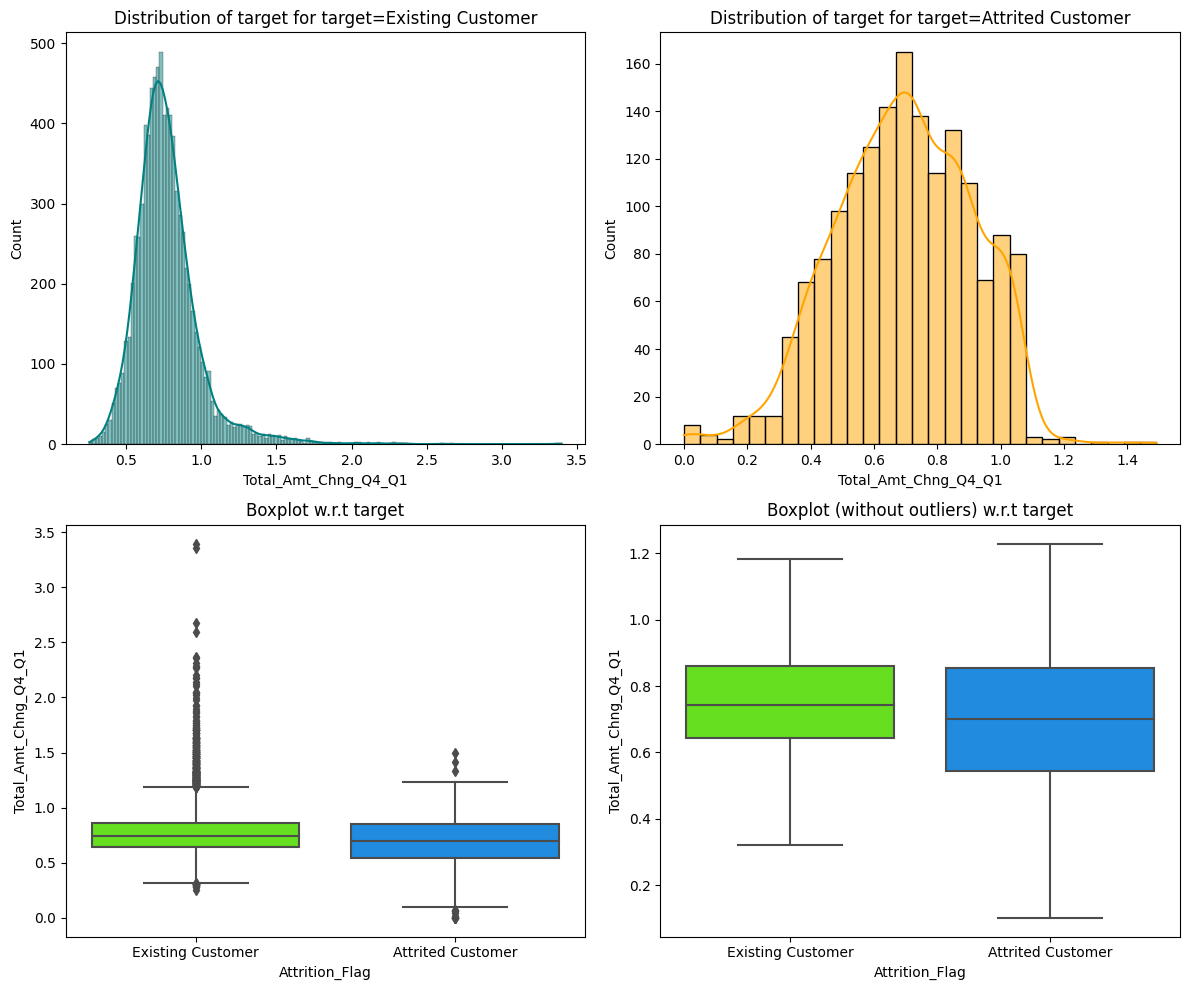

In [ ]:
distribution_plot_wrt_target(data, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

#####Attrition_Flag vs Total_Trans_Amt

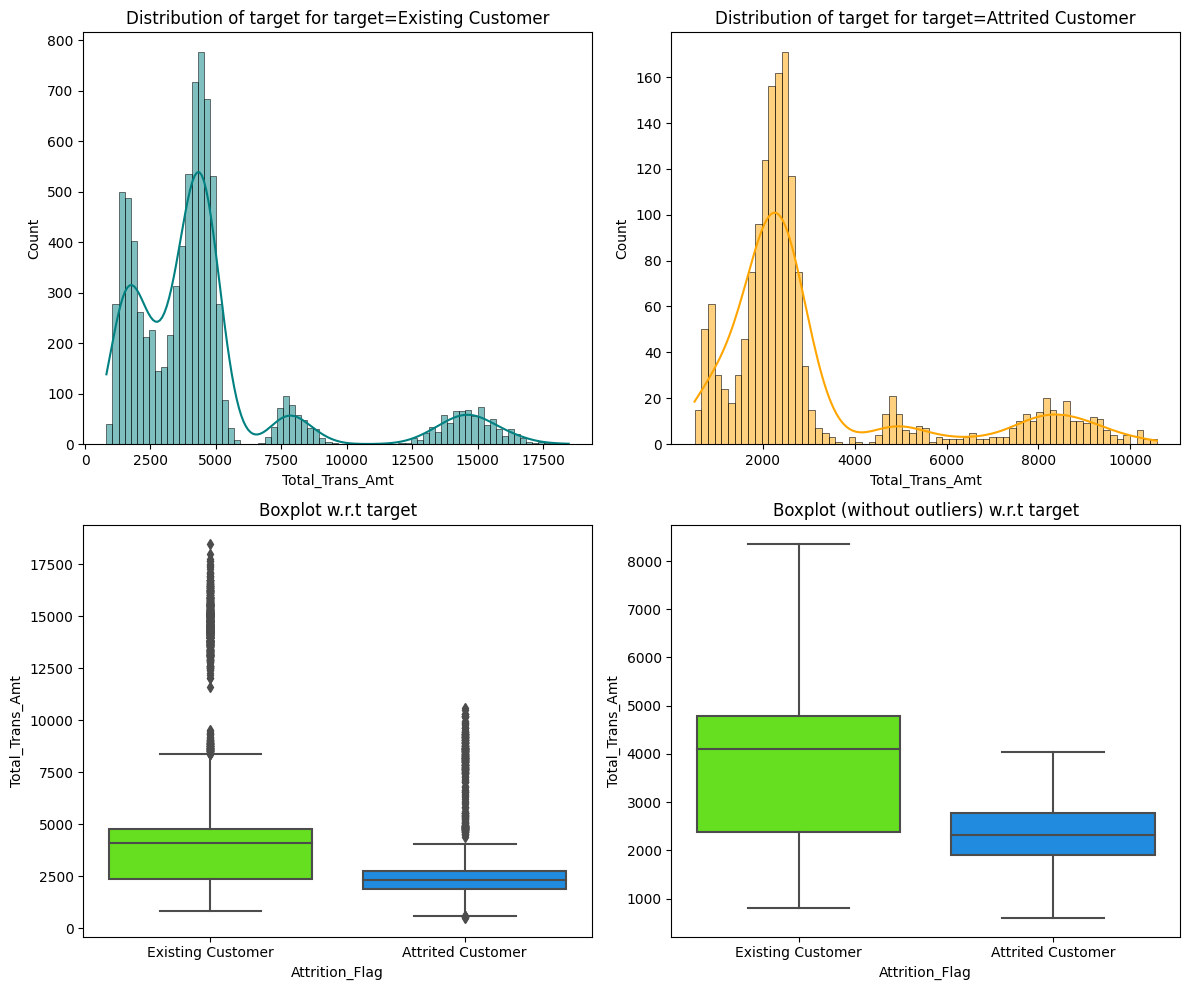

In [ ]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

#####Attrition_Flag vs Total_Trans_Ct

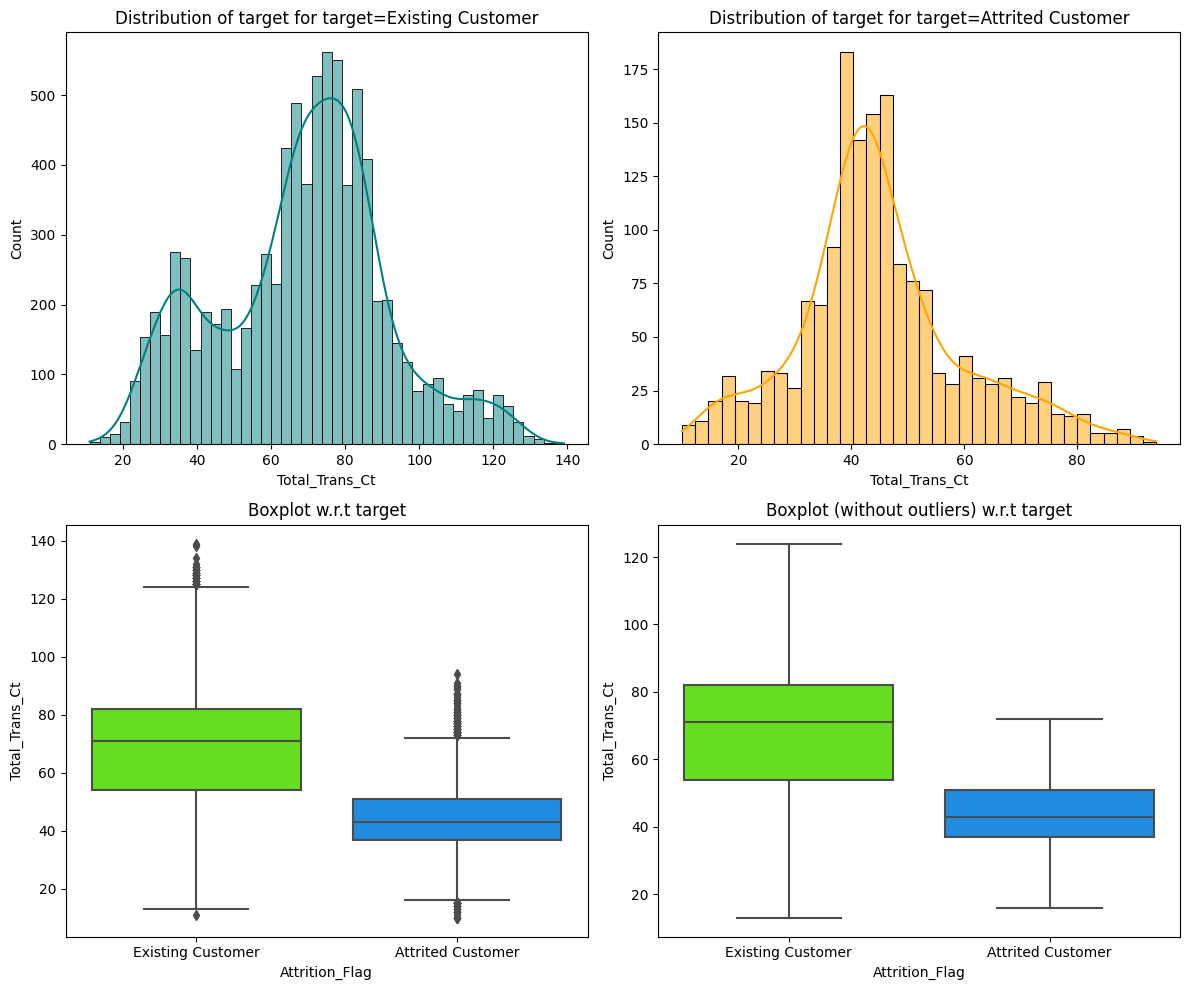

In [ ]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

#####Attrition_Flag vs Total_Ct_Chng_Q4_Q1

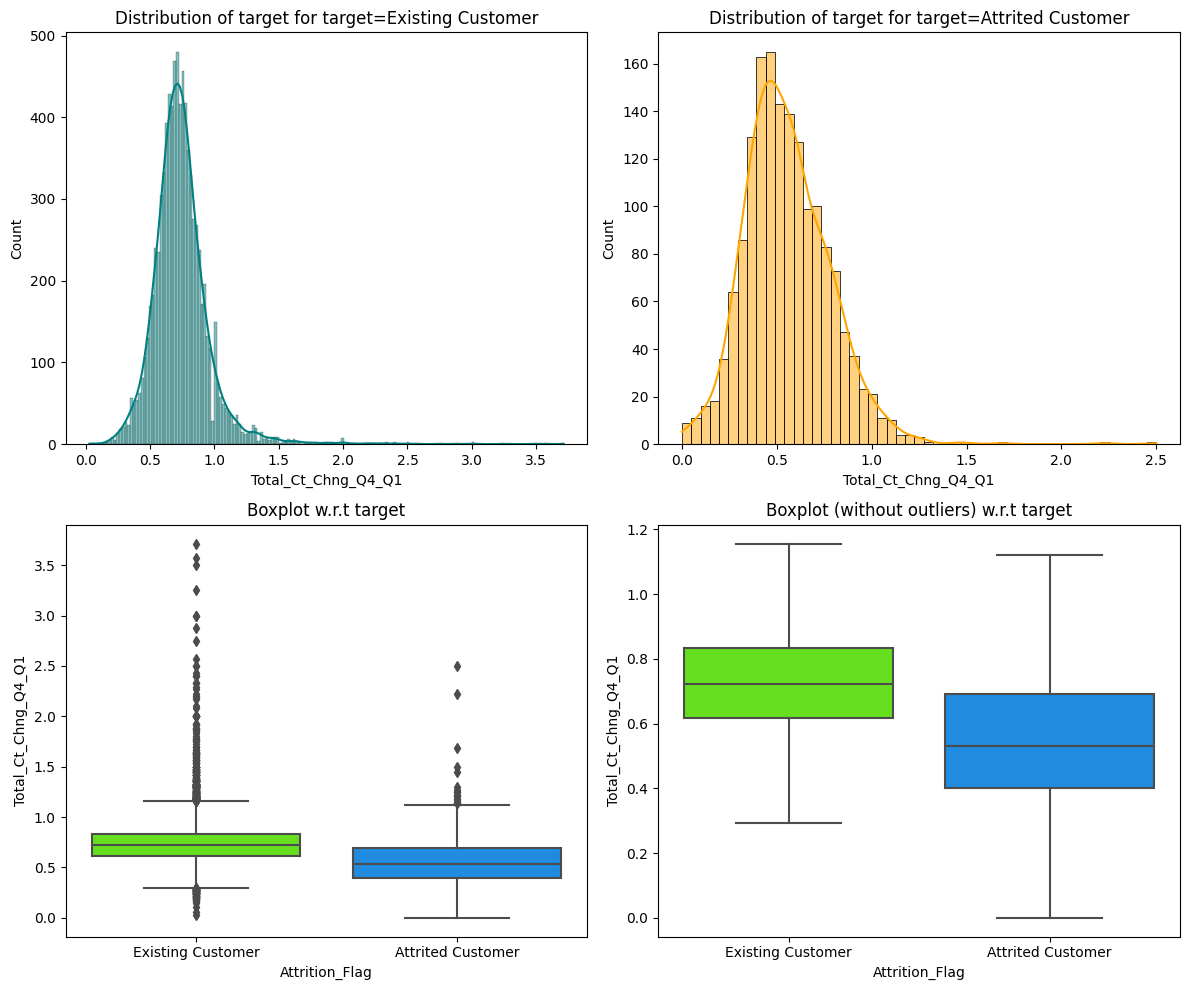

In [ ]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

#####Attrition_Flag vs Avg_Utilization_Ratio

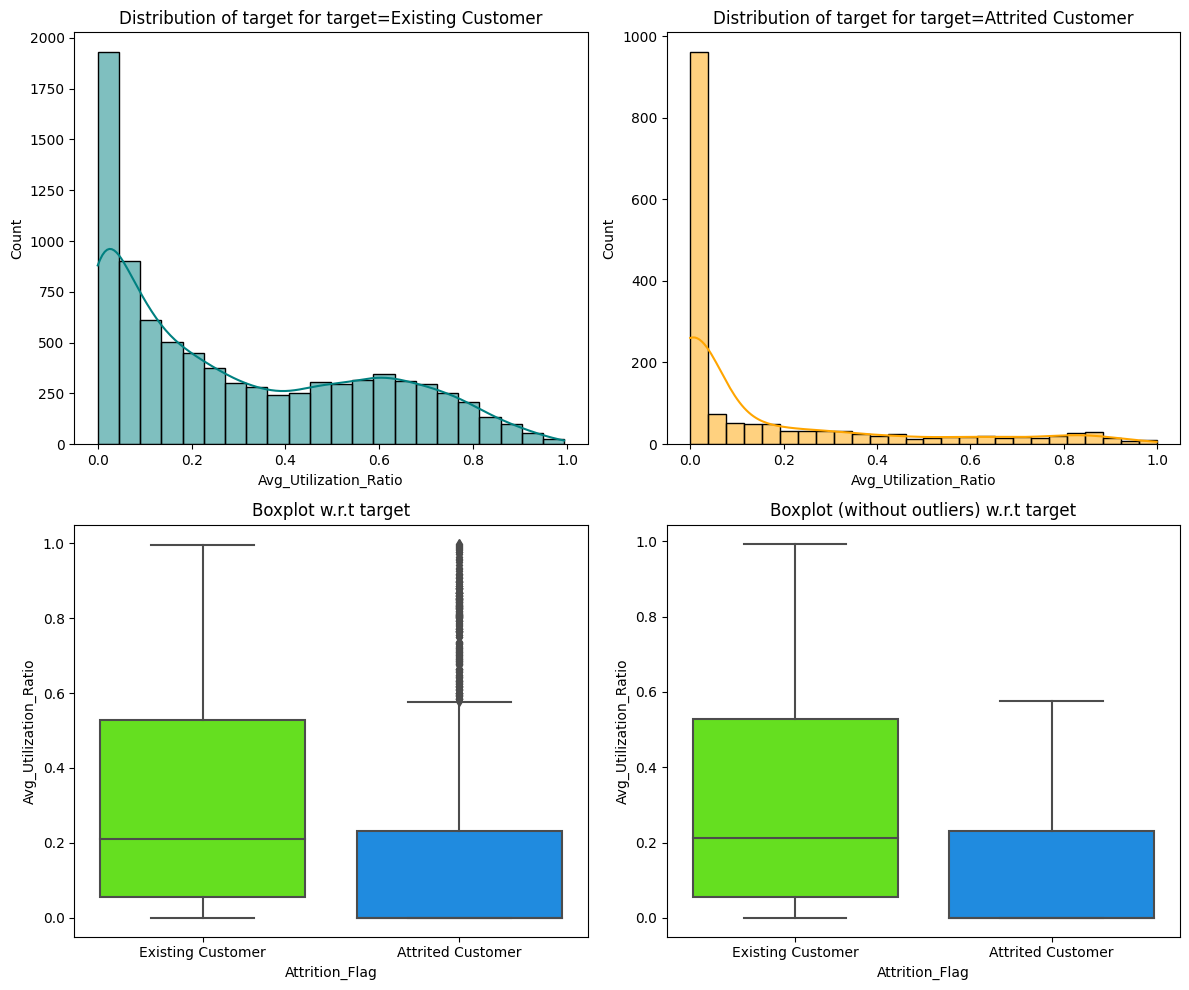

In [ ]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

## Data Pre-processing

In [ ]:
# let's create a copy of the data to avoid any changes to original data
data1 = df.copy()

### Drop unnecessary column

In [ ]:
data.shape

(10127, 21)

In [ ]:
# Since the CLIENTNUM column consists of clients' IDs,
# it will not add any value to the modeling
data1.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
data1.shape

(10127, 20)

In [ ]:
data1.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3            NaN  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0     12691.000                  777        11914.000                 1.335   
1      8256.000                  864         7392.000                 1.541   
2      3418.000                    0         3418.000                 2.594   
3      3313.000                 2517          796.000                 1.405   
4      4716.000                    0         4716.000                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

### Convert the target variable Attrition_Flag to 0 and 1

In [ ]:
data1["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data1["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

In [ ]:
data1.describe()

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
count       10127.000     10127.000        10127.000       10127.000   
mean            0.161        46.326            2.346          35.928   
std             0.367         8.017            1.299           7.986   
min             0.000        26.000            0.000          13.000   
25%             0.000        41.000            1.000          31.000   
50%             0.000        46.000            2.000          36.000   
75%             0.000        52.000            3.000          40.000   
max             1.000        73.000            5.000          56.000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count                 10127.000               10127.000   
mean                      3.813                   2.341   
std                       1.554                   1.011   
min                       1.000                   0.000   
25%                       3.000                   2.000   
50%                       4.000                   2.000   
75%                       5.000                   3.000   
max                       6.000                   6.000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count              10127.000     10127.000            10127.000   
mean                   2.455      8631.954             1162.814   
std                    1.106      9088.777              814.987   
min                    0.000      1438.300                0.000   
25%                    2.000      2555.000              359.000   
50%                    2.000      4549.000             1276.000   
75%                    3.000     11067.500             1784.000   
max                    6.000     34516.000             2517.000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count        10127.000             10127.000        10127.000       10127.000   
mean          7469.140                 0.760         4404.086          64.859   
std           9090.685                 0.219         3397.129          23.473   
min              3.000                 0.000          510.000          10.000   
25%           1324.500                 0.631         2155.500          45.000   
50%           3474.000                 0.736         3899.000          67.000   
75%           9859.000                 0.859         4741.000          81.000   
max          34516.000                 3.397        18484.000         139.000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count            10127.000              10127.000  
mean                 0.712                  0.275  
std                  0.238                  0.276  
min                  0.000                  0.000  
25%                  0.582                  0.023  
50%                  0.702                  0.176  
75%                  0.818                  0.503  
max                  3.714                  0.999

### Replacing 'abc' in the Income_Category variable by NaN

In [ ]:
data1["Income_Category"].replace("abc", np.nan, inplace=True)

In [ ]:
data1.head(20)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0                0            45      M                3     High School   
1                0            49      F                5        Graduate   
2                0            51      M                3        Graduate   
3                0            40      F                4     High School   
4                0            40      M                3      Uneducated   
5                0            44      M                2        Graduate   
6                0            51      M                4             NaN   
7                0            32      M                0     High School   
8                0            37      M                3      Uneducated   
9                0            48      M                2        Graduate   
10               0            42      M                5      Uneducated   
11               0            65      M                1             NaN   
12               0            56      M                1         College   
13               0            35      M                3        Graduate   
14               0            57      F                2        Graduate   
15               0            44      M                4             NaN   
16               0            48      M                4   Post-Graduate   
17               0            41      M                3             NaN   
18               0            61      M                1     High School   
19               0            45      F                2        Graduate   

   Marital_Status Income_Category Card_Category  Months_on_book  \
0         Married     $60K - $80K          Blue              39   
1          Single  Less than $40K          Blue              44   
2         Married    $80K - $120K          Blue              36   
3             NaN  Less than $40K          Blue              34   
4         Married     $60K - $80K          Blue              21   
5         Married     $40K - $60K          Blue              36   
6         Married         $120K +          Gold              46   
7             NaN     $60K - $80K        Silver              27   
8          Single     $60K - $80K          Blue              36   
9          Single    $80K - $120K          Blue              36   
10            NaN         $120K +          Blue              31   
11        Married     $40K - $60K          Blue              54   
12         Single    $80K - $120K          Blue              36   
13            NaN     $60K - $80K          Blue              30   
14        Married  Less than $40K          Blue              48   
15            NaN    $80K - $120K          Blue              37   
16         Single    $80K - $120K          Blue              36   
17        Married    $80K - $120K          Blue              34   
18        Married     $40K - $60K          Blue              56   
19        Married             NaN          Blue              37   

    Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                          5                       1                      3   
1                          6                       1                      2   
2                          4                       1                      0   
3                          3                       4                      1   
4                          5                       1                      0   
5                          3                       1                      2   
6                          6                       1                      3   
7                          2                       2                      2   
8                          5                       2                      0   
9                          6                       3                      3   
10                         5                       3                      2   
11                         6                       

### Missing value imputation




In [ ]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [ ]:
# Fit and transform the data
data1[reqd_col_for_impute] = imputer.fit_transform(data1[reqd_col_for_impute])

In [ ]:
#checking for missing values in X_train
data1.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

##Data Preparation for Modeling

###Define independent and dependent variables

In [ ]:
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [ ]:
X.shape

(10127, 19)

###Creating dummy variables

In [ ]:
# creating dummy varibles on Gender, Education_Level, Marital_Status, Income_Category, Card_Category
X = pd.get_dummies(X,
                   columns=["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"],
                   drop_first=True)
X.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3     12691.000   
1                       1                      2      8256.000   
2                       1                      0      3418.000   
3                       4                      1      3313.000   
4                       1                      0      4716.000   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777        11914.000                 1.335   
1                  864         7392.000                 1.541   
2                    0         3418.000                 2.594   
3                 2517          796.000                 1.405   
4                    0         4716.000                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Gender_M  Education_Level_Doctorate  \
0                  0.061         1                          0   
1                  0.105         0                          0   
2                  0.000         1                          0   
3                  0.760         0                          0   
4                  0.000         1                          0   

   Education_Level_Graduate  Education_Level_High School  \
0                         0                            1   
1                         1                            0   
2                         1                            0   
3                         0                            1   
4                         0                            0   

   Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           1   

   Marital_Status_Married  Marital_Status_Single  Income_Category_$40K - $60K  \
0                       1                      0                            0   
1                       0                      1                            0   
2                       1                      0                            0   
3                       1                      0                            0   
4                       1                      0                            0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            1                             0   
1                            0                             0   
2                            0                             1   
3                            0                             0   
4                            1                             0   

   Income_Category_Less than $40K  Card_Category_Gold  Card_Category_Platinum  \
0                               0                   0                       0   
1                               1                   0                       0   
2                               0                   0                       0   
3                               1                   0     

In [ ]:
X.shape

(10127, 29)

###Split the data into train, validation, and test sets

In [ ]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=5, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

###**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

Sample code for model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    score = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, score))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9805327868852459
Random forest: 1.0
Gradient Boosting: 0.8862704918032787
Adaboost: 0.8657786885245902
dtree: 1.0
XGBoost: 1.0

Validation Performance:

Bagging: 0.8374233128834356
Random forest: 0.7791411042944786
Gradient Boosting: 0.8619631901840491
Adaboost: 0.8466257668711656
dtree: 0.8067484662576687
XGBoost: 0.8957055214723927


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9805, Validation Score: 0.8374, Difference: 0.1431
Random forest: Training Score: 1.0000, Validation Score: 0.7791, Difference: 0.2209
Gradient Boosting: Training Score: 0.8863, Validation Score: 0.8620, Difference: 0.0243
Adaboost: Training Score: 0.8658, Validation Score: 0.8466, Difference: 0.0192
dtree: Training Score: 1.0000, Validation Score: 0.8067, Difference: 0.1933
XGBoost: Training Score: 1.0000, Validation Score: 0.8957, Difference: 0.1043


- XGBoost has the best performance followed by Gradient Boosting, AdaBoost, and Bagging models as per the validation performance

### Model Building with Oversampled data


In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9978427142576975
Random forest: 1.0
Gradient Boosting: 0.9807805452049422
Adaboost: 0.9664640125514807
dtree: 1.0
XGBoost: 1.0

Validation Performance:

Bagging: 0.8466257668711656
Random forest: 0.852760736196319
Gradient Boosting: 0.9325153374233128
Adaboost: 0.911042944785276
dtree: 0.8098159509202454
XGBoost: 0.911042944785276


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9978, Validation Score: 0.8466, Difference: 0.1512
Random forest: Training Score: 1.0000, Validation Score: 0.8528, Difference: 0.1472
Gradient Boosting: Training Score: 0.9808, Validation Score: 0.9325, Difference: 0.0483
Adaboost: Training Score: 0.9665, Validation Score: 0.9110, Difference: 0.0554
dtree: Training Score: 1.0000, Validation Score: 0.8098, Difference: 0.1902
XGBoost: Training Score: 1.0000, Validation Score: 0.9110, Difference: 0.0890


- Gradient Boosting has the best performance followed by AdaBoost and XGBoost models as per the validation performance

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9959016393442623
Random forest: 1.0
Gradient Boosting: 0.9866803278688525
Adaboost: 0.9600409836065574
dtree: 1.0
XGBoost: 1.0

Validation Performance:

Bagging: 0.9294478527607362
Random forest: 0.9539877300613497
Gradient Boosting: 0.9570552147239264
Adaboost: 0.9601226993865031
dtree: 0.8987730061349694
XGBoost: 0.9693251533742331


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9959, Validation Score: 0.9294, Difference: 0.0665
Random forest: Training Score: 1.0000, Validation Score: 0.9540, Difference: 0.0460
Gradient Boosting: Training Score: 0.9867, Validation Score: 0.9571, Difference: 0.0296
Adaboost: Training Score: 0.9600, Validation Score: 0.9601, Difference: -0.0001
dtree: Training Score: 1.0000, Validation Score: 0.8988, Difference: 0.1012
XGBoost: Training Score: 1.0000, Validation Score: 0.9693, Difference: 0.0307


- XGBoost has the best performance followed by Adaboost, Gradient Boosting, Random forest, and Bagging models as per the validation performance

**CONCLUSION:**

- After building 18 models, it was observed that the XGBoost and Adaboost models trained on an undersampled dataset, as well as the
Gradient Boosting model trained on an oversampled dataset, exhibited strong performance on both the training and validation datasets.
- Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance
- We will tune these 3 models using the same data (undersampled or oversampled) as we trained them on before

### HyperparameterTuning

####AdaBoost

##### Tuning AdaBoostClassifier model using original data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 30, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8657823129251702:
CPU times: user 3.14 s, sys: 451 ms, total: 3.59 s
Wall time: 3min 9s


In [ ]:
tuned_adb_orig = AdaBoostClassifier(
    n_estimators=30,
    learning_rate=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb_orig.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=30)

In [ ]:
# Checking model's performance on training set
adb_orig_train = model_performance_classification_sklearn(tuned_adb_orig, X_train, y_train)
adb_orig_train

Accuracy  Recall  Precision    F1
0     0.976   0.911      0.939 0.925

In [ ]:
# Checking model's performance on validation set
adb_orig_val = model_performance_classification_sklearn(tuned_adb_orig, X_val, y_val)
adb_orig_val

Accuracy  Recall  Precision    F1
0     0.968   0.887      0.912 0.899

##### Tuning AdaBoostClassifier model using Undersampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 60, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9559549973835688:
CPU times: user 2.08 s, sys: 210 ms, total: 2.29 s
Wall time: 1min 36s


In [ ]:
tuned_adb_un = AdaBoostClassifier(
    n_estimators=60,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=60)

In [ ]:
# Checking model's performance on training set
adb_train_un = model_performance_classification_sklearn(tuned_adb_un, X_train_un, y_train_un)
adb_train_un

Accuracy  Recall  Precision    F1
0     0.998   0.999      0.997 0.998

In [ ]:
# Checking model's performance on validation set
adb_val_un = model_performance_classification_sklearn(tuned_adb_un, X_val, y_val)
adb_val_un

Accuracy  Recall  Precision    F1
0     0.934   0.957      0.724 0.824

##### Tuning AdaBoostClassifier model using Oversampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9529390598241259:
CPU times: user 7.15 s, sys: 654 ms, total: 7.81 s
Wall time: 5min 27s


In [ ]:
tuned_adb_over = AdaBoostClassifier(
    n_estimators=90,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90)

In [ ]:
# Checking model's performance on training set
adb_train_over = model_performance_classification_sklearn(tuned_adb_over, X_train_over, y_train_over)
adb_train_over

Accuracy  Recall  Precision    F1
0     0.984   0.986      0.982 0.984

In [ ]:
# Checking model's performance on validation set
adb_val_over = model_performance_classification_sklearn(tuned_adb_over, X_val, y_val)
adb_val_over

Accuracy  Recall  Precision    F1
0     0.967   0.929      0.873 0.900

####Gradient Boost



#####Tuning GradientBoostingClassifier model using original data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8606436420722134:
CPU times: user 5.96 s, sys: 529 ms, total: 6.49 s
Wall time: 4min 51s


In [ ]:
tuned_gb_orig = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1),
    n_estimators=125,
    learning_rate=0.2,
    subsample=0.7,
    max_features=0.7,
)
tuned_gb_orig.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, subsample=0.7)

In [ ]:
# Checking model's performance on training set
gb_orig_train = model_performance_classification_sklearn(tuned_gb_orig, X_train, y_train)
gb_orig_train

Accuracy  Recall  Precision    F1
0     0.992   0.965      0.987 0.976

In [ ]:
# Checking model's performance on validation set
gb_orig_val = model_performance_classification_sklearn(tuned_gb_orig, X_val, y_val)
gb_orig_val

Accuracy  Recall  Precision    F1
0     0.976   0.899      0.948 0.923

#####Tuning GradientBoostingClassifier model using Undersampled data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.956996336996337:
CPU times: user 2.39 s, sys: 228 ms, total: 2.61 s
Wall time: 1min 55s


In [ ]:
tuned_gb_un = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1),
    n_estimators=125,
    learning_rate=0.2,
    subsample=0.7,
    max_features=0.7,
)
tuned_gb_un.fit(X_train_un, y_train_un)


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, subsample=0.7)

In [ ]:
# Checking model's performance on training set
gb_un_train = model_performance_classification_sklearn(tuned_gb_un, X_train_un, y_train_un)
gb_un_train

Accuracy  Recall  Precision    F1
0     0.959   1.000      0.797 0.887

In [ ]:
# Checking model's performance on validation set
gb_un_val = model_performance_classification_sklearn(tuned_gb_un, X_val, y_val)
gb_un_val

Accuracy  Recall  Precision    F1
0     0.950   0.972      0.775 0.863

#####Tuning GradientBoostingClassifier model using Oversampled data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9486247570667128:
CPU times: user 5.73 s, sys: 560 ms, total: 6.29 s
Wall time: 5min 35s


In [ ]:
tuned_gb_over = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1),
    n_estimators=100,
    learning_rate=0.1,
    subsample=0.5,
    max_features=0.7,
)
tuned_gb_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, subsample=0.5)

In [ ]:
# Checking model's performance on training set
gb_over_train = model_performance_classification_sklearn(tuned_gb_over, X_train_over, y_train_over)
gb_over_train

Accuracy  Recall  Precision    F1
0     0.978   0.979      0.978 0.978

In [ ]:
# Checking model's performance on validation set
gb_over_val = model_performance_classification_sklearn(tuned_gb_over, X_val, y_val)
gb_over_val

Accuracy  Recall  Precision    F1
0     0.967   0.926      0.875 0.900

####XGBoost

#####Tuning XGBoost model using original data

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9497802197802198:
CPU times: user 2.96 s, sys: 245 ms, total: 3.21 s
Wall time: 1min 16s


In [ ]:
tuned_xgb_orig = XGBClassifier(
    n_estimators=200,
    scale_pos_weight=10,
    learning_rate=0.01,
    gamma=1,
    subsample=0.9,
)
tuned_xgb_orig.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Checking model's performance on training set
xgb_orig_train = model_performance_classification_sklearn(tuned_xgb_orig, X_train, y_train)
xgb_orig_train

Accuracy  Recall  Precision    F1
0     0.944   0.998      0.742 0.851

In [ ]:
# Checking model's performance on validation set
xgb_orig_val = model_performance_classification_sklearn(tuned_xgb_orig, X_val, y_val)
xgb_orig_val

Accuracy  Recall  Precision    F1
0     0.931   0.960      0.713 0.818

#####Tuning XGBoost model using Undersampled data

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'n_estimators': 100, 'learning_rate': 0.2, 'gamma': 5} with CV score=0.9887388801674517:
CPU times: user 1.41 s, sys: 153 ms, total: 1.56 s
Wall time: 57.3 s


In [ ]:
tuned_xgb_un = XGBClassifier(
    n_estimators=100,
    scale_pos_weight=10,
    learning_rate=0.2,
    gamma=5,
    subsample=1,
)
tuned_xgb_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Checking model's performance on training set
xgb_un_train = model_performance_classification_sklearn(tuned_xgb_un, X_train_un, y_train_un)
xgb_un_train

Accuracy  Recall  Precision    F1
0     0.961   1.000      0.927 0.962

In [ ]:
# Checking model's performance on validation set
xgb_un_val = model_performance_classification_sklearn(tuned_xgb_un, X_val, y_val)
gb_un_val

Accuracy  Recall  Precision    F1
0     0.950   0.972      0.775 0.863

#####Tuning XGBoost model using Oversampled data

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9947056899305355:
CPU times: user 3.71 s, sys: 318 ms, total: 4.03 s
Wall time: 2min 20s


In [ ]:
tuned_xgb_over = XGBClassifier(
    n_estimators=200,
    scale_pos_weight=10,
    learning_rate=0.01,
    gamma=1,
    subsample=0.9,
)
tuned_xgb_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Checking model's performance on training set
xgb_over_train = model_performance_classification_sklearn(tuned_xgb_over, X_train_over, y_train_over)
xgb_over_train

Accuracy  Recall  Precision    F1
0     0.924   1.000      0.869 0.930

In [ ]:
# Checking model's performance on validation set
xgb_over_val = model_performance_classification_sklearn(tuned_xgb_over, X_val, y_val)
gb_over_val

Accuracy  Recall  Precision    F1
0     0.967   0.926      0.875 0.900

####Decision tree

##### Sample tuning method for Decision tree with original data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.7623076923076922:


In [ ]:
tuned_dt_orig = DecisionTreeClassifier(
              max_depth=5,
              min_samples_leaf=7,
              max_leaf_nodes=15,
              min_impurity_decrease=0.0001,
)
tuned_dt_orig.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

In [ ]:
# Checking model's performance on training set
dt_orig_train = model_performance_classification_sklearn(tuned_dt_orig, X_train, y_train)
dt_orig_train

Accuracy  Recall  Precision    F1
0     0.934   0.815      0.784 0.799

In [ ]:
# Checking model's performance on validation set
dt_orig_val = model_performance_classification_sklearn(tuned_dt_orig, X_val, y_val)
dt_orig_val

Accuracy  Recall  Precision    F1
0     0.940   0.822      0.807 0.815

##### Sample tuning method for Decision tree with undersampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 5, 'max_depth': 14} with CV score=0.9600470957613816:


In [ ]:
tuned_dt_un = DecisionTreeClassifier(
              max_depth=14,
              min_samples_leaf=1,
              max_leaf_nodes=5,
              min_impurity_decrease=0.001,
)
tuned_dt_un.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=14, max_leaf_nodes=5,
                       min_impurity_decrease=0.001)

In [ ]:
# Checking model's performance on training set
dt_un_train = model_performance_classification_sklearn(tuned_dt_un, X_train_un, y_train_un)
dt_un_train

Accuracy  Recall  Precision    F1
0     0.843   0.950      0.783 0.858

In [ ]:
# Checking model's performance on validation set
dt_un_val = model_performance_classification_sklearn(tuned_dt_un, X_val, y_val)
dt_un_val

Accuracy  Recall  Precision    F1
0     0.755   0.963      0.393 0.558

##### Sample tuning method for Decision tree with oversampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.9027289345571399:


In [ ]:
tuned_dt_over = DecisionTreeClassifier(
              max_depth=5,
              min_samples_leaf=7,
              max_leaf_nodes=15,
              min_impurity_decrease=0.0001,
)
tuned_dt_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

In [ ]:
# Checking model's performance on training set
dt_over_train = model_performance_classification_sklearn(tuned_dt_over, X_train_over, y_train_over)
dt_over_train

Accuracy  Recall  Precision    F1
0     0.918   0.912      0.923 0.918

In [ ]:
# Checking model's performance on validation set
dt_over_val = model_performance_classification_sklearn(tuned_dt_over, X_val, y_val)
dt_over_val

Accuracy  Recall  Precision    F1
0     0.924   0.887      0.712 0.790

####Bagging Classifier

##### Sample tuning method for Bagging Classifier with original data

In [ ]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.8309262166405024:


In [ ]:
tuned_bc_orig = BaggingClassifier(
    n_estimators=70,
    max_samples=0.9,
    max_features=0.8,
)
tuned_bc_orig.fit(X_train, y_train)


BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=70)

In [ ]:
# Checking model's performance on training set
bc_orig_train = model_performance_classification_sklearn(tuned_bc_orig, X_train, y_train)
bc_orig_train


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [ ]:
# Checking model's performance on validation set
bc_orig_val = model_performance_classification_sklearn(tuned_bc_orig, X_val, y_val)
bc_orig_val

Accuracy  Recall  Precision    F1
0     0.966   0.837      0.948 0.889

##### Sample tuning method for Bagging Classifier with undersampled data

In [ ]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 1, 'max_features': 0.8} with CV score=1.0:


In [ ]:
tuned_bc_un = BaggingClassifier(
    n_estimators=70,
    max_samples=1,
    max_features=0.8,
)
tuned_bc_un.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.8, max_samples=1, n_estimators=70)

In [ ]:
# Checking model's performance on training set
bc_un_train = model_performance_classification_sklearn(tuned_bc_un, X_train_un, y_train_un)
bc_un_train

Accuracy  Recall  Precision    F1
0     0.500   1.000      0.500 0.667

In [ ]:
# Checking model's performance on validation set
bc_un_val = model_performance_classification_sklearn(tuned_bc_un, X_val, y_val)
bc_un_val

Accuracy  Recall  Precision    F1
0     0.161   1.000      0.161 0.277

##### Sample tuning method for Bagging Classifier with oversampled data

In [ ]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.7} with CV score=0.9766649348650157:


In [ ]:
tuned_bc_over = BaggingClassifier(
    n_estimators=70,
    max_samples=0.8,
    max_features=0.7,
)
tuned_bc_over.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70)

In [ ]:
# Checking model's performance on training set
bc_over_train = model_performance_classification_sklearn(tuned_bc_over, X_train_over, y_train_over)
bc_over_train

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [ ]:
# Checking model's performance on validation set
bc_over_val = model_performance_classification_sklearn(tuned_bc_over, X_val, y_val)
bc_over_val

Accuracy  Recall  Precision    F1
0     0.964   0.883      0.894 0.889

####Random Forest

##### Sample tuning method for Random Forest with original data

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.7591993720565149:


In [ ]:
tuned_rf_orig = RandomForestClassifier(
    n_estimators=250,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt',
)
tuned_rf_orig.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.6, n_estimators=250)

In [ ]:
# Checking model's performance on training set
rf_orig_train = model_performance_classification_sklearn(tuned_rf_orig, X_train, y_train)
rf_orig_train

Accuracy  Recall  Precision    F1
0     0.998   0.989      1.000 0.994

In [ ]:
# Checking model's performance on validation set
rf_orig_val = model_performance_classification_sklearn(tuned_rf_orig, X_val, y_val)
rf_orig_val

Accuracy  Recall  Precision    F1
0     0.952   0.752      0.935 0.833

##### Sample tuning method for Random Forest with undersampled data

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9334379905808478:


In [ ]:
tuned_rf_un = RandomForestClassifier(
    n_estimators=250,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt',
)
tuned_rf_un.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.6, n_estimators=250)

In [ ]:
# Checking model's performance on training set
rf_un_train = model_performance_classification_sklearn(tuned_rf_un, X_train_un, y_train_un)
rf_un_train

Accuracy  Recall  Precision    F1
0     0.998   1.000      0.997 0.998

In [ ]:
# Checking model's performance on validation set
rf_un_val = model_performance_classification_sklearn(tuned_rf_un, X_val, y_val)
rf_un_val

Accuracy  Recall  Precision    F1
0     0.923   0.939      0.692 0.797

##### Sample tuning method for Random Forest with oversampled data

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9692143393176702:


In [ ]:
tuned_rf_over = RandomForestClassifier(
    n_estimators=250,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt',
)
tuned_rf_over.fit(X_train_over, y_train_over)

RandomForestClassifier(max_samples=0.6, n_estimators=250)

In [ ]:
# Checking model's performance on training set
rf_over_train = model_performance_classification_sklearn(tuned_rf_over, X_train_over, y_train_over)
rf_over_train

Accuracy  Recall  Precision    F1
0     0.999   1.000      0.999 0.999

In [ ]:
# Checking model's performance on validation set
rf_over_val = model_performance_classification_sklearn(tuned_rf_over, X_val, y_val)
rf_over_val

Accuracy  Recall  Precision    F1
0     0.957   0.865      0.868 0.866

## Model Comparison and Final Model Selection

###Train set final performance

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [adb_orig_train.T, adb_train_un.T, adb_train_over.T,
     gb_orig_train.T, gb_un_train.T, gb_over_train.T,
     xgb_orig_train.T, xgb_un_train.T, xgb_over_train.T,
     dt_orig_train.T, dt_un_train.T, dt_over_train.T,
     bc_orig_train.T, bc_un_train.T, bc_over_train.T,
     rf_orig_train.T, rf_un_train.T, rf_over_train.T], axis=1,
)
models_train_comp_df.columns = ["AdaORIG", "AdaUN","AdaOV",
                                "GradORIG", "GradUN","GradOV",
                                "XGORIG", "XGUN","XGOV",
                                "DecTrORIG", "DecTrUN","DecTrOV",
                                "BagORIG", "BagUN","BagOV",
                                "RFrstORIG", "RFrstUN","RFrstOV",
                                ]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


AdaORIG  AdaUN  AdaOV  GradORIG  GradUN  GradOV  XGORIG  XGUN  \
Accuracy     0.976  0.998  0.984     0.992   0.959   0.978   0.944 0.961   
Recall       0.911  0.999  0.986     0.965   1.000   0.979   0.998 1.000   
Precision    0.939  0.997  0.982     0.987   0.797   0.978   0.742 0.927   
F1           0.925  0.998  0.984     0.976   0.887   0.978   0.851 0.962   

           XGOV  DecTrORIG  DecTrUN  DecTrOV  BagORIG  BagUN  BagOV  \
Accuracy  0.924      0.934    0.843    0.918    1.000  0.500  1.000   
Recall    1.000      0.815    0.950    0.912    1.000  1.000  1.000   
Precision 0.869      0.784    0.783    0.923    1.000  0.500  1.000   
F1        0.930      0.799    0.858    0.918    1.000  0.667  1.000   

           RFrstORIG  RFrstUN  RFrstOV  
Accuracy       0.998    0.998    0.999  
Recall         0.989    1.000    1.000  
Precision      1.000    0.997    0.999  
F1             0.994    0.998    0.999

### Validation set final performance

In [ ]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [adb_orig_val.T, adb_val_un.T, adb_val_over.T,
     gb_orig_val.T, gb_un_val.T, gb_over_val.T,
     xgb_orig_val.T, xgb_un_val.T, xgb_over_val.T,
     dt_orig_val.T, dt_un_val.T, dt_over_val.T,
     bc_orig_val.T, bc_un_val.T, bc_over_val.T,
     rf_orig_val.T, rf_un_val.T, rf_over_val.T], axis=1,
)
models_val_comp_df.columns = ["AdaORIG", "AdaUN","AdaOV",
                                "GradORIG", "GradUN","GradOV",
                                "XGORIG", "XGUN","XGOV",
                                "DecTrORIG", "DecTrUN","DecTrOV",
                                "BagORIG", "BagUN","BagOV",
                                "RFrstORIG", "RFrstUN","RFrstOV",
                                ]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


AdaORIG  AdaUN  AdaOV  GradORIG  GradUN  GradOV  XGORIG  XGUN  \
Accuracy     0.968  0.934  0.967     0.976   0.950   0.967   0.931 0.881   
Recall       0.887  0.957  0.929     0.899   0.972   0.926   0.960 0.997   
Precision    0.912  0.724  0.873     0.948   0.775   0.875   0.713 0.574   
F1           0.899  0.824  0.900     0.923   0.863   0.900   0.818 0.729   

           XGOV  DecTrORIG  DecTrUN  DecTrOV  BagORIG  BagUN  BagOV  \
Accuracy  0.858      0.940    0.755    0.924    0.966  0.161  0.964   
Recall    0.988      0.822    0.963    0.887    0.837  1.000  0.883   
Precision 0.532      0.807    0.393    0.712    0.948  0.161  0.894   
F1        0.692      0.815    0.558    0.790    0.889  0.277  0.889   

           RFrstORIG  RFrstUN  RFrstOV  
Accuracy       0.952    0.923    0.957  
Recall         0.752    0.939    0.865  
Precision      0.935    0.692    0.868  
F1             0.833    0.797    0.866

**CONCLUSION:** The Gradient Boost model trained with undersampled data (GradUN) has an excellent recall (0.972) and a good precision (0.775). Therefore

- It will correctly identify positive instances (customers who will leave credit cards services) very often.

- The positive predictions will be correct pretty often.

The runner-up is the Gradient Boost model trained with original data (GradORIG).
It has an excellent precision (0.948) and a very good recall (0.899).
Another good candidate is AdaBoost model trained with oversampled data (AdaOV).
It has an has an excellent recall (0.929) and a very good precision (0.873).

###**Now we have our final models, so let's find out how our final models are performing on unseen test data.**

####Gradient Boost model trained with undersampled data (GradUN)

In [ ]:
# Checking model's performance on validation set (BEST)
gb_un_test = model_performance_classification_sklearn(tuned_gb_un, X_test, y_test)
gb_un_test

Accuracy  Recall  Precision    F1
0     0.935   0.972      0.720 0.827

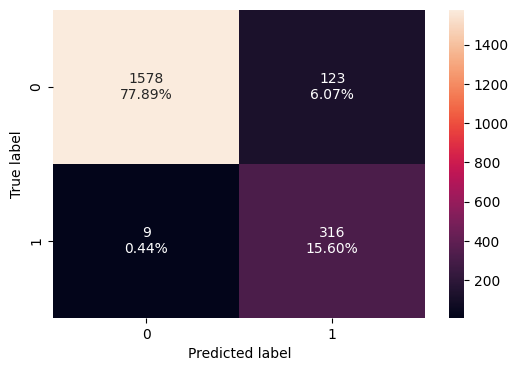

In [ ]:
confusion_matrix_sklearn(tuned_gb_un, X_test, y_test)

####Gradient Boost model trained with original data (GradORIG)

In [ ]:
# Checking model's performance on validation set
gb_orig_test = model_performance_classification_sklearn(tuned_gb_orig, X_test, y_test)
gb_orig_test

Accuracy  Recall  Precision    F1
0     0.968   0.880      0.917 0.898

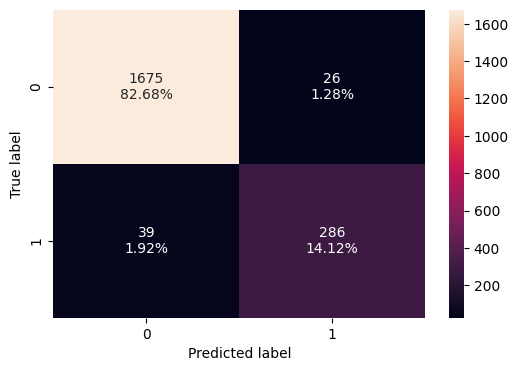

In [ ]:
confusion_matrix_sklearn(tuned_gb_orig, X_test, y_test)

### Feature Importances

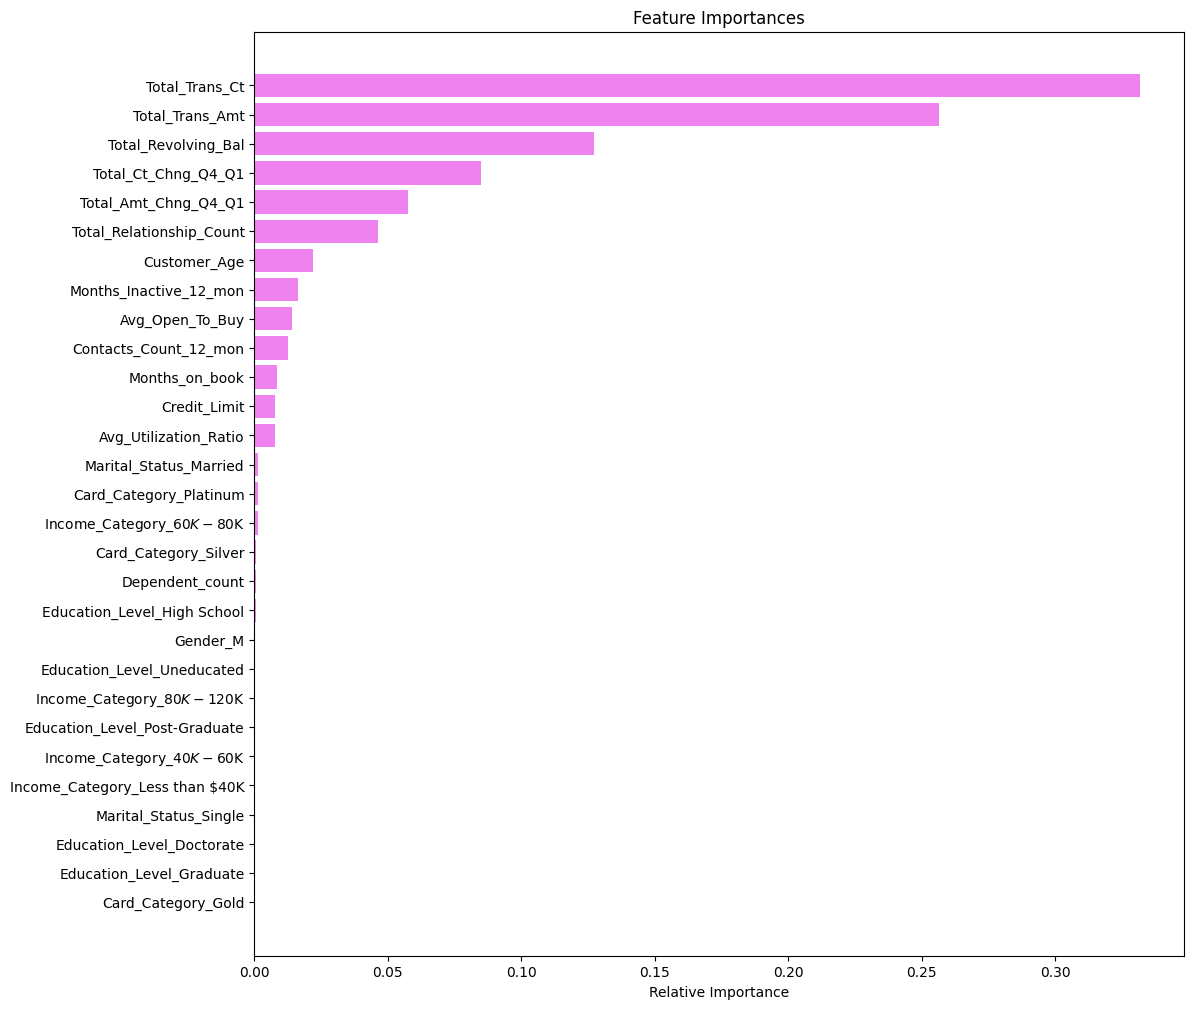

In [ ]:
feature_names = X_train.columns
importances =  tuned_gb_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**CONCLUSION:** We can see that Total_Trans_Ct, Total_Trans_Amt, Total_Revolving_Bal are the most important features for making predictions

# Business Insights and Conclusions

## Business Insights

* Almost 84% of clients are the existing customers.

* More than half of the customers have either 2 or 3 dependents.

* Only 4.2% of the customers have 5 dependents.

* Most of the customers are women, but there is no significant difference between the number of men and women.

* More than half of the customers have either Graduate or High School education
level.

* The smallest number of customers have either Doctorate or Post-Graduate
education level.

* Almost 15% (the third largest group) of customers are uneducated.

* The largest group of customers is Married (46.3%). The second largest group of customers is Single (38.9%). These two groups are comparable in size.

* Only 7.4% of customers are divorced.

* About 35% of clients have income < $40,000.


## Conclusions


* The Total Transaction Count (Total_Trans_Ct) is the most important feature that helps us to determine whether or not a customer will leave their credit card. Clearly, it is unlikely that customers will leave their credit cards if they use their cards often.

* The combination of the Total Transaction Count and Total Transaction Amount (Total_Trans_Amt) becomes an even stronger indicator that our customers need their cards and therefore will not leave these cards.

* The third most important feature is the total revolving balance (Total_Revolving_Bal). Now the correlation between this feature and the target is negative. We can conclude that customers' dissatisfaction with high interest on the revolving balance might result in leaving their cards. These customers might be looking for new credit cards with lower rates.

